In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


import pandas as pd


file_path = '/kaggle/input/sensor-raw-data/influx raw data.csv'  
df = pd.read_csv(file_path)


# Use the actual column headers from row 2
new_header = df.iloc[2]               
df_clean = df[3:].copy()             
df_clean.columns = new_header       
df_clean.reset_index(drop=True, inplace=True)

# Convert all sensor columns to numeric (excluding time)
sensor_cols = [col for col in df_clean.columns if col != 'time']
df_clean[sensor_cols] = df_clean[sensor_cols].apply(pd.to_numeric, errors='coerce')

# Parse the time column
df_clean['time'] = pd.to_datetime(df_clean['time'], errors='coerce')

# Optional: Show the first few rows
print(df_clean.head())


2  NaN  aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  \
0  NaN    48.04     26.82       49.5        26.8       47.1        27.5   
1  NaN    48.45     26.88       49.6        26.7       47.3        27.4   
2  NaN    48.73     26.91       49.8        26.8       48.0        27.4   
3  NaN    48.39     26.91       49.9        26.8       48.3        27.3   
4  NaN    48.46     26.99       49.7        26.8       47.7        27.5   

2  sht_hum  sht_temp                                time  
0    48.18     27.20 2025-07-21 13:22:14.311120137+00:00  
1    48.96     27.24 2025-07-21 13:23:13.734222860+00:00  
2    49.13     27.24 2025-07-21 13:24:17.745252693+00:00  
3    48.50     27.25 2025-07-21 13:25:13.950625602+00:00  
4    49.05     27.28 2025-07-21 13:26:23.205590790+00:00  


In [4]:
df_clean.head(20)


2   NaN  aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  \
0   NaN    48.04     26.82       49.5        26.8       47.1        27.5   
1   NaN    48.45     26.88       49.6        26.7       47.3        27.4   
2   NaN    48.73     26.91       49.8        26.8       48.0        27.4   
3   NaN    48.39     26.91       49.9        26.8       48.3        27.3   
4   NaN    48.46     26.99       49.7        26.8       47.7        27.5   
5   NaN    48.70     26.99       50.1        26.9       47.9        27.5   
6   NaN    48.63     27.00       50.1        26.9       48.0        27.5   
7   NaN    48.50     26.94       49.8        26.9       47.5        27.5   
8   NaN    47.67     26.94       49.7        26.9       47.3        27.4   
9   NaN    47.48     26.94       49.4        26.8       47.8        27.4   
10  NaN    47.53     26.94       49.2        26.9       47.1        27.5   
11  NaN    47.86     26.96       49.2        26.9       46.9        27.5   
12  NaN    48.11     26.92       49.4        26.9       47.6        27.4   
13  NaN    47.78     26.94       49.4        26.9       47.7        27.4   
14  NaN    48.13     26.87       49.3        26.9       47.3        27.4   
15  NaN    48.52     26.92       49.4        26.9       47.4        27.4   
16  NaN    48.35     26.95       49.6        26.8       47.8        27.3   
17  NaN    48.53     26.99       49.5        26.8       47.9        27.3   
18  NaN    48.33     27.00       49.7        26.8       47.9        27.3   
19  NaN    48.23     26.97       49.6        26.9       48.0        27.4   

2   sht_hum  sht_temp                                time  
0     48.18     27.20 2025-07-21 13:22:14.311120137+00:00  
1     48.96     27.24 2025-07-21 13:23:13.734222860+00:00  
2     49.13     27.24 2025-07-21 13:24:17.745252693+00:00  
3     48.50     27.25 2025-07-21 13:25:13.950625602+00:00  
4     49.05     27.28 2025-07-21 13:26:23.205590790+00:00  
5     48.95     27.28 2025-07-21 13:27:35.677913914+00:00  
6     48.55     27.28 2025-07-21 13:28:13.883801685+00:00  
7     48.32     27.25 2025-07-21 13:29:14.701341146+00:00  
8     48.30     27.24 2025-07-21 13:30:21.206609731+00:00  
9     47.99     27.27 2025-07-21 13:31:13.727603204+00:00  
10    48.06     27.27 2025-07-21 13:32:26.188385347+00:00  
11    48.36     27.28 2025-07-21 13:33:17.494959730+00:00  
12    48.78     27.27 2025-07-21 13:34:20.150637771+00:00  
13    47.96     27.27 2025-07-21 13:35:13.712357466+00:00  
14    48.37     27.21 2025-07-21 13:36:13.726907641+00:00  
15    48.84     27.23 2025-07-21 13:37:14.050808934+00:00  
16    48.82     27.24 2025-07-21 13:38:13.742227667+00:00  
17    48.86     27.25 2025-07-21 13:39:13.740872508+00:00  
18    48.98     27.27 2025-07-21 13:40:16.719352419+00:00  
19    48.67     27.27 2025-07-21 13:41:13.770931429+00:00

In [97]:
cleaned_file_path = '/kaggle/working/cleaned_sensor_data.csv'
df_clean.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: /kaggle/working/cleaned_sensor_data.csv


In [98]:
# Drop the first column if it has no name or is fully NaN
if df_clean.columns[0] is None or df_clean.columns[0] == 'NaN' or df_clean.iloc[:, 0].isnull().all():
    df_clean = df_clean.iloc[:, 1:]
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^Unnamed|^nan', case=False)]

# Save cleaned version again
df_clean.to_csv('/kaggle/working/final.csv', index=False)

print("Empty column removed and data saved.")


Empty column removed and data saved.


In [99]:
# Show column names
print("Columns in dataset:")
print(df_clean.columns.tolist())

# Show data types of each column
print("\nData types:")
print(df_clean.dtypes)

# Show first 5 rows to get a glimpse of the data
print("\nFirst 5 rows:")
print(df_clean.head())

# Summary statistics for numeric columns
print("\nDescriptive statistics:")
print(df_clean.describe())

# Check for missing values
print("\nMissing values per column:")
print(df_clean.isnull().sum())


Columns in dataset:
['aht_hum', 'aht_temp', 'dht11_hum', 'dht11_temp', 'dht22_hum', 'dht22_temp', 'sht_hum', 'sht_temp', 'time']

Data types:
2
aht_hum                   float64
aht_temp                  float64
dht11_hum                 float64
dht11_temp                float64
dht22_hum                 float64
dht22_temp                float64
sht_hum                   float64
sht_temp                  float64
time          datetime64[ns, UTC]
dtype: object

First 5 rows:
2  aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  sht_hum  \
0    48.04     26.82       49.5        26.8       47.1        27.5    48.18   
1    48.45     26.88       49.6        26.7       47.3        27.4    48.96   
2    48.73     26.91       49.8        26.8       48.0        27.4    49.13   
3    48.39     26.91       49.9        26.8       48.3        27.3    48.50   
4    48.46     26.99       49.7        26.8       47.7        27.5    49.05   

2  sht_temp                                tim

In [100]:
# # Just convert from UTC to East African Time (EAT)
# df_clean['time'] = df_clean['time'].dt.tz_convert('Africa/Nairobi')

# # Save the updated DataFrame if needed
# df_clean.to_csv('/kaggle/working/timezones_handled.csv', index=False)



In [101]:
num_columns = len(df_clean.columns)
num_rows = len(df_clean)  # or df_clean.shape[0]

print(f"The dataset has {num_columns} columns.")
print(f"The dataset has {num_rows} rows.")


The dataset has 9 columns.
The dataset has 1038 rows.


In [102]:
import pandas as pd

df = pd.read_csv('/kaggle/working/final.csv')
print(df.head())


   aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  sht_hum  \
0    48.04     26.82       49.5        26.8       47.1        27.5    48.18   
1    48.45     26.88       49.6        26.7       47.3        27.4    48.96   
2    48.73     26.91       49.8        26.8       48.0        27.4    49.13   
3    48.39     26.91       49.9        26.8       48.3        27.3    48.50   
4    48.46     26.99       49.7        26.8       47.7        27.5    49.05   

   sht_temp                                 time  
0     27.20  2025-07-21 13:22:14.311120137+00:00  
1     27.24  2025-07-21 13:23:13.734222860+00:00  
2     27.24  2025-07-21 13:24:17.745252693+00:00  
3     27.25  2025-07-21 13:25:13.950625602+00:00  
4     27.28  2025-07-21 13:26:23.205590790+00:00  


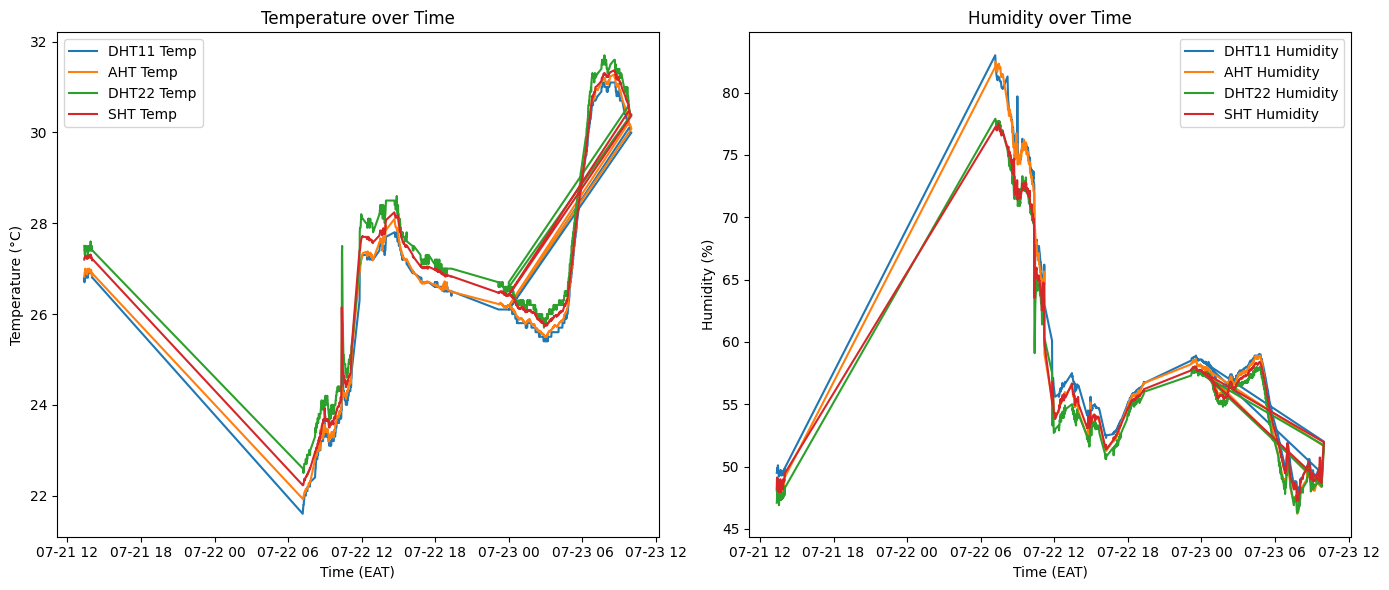

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot temperatures
plt.subplot(1, 2, 1)
plt.plot(df_clean['time'], df_clean['dht11_temp'], label='DHT11 Temp')
plt.plot(df_clean['time'], df_clean['aht_temp'], label='AHT Temp')
plt.plot(df_clean['time'], df_clean['dht22_temp'], label='DHT22 Temp')
plt.plot(df_clean['time'], df_clean['sht_temp'], label='SHT Temp')
plt.xlabel('Time (EAT)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()

# Plot humidities
plt.subplot(1, 2, 2)
plt.plot(df_clean['time'], df_clean['dht11_hum'], label='DHT11 Humidity')
plt.plot(df_clean['time'], df_clean['aht_hum'], label='AHT Humidity')
plt.plot(df_clean['time'], df_clean['dht22_hum'], label='DHT22 Humidity')
plt.plot(df_clean['time'], df_clean['sht_hum'], label='SHT Humidity')
plt.xlabel('Time (EAT)')
plt.ylabel('Humidity (%)')
plt.title('Humidity over Time')
plt.legend()

plt.tight_layout()
plt.show()


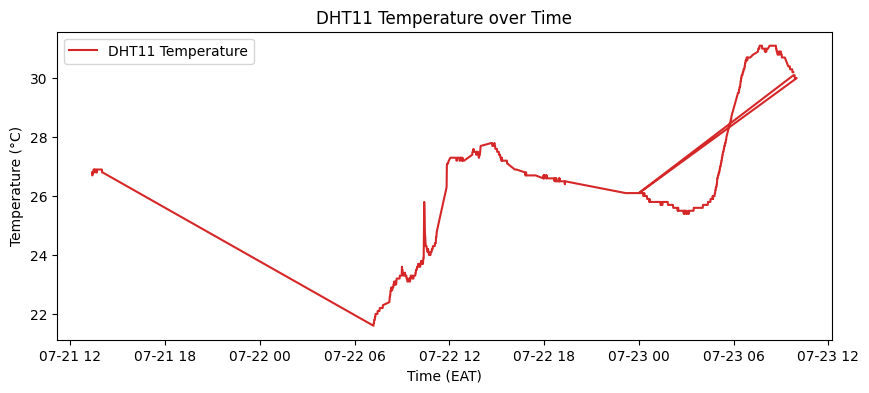

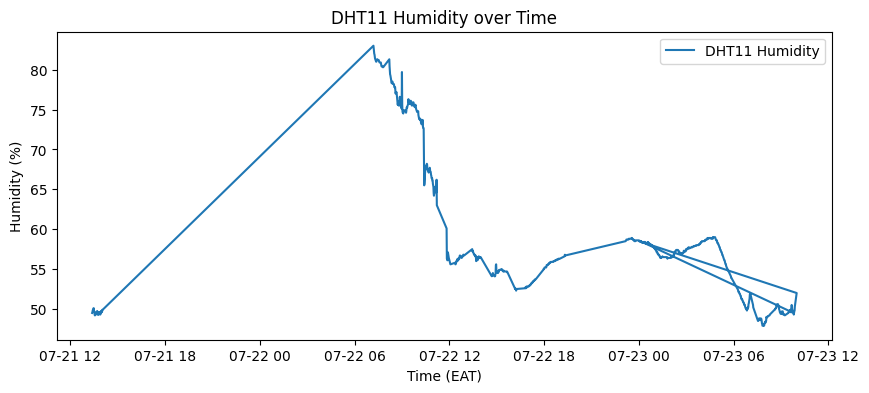

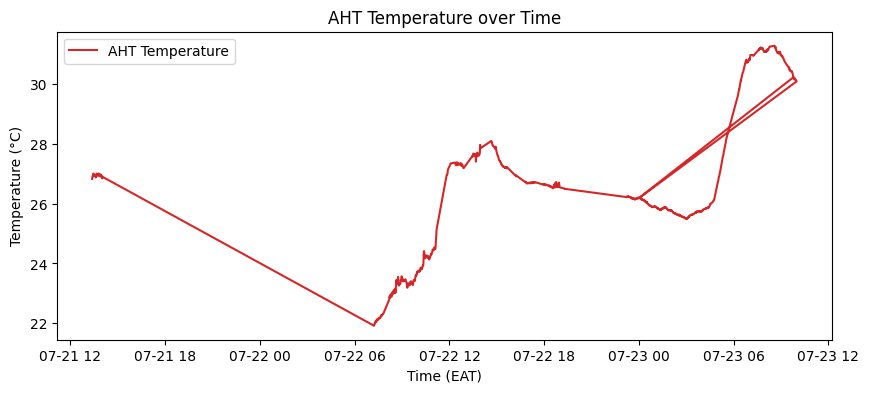

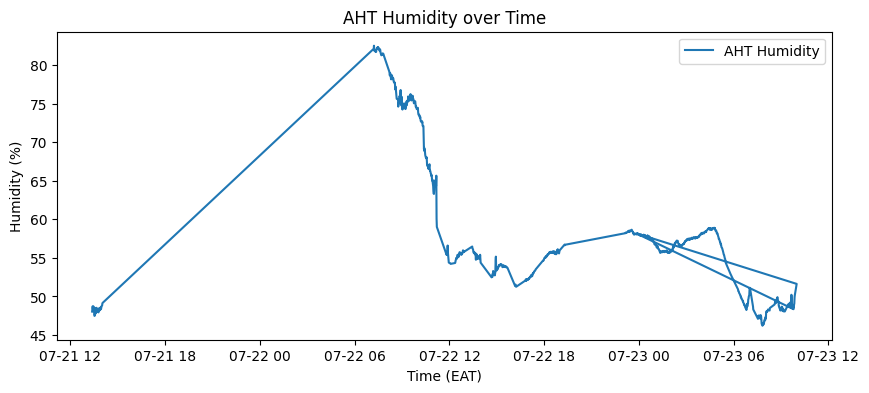

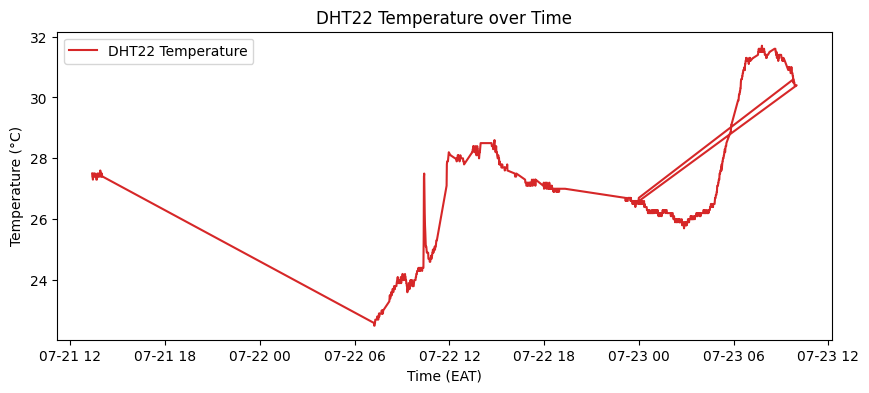

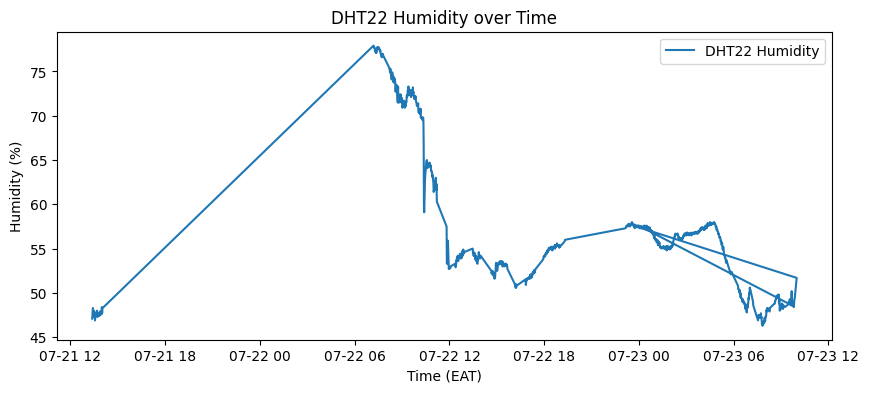

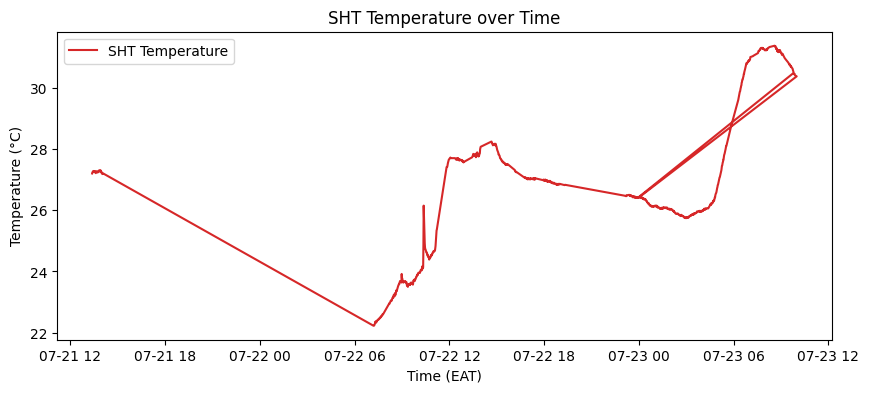

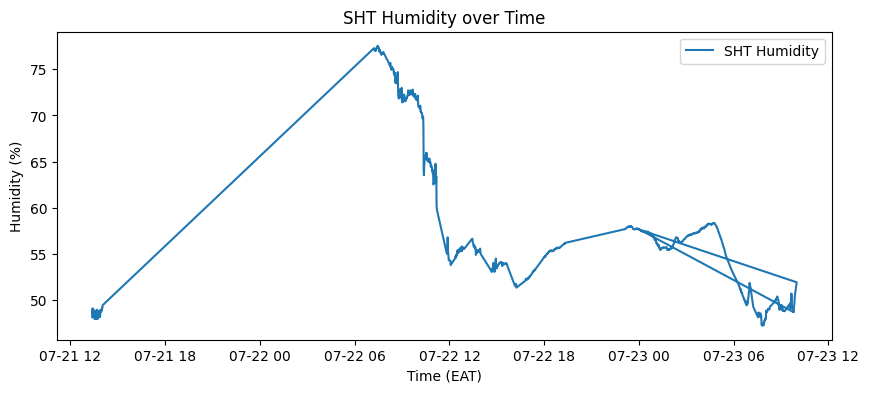

In [104]:


sensors = ['dht11', 'aht', 'dht22', 'sht']

for sensor in sensors:
    plt.figure(figsize=(10,4))
    
    # Temperature plot
    plt.plot(df_clean['time'], df_clean[f'{sensor}_temp'], label=f'{sensor.upper()} Temperature', color='tab:red')
    plt.xlabel('Time (EAT)')
    plt.ylabel('Temperature (°C)')
    plt.title(f'{sensor.upper()} Temperature over Time')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,4))
    # Humidity plot
    plt.plot(df_clean['time'], df_clean[f'{sensor}_hum'], label=f'{sensor.upper()} Humidity', color='tab:blue')
    plt.xlabel('Time (EAT)')
    plt.ylabel('Humidity (%)')
    plt.title(f'{sensor.upper()} Humidity over Time')
    plt.legend()
    plt.show()


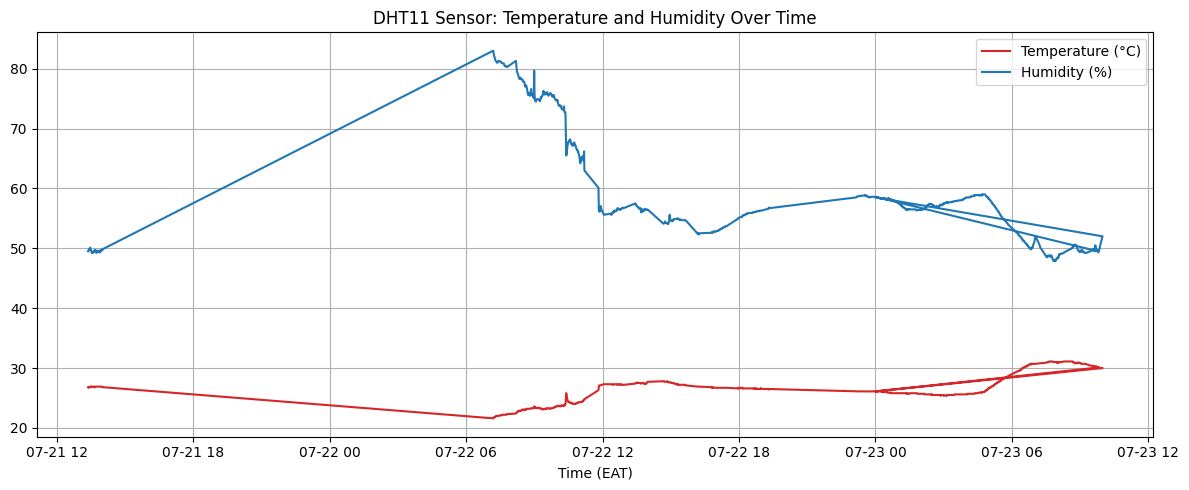

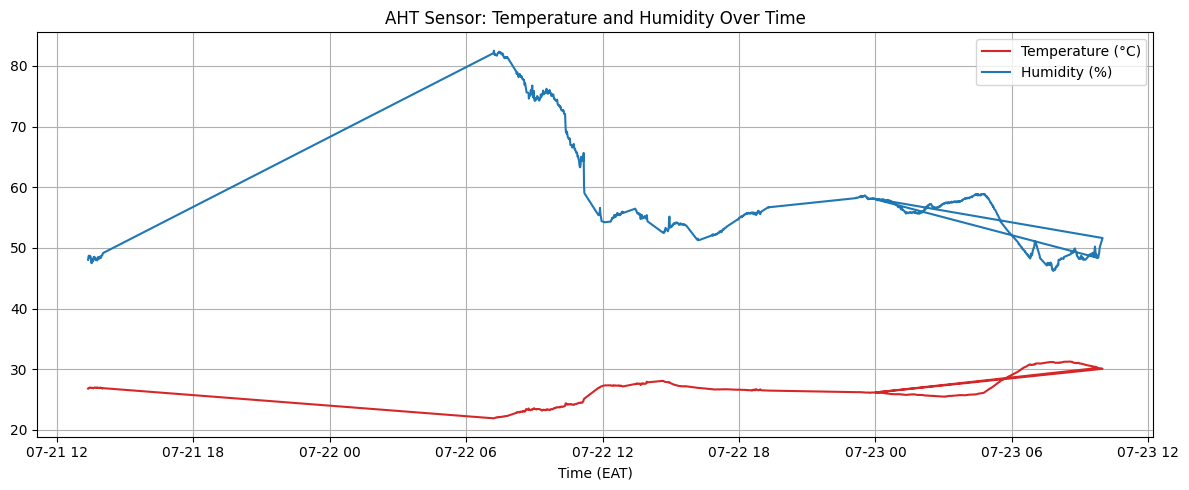

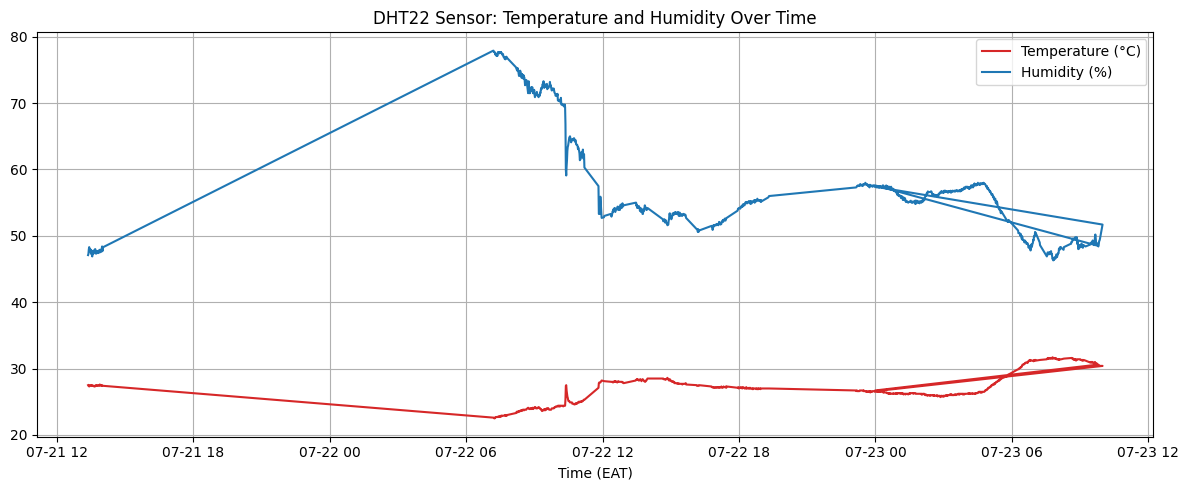

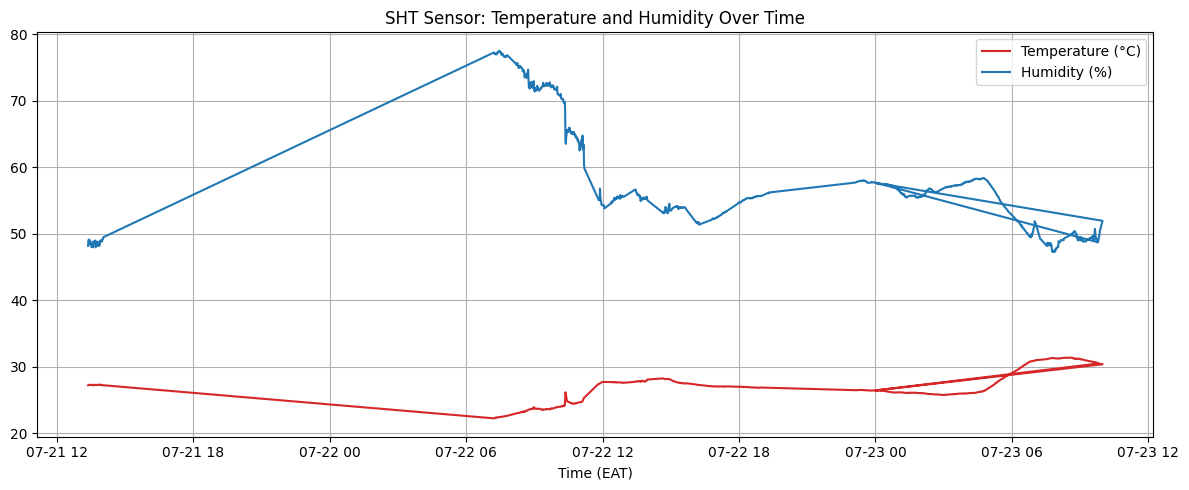

In [105]:


sensors = ['dht11', 'aht', 'dht22', 'sht']

for sensor in sensors:
    plt.figure(figsize=(12, 5))
    
    # Plot temperature
    plt.plot(df_clean['time'], df_clean[f'{sensor}_temp'], label='Temperature (°C)', color='tab:red')
    
    # Plot humidity
    plt.plot(df_clean['time'], df_clean[f'{sensor}_hum'], label='Humidity (%)', color='tab:blue')
    
    plt.xlabel('Time (EAT)')
    plt.title(f'{sensor.upper()} Sensor: Temperature and Humidity Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


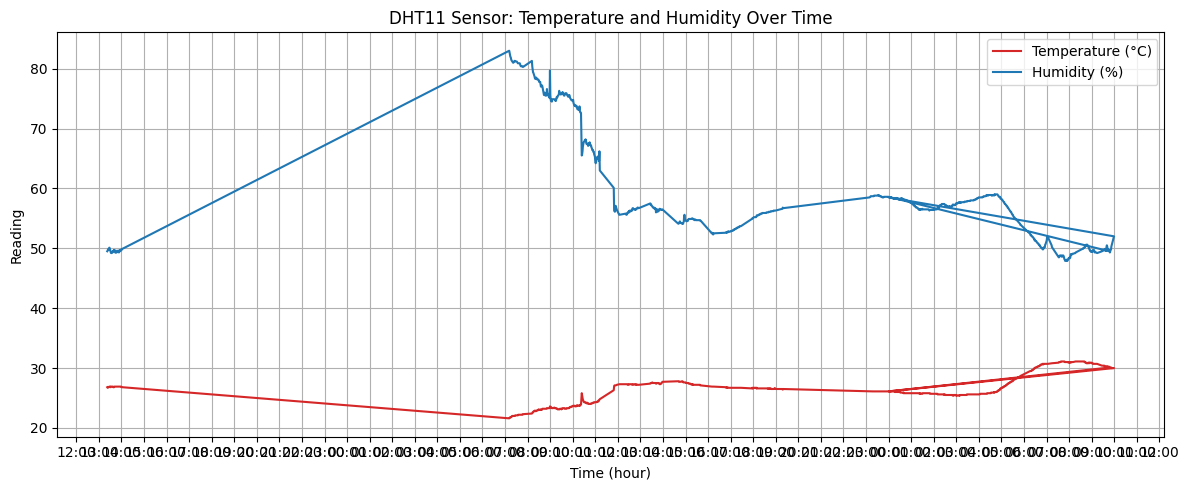

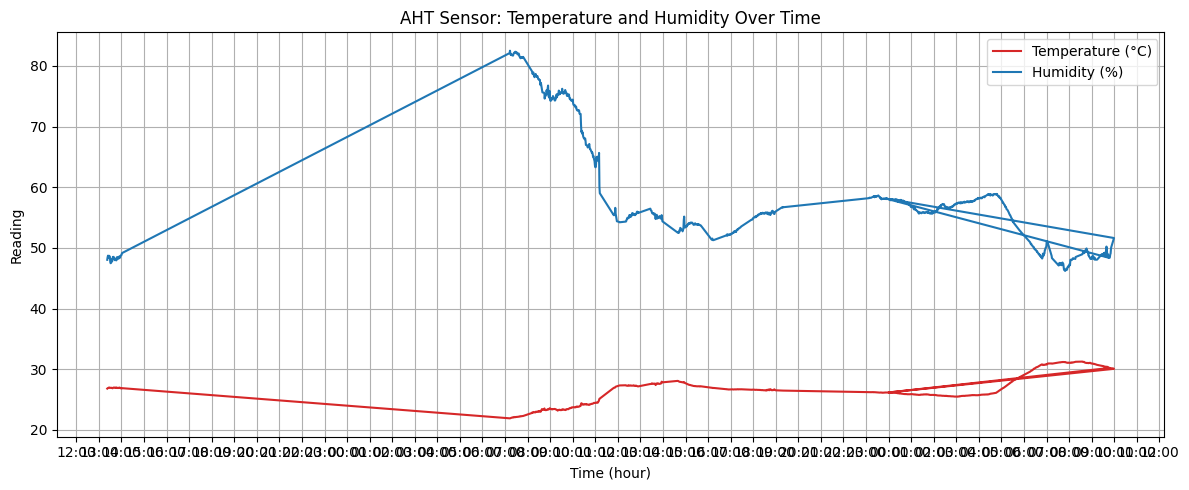

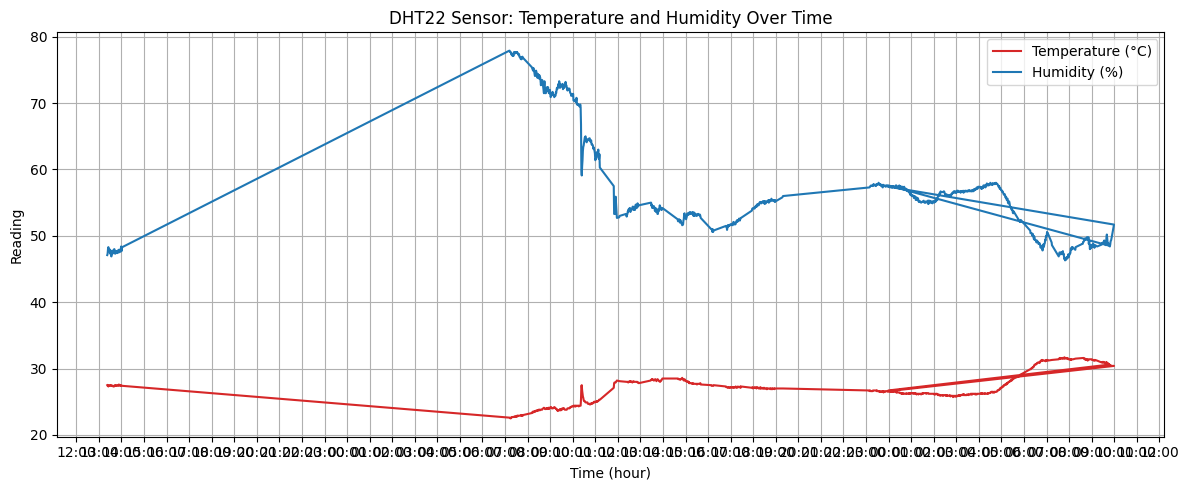

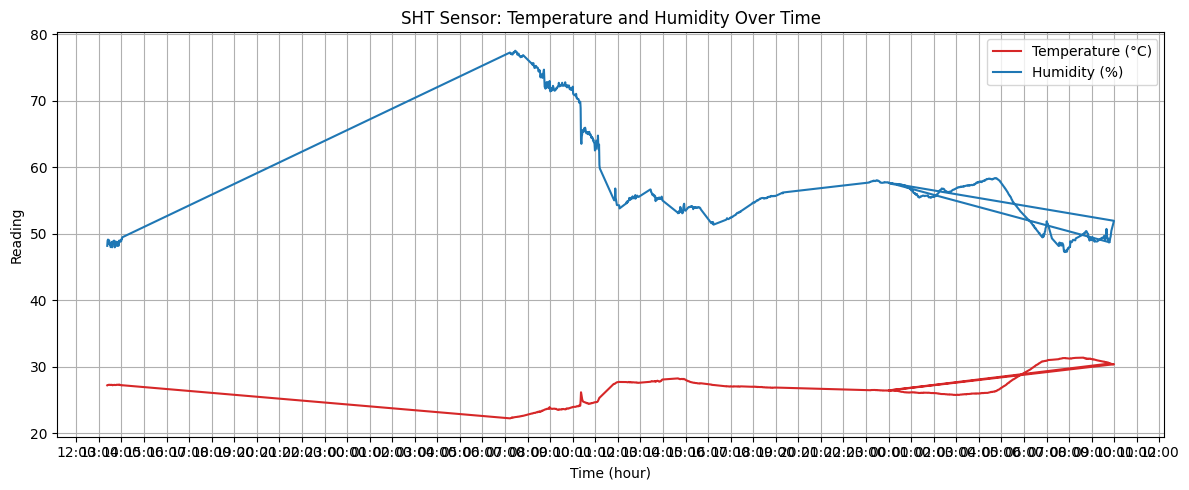

In [106]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sensors = ['dht11', 'aht', 'dht22', 'sht']

for sensor in sensors:
    plt.figure(figsize=(12, 5))
    
    # Plot both temperature and humidity
    plt.plot(df_clean['time'], df_clean[f'{sensor}_temp'], label='Temperature (°C)', color='tab:red')
    plt.plot(df_clean['time'], df_clean[f'{sensor}_hum'], label='Humidity (%)', color='tab:blue')
    
    # Set title and labels
    plt.title(f'{sensor.upper()} Sensor: Temperature and Humidity Over Time')
    plt.xlabel('Time (hour)')
    plt.ylabel('Reading')
    plt.legend()
    plt.grid(True)

    # Format x-axis to show hour ticks
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show tick every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format tick label as HH:MM

    plt.tight_layout()
    plt.show()


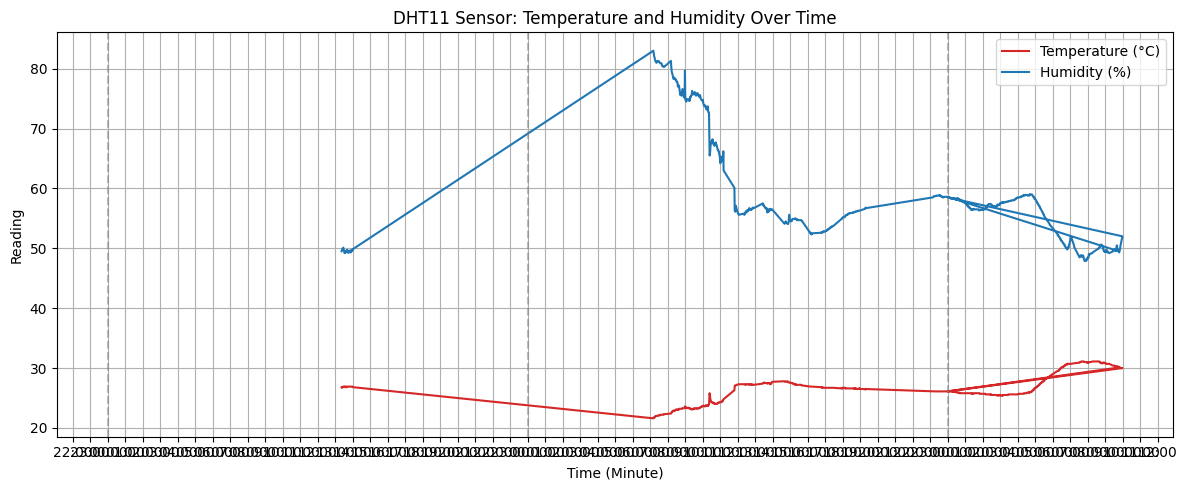

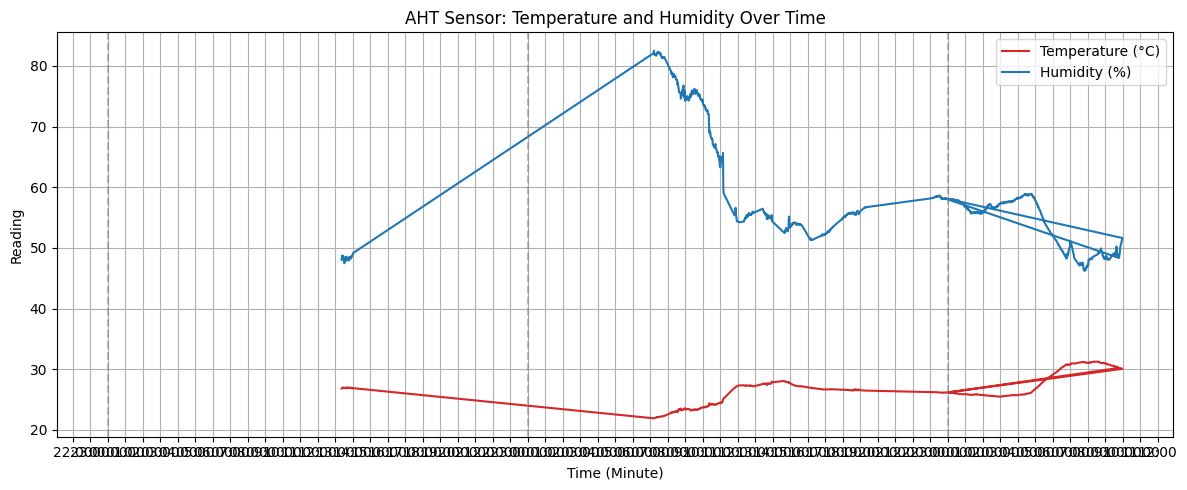

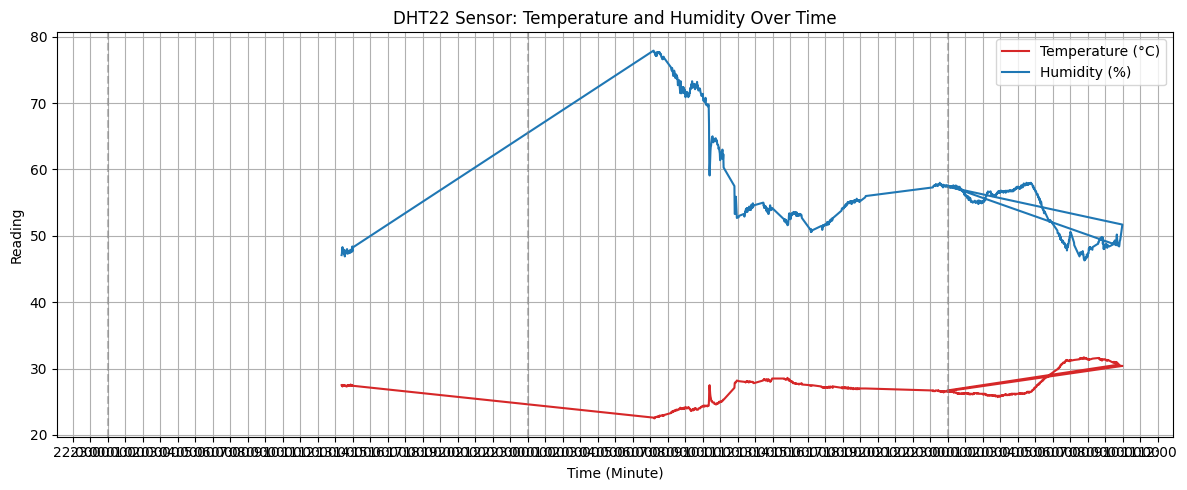

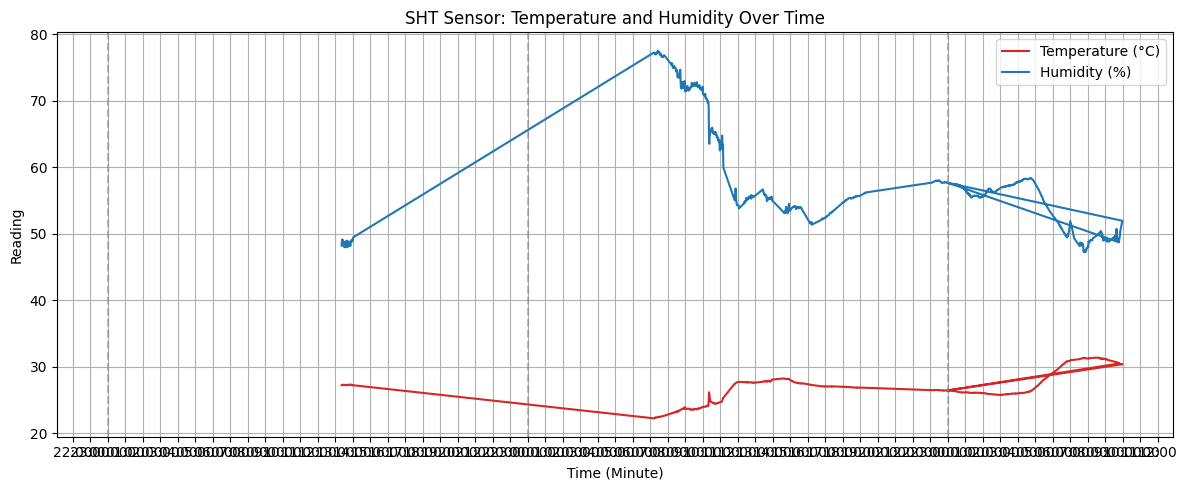

In [107]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sensors = ['dht11', 'aht', 'dht22', 'sht']

for sensor in sensors:
    plt.figure(figsize=(12, 5))

    # Plot temperature and humidity
    plt.plot(df_clean['time'], df_clean[f'{sensor}_temp'], label='Temperature (°C)', color='tab:red')
    plt.plot(df_clean['time'], df_clean[f'{sensor}_hum'], label='Humidity (%)', color='tab:blue')

    plt.title(f'{sensor.upper()} Sensor: Temperature and Humidity Over Time')
    plt.xlabel('Time (Minute)')
    plt.ylabel('Reading')
    plt.legend()
    plt.grid(True)

    ax = plt.gca()
    
    # Main ticks every hour
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # Minor ticks on date change (midnight)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%d-%b'))
    ax.tick_params(axis='x', which='minor', rotation=0, labelsize=9, color='black')

    # Add vertical lines at midnight (start of each day)
    for day_start in pd.date_range(df_clean['time'].min().normalize(),
                                   df_clean['time'].max().normalize(), freq='D'):
        plt.axvline(day_start, color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


In [108]:
# Ensure time is in datetime format and sorted
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean = df_clean.sort_values('time')

# Extract date from time
df_clean['date'] = df_clean['time'].dt.date

# Group by date and get start/end times
intervals = df_clean.groupby('date')['time'].agg(start_time='min', end_time='max').reset_index()

# Calculate duration of data collection for each day
intervals['duration'] = intervals['end_time'] - intervals['start_time']

# Calculate gap between previous day's end and current day's start
intervals['gap_from_previous_day'] = intervals['start_time'] - intervals['end_time'].shift(1)

# Show result
print(intervals)


         date                          start_time  \
0  2025-07-21 2025-07-21 13:22:14.311120137+00:00   
1  2025-07-22 2025-07-22 07:11:14.860003174+00:00   
2  2025-07-23 2025-07-23 00:00:27.663378067+00:00   

                             end_time                  duration  \
0 2025-07-21 14:02:13.789898436+00:00 0 days 00:39:59.478778299   
1 2025-07-22 23:59:27.544556144+00:00 0 days 16:48:12.684552970   
2 2025-07-23 09:59:28.138468596+00:00 0 days 09:59:00.475090529   

      gap_from_previous_day  
0                       NaT  
1 0 days 17:09:01.070104738  
2 0 days 00:01:00.118821923  


In [109]:
# Ensure time column is sorted
df_clean = df_clean.sort_values(by='time')

# Calculate time difference between consecutive rows
df_clean['gap'] = df_clean['time'].diff()

# Filter gaps greater than a threshold (e.g. > 2 minutes)
# You can adjust this to "1 minute" if that's your expected interval
threshold = pd.Timedelta(minutes=2)
gaps_df = df_clean[df_clean['gap'] > threshold].copy()

# Add useful info: gap length in minutes, and the previous time
gaps_df['previous_time'] = df_clean['time'].shift(1)
gaps_df['gap_minutes'] = gaps_df['gap'].dt.total_seconds() / 60

# Select columns to view
gaps_info = gaps_df[['previous_time', 'time', 'gap_minutes']]
print(gaps_info)



2                          previous_time                                time  \
28   2025-07-21 13:49:13.811311062+00:00 2025-07-21 13:52:13.836598881+00:00   
39   2025-07-21 14:02:13.789898436+00:00 2025-07-22 07:11:14.860003174+00:00   
77   2025-07-22 07:48:14.583146558+00:00 2025-07-22 08:11:30.162890026+00:00   
106  2025-07-22 08:39:29.881772869+00:00 2025-07-22 08:43:31.569034408+00:00   
131  2025-07-22 09:07:31.411996607+00:00 2025-07-22 09:11:09.151992290+00:00   
253  2025-07-22 11:12:06.273811966+00:00 2025-07-22 11:49:11.921786798+00:00   
259  2025-07-22 11:54:12.038927367+00:00 2025-07-22 11:57:32.854977781+00:00   
260  2025-07-22 11:57:32.854977781+00:00 2025-07-22 12:03:39.746078938+00:00   
262  2025-07-22 12:04:32.589084028+00:00 2025-07-22 12:21:32.699980647+00:00   
297  2025-07-22 12:55:32.521215226+00:00 2025-07-22 13:26:32.834465554+00:00   
328  2025-07-22 13:56:32.967992401+00:00 2025-07-22 13:58:33.678499391+00:00   
329  2025-07-22 13:58:33.678499391+00:00

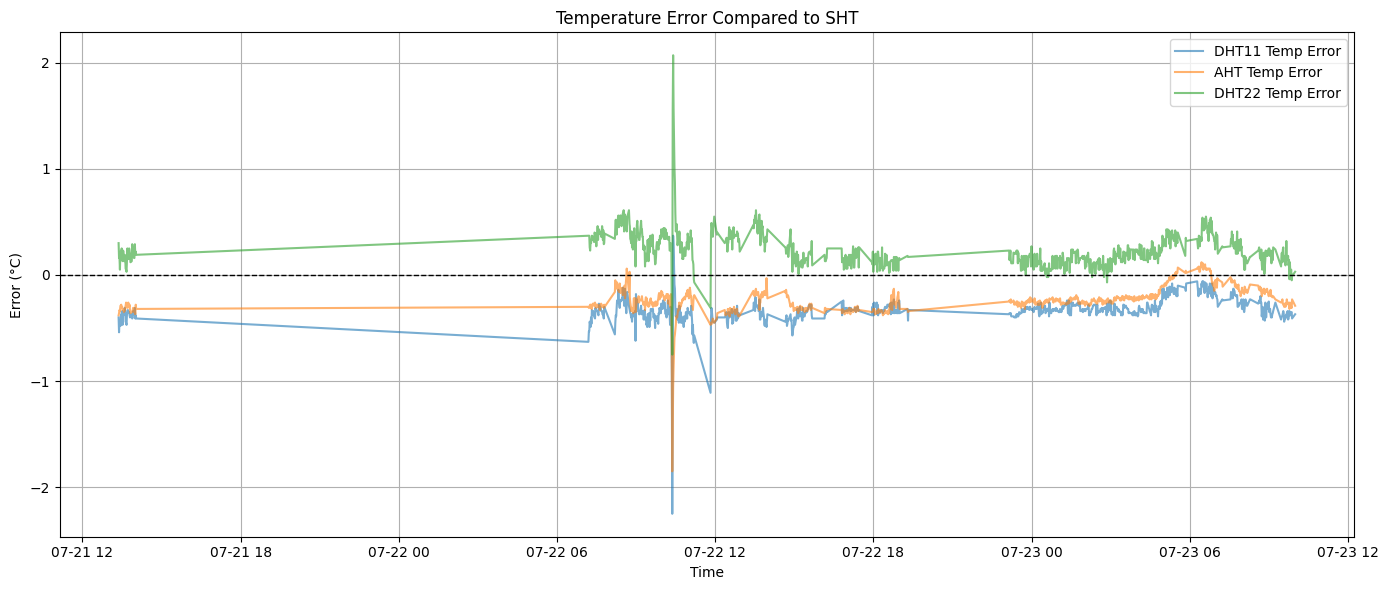

In [110]:
# Temperature error
df_clean['dht11_temp_error'] = df_clean['dht11_temp'] - df_clean['sht_temp']
df_clean['aht_temp_error'] = df_clean['aht_temp'] - df_clean['sht_temp']
df_clean['dht22_temp_error'] = df_clean['dht22_temp'] - df_clean['sht_temp']

# Humidity error
df_clean['dht11_hum_error'] = df_clean['dht11_hum'] - df_clean['sht_hum']
df_clean['aht_hum_error'] = df_clean['aht_hum'] - df_clean['sht_hum']
df_clean['dht22_hum_error'] = df_clean['dht22_hum'] - df_clean['sht_hum']

plt.figure(figsize=(14, 6))
plt.plot(df_clean['time'], df_clean['dht11_temp_error'], label='DHT11 Temp Error', alpha=0.6)
plt.plot(df_clean['time'], df_clean['aht_temp_error'], label='AHT Temp Error', alpha=0.6)
plt.plot(df_clean['time'], df_clean['dht22_temp_error'], label='DHT22 Temp Error', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Error Compared to SHT')
plt.ylabel('Error (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



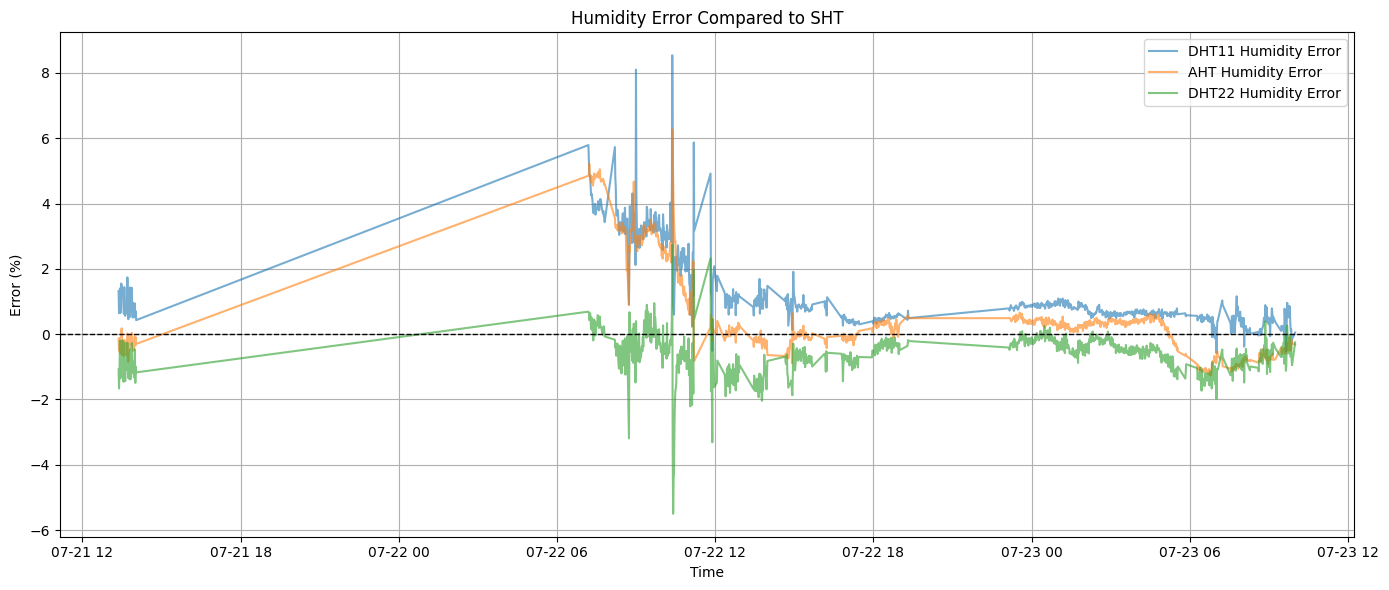

In [111]:
plt.figure(figsize=(14, 6))
plt.plot(df_clean['time'], df_clean['dht11_hum_error'], label='DHT11 Humidity Error', alpha=0.6)
plt.plot(df_clean['time'], df_clean['aht_hum_error'], label='AHT Humidity Error', alpha=0.6)
plt.plot(df_clean['time'], df_clean['dht22_hum_error'], label='DHT22 Humidity Error', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Humidity Error Compared to SHT')
plt.ylabel('Error (%)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
# Temperature difference (DHT11 - SHT)
df_clean['dht11_temp_error'] = df_clean['dht11_temp'] - df_clean['sht_temp']

# Humidity difference (DHT11 - SHT)
df_clean['dht11_hum_error'] = df_clean['dht11_hum'] - df_clean['sht_hum']


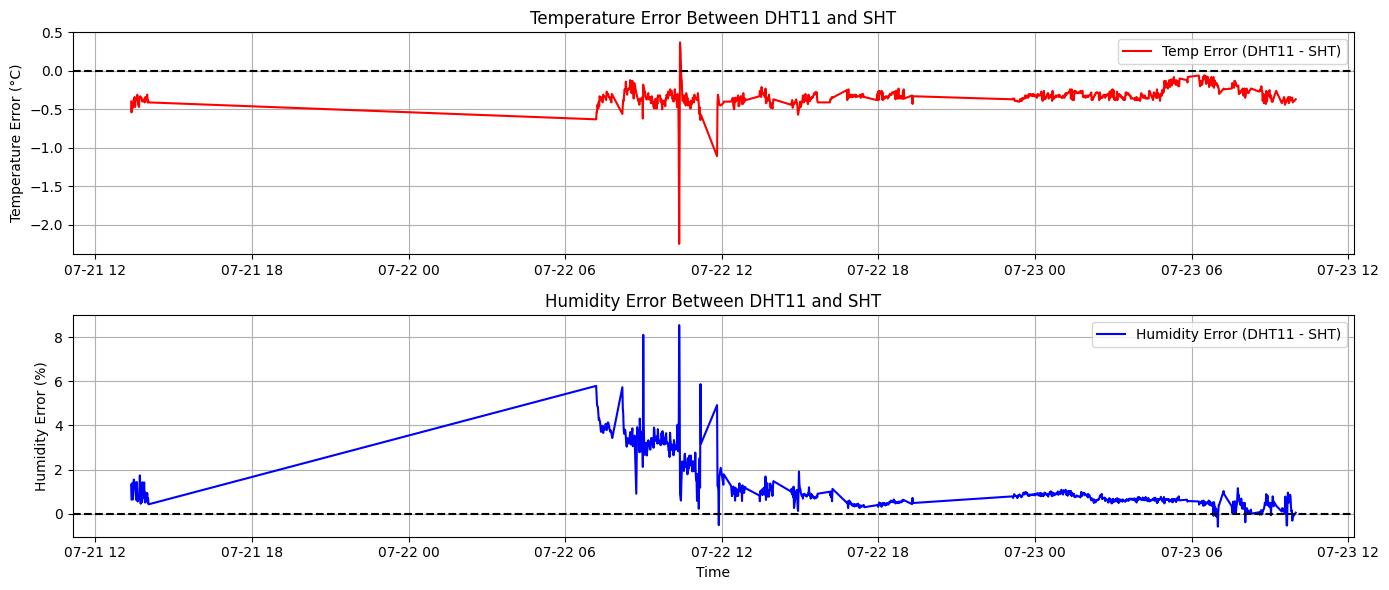

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Temperature plot
plt.subplot(2, 1, 1)
plt.plot(df_clean['time'], df_clean['dht11_temp_error'], color='red', label='Temp Error (DHT11 - SHT)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Temperature Error Between DHT11 and SHT')
plt.ylabel('Temperature Error (°C)')
plt.legend()
plt.grid(True)

# Humidity plot
plt.subplot(2, 1, 2)
plt.plot(df_clean['time'], df_clean['dht11_hum_error'], color='blue', label='Humidity Error (DHT11 - SHT)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Humidity Error Between DHT11 and SHT')
plt.ylabel('Humidity Error (%)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


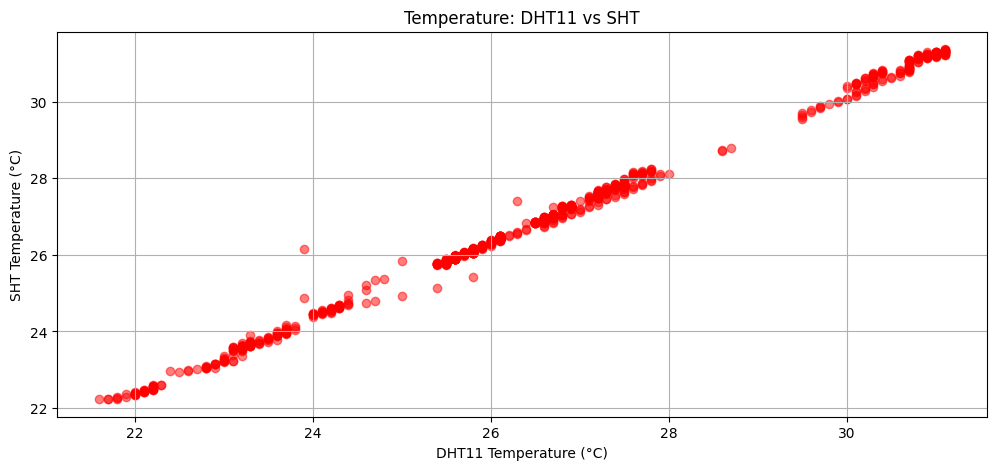

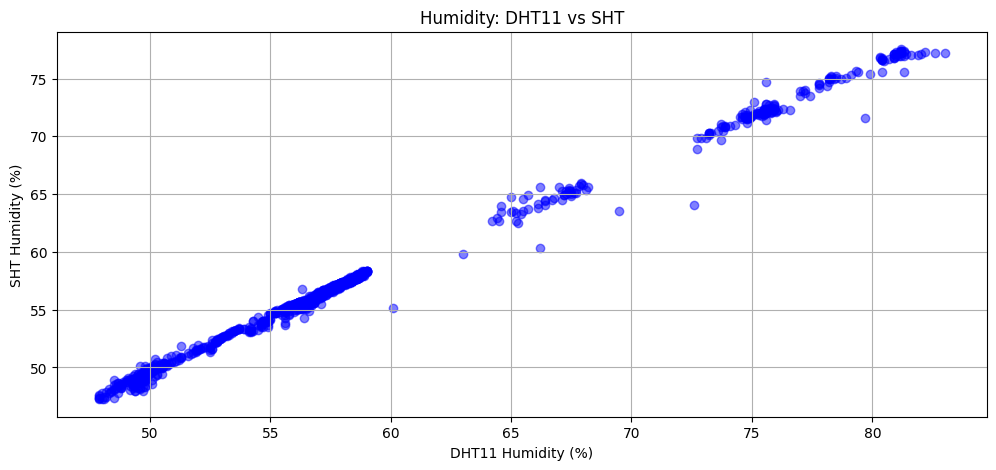

In [114]:


# Temperature comparison scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(df_clean['dht11_temp'], df_clean['sht_temp'], alpha=0.5, color='red')
plt.title('Temperature: DHT11 vs SHT')
plt.xlabel('DHT11 Temperature (°C)')
plt.ylabel('SHT Temperature (°C)')
plt.grid(True)
plt.show()

# Humidity comparison scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(df_clean['dht11_hum'], df_clean['sht_hum'], alpha=0.5, color='blue')
plt.title('Humidity: DHT11 vs SHT')
plt.xlabel('DHT11 Humidity (%)')
plt.ylabel('SHT Humidity (%)')
plt.grid(True)
plt.show()


In [115]:
#compare the sht temp/hum to dht11 temp 

print("Correlation between SHT Temperature and DHT11 Temperature:",
      df_clean['sht_temp'].corr(df_clean['dht11_temp']))

print("Correlation between SHT Humidity and DHT11 Temperature:",
      df_clean['sht_hum'].corr(df_clean['dht11_temp']))

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data (drop rows with NaNs in relevant columns)
df_model = df_clean[['dht11_temp', 'sht_temp', 'sht_hum']].dropna()

X = df_model[['sht_temp', 'sht_hum']]  # Features (SHT temp & hum)
y = df_model['dht11_temp']              # Target (DHT11 temp)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient for SHT Temperature: {model.coef_[0]:.3f}")
print(f"Coefficient for SHT Humidity: {model.coef_[1]:.3f}")

# Optional: R-squared score (how well features explain the variance in DHT11 temp)
r2 = model.score(X, y)
print(f"R-squared: {r2:.3f}")



Correlation between SHT Temperature and DHT11 Temperature: 0.9988196273924596
Correlation between SHT Humidity and DHT11 Temperature: -0.8716788357070322
Intercept: -0.969
Coefficient for SHT Temperature: 1.019
Coefficient for SHT Humidity: 0.002
R-squared: 0.998


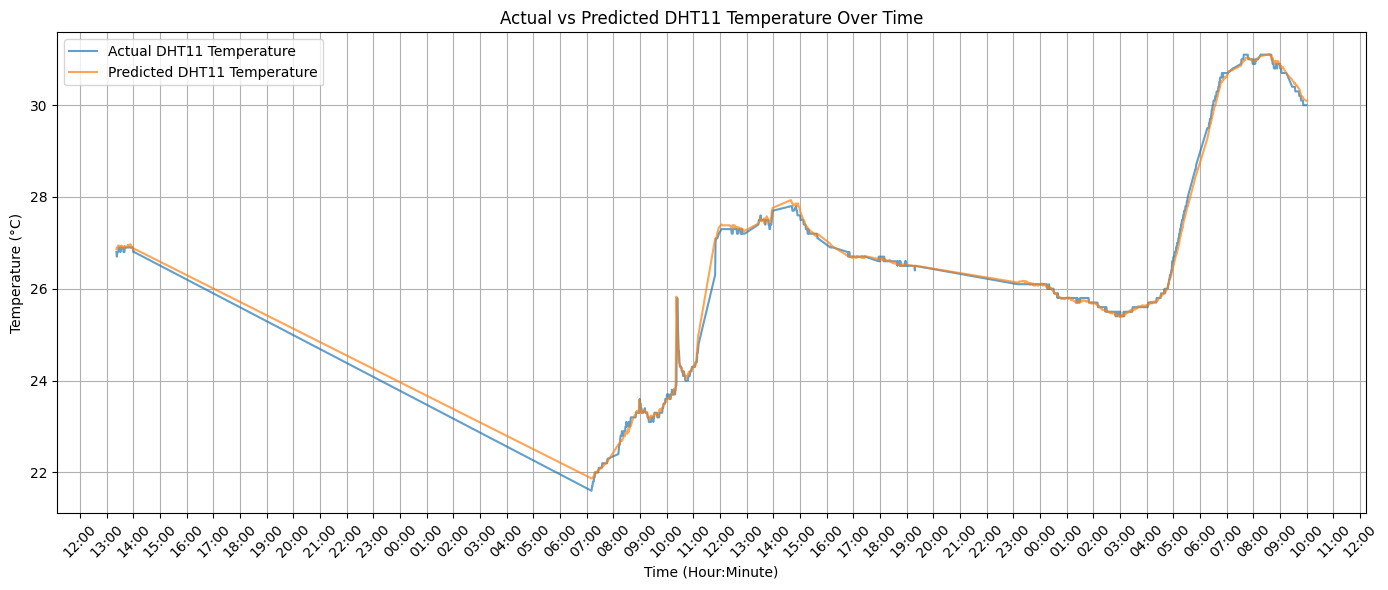

In [116]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Prepare data including 'time'
df_model = df_clean[['time', 'dht11_temp', 'sht_temp', 'sht_hum']].dropna()

X = df_model[['sht_temp', 'sht_hum']]
y = df_model['dht11_temp']

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict DHT11 temperature
y_pred = model.predict(X)

# Plot actual vs predicted with time on x-axis
plt.figure(figsize=(14, 6))
plt.plot(df_model['time'], y, label='Actual DHT11 Temperature', alpha=0.7)
plt.plot(df_model['time'], y_pred, label='Predicted DHT11 Temperature', alpha=0.7)

# Format x-axis to show hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # ticks every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title('Actual vs Predicted DHT11 Temperature Over Time')
plt.xlabel('Time (Hour:Minute)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


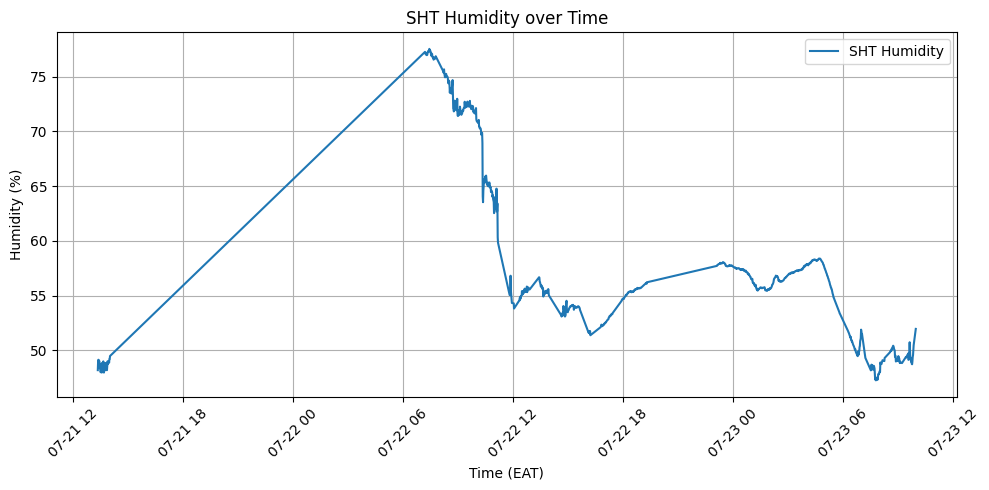

In [117]:
df_sorted = df_clean.sort_values('time')

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['time'], df_sorted['sht_hum'], label='SHT Humidity')
plt.title('SHT Humidity over Time')
plt.xlabel('Time (EAT)')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


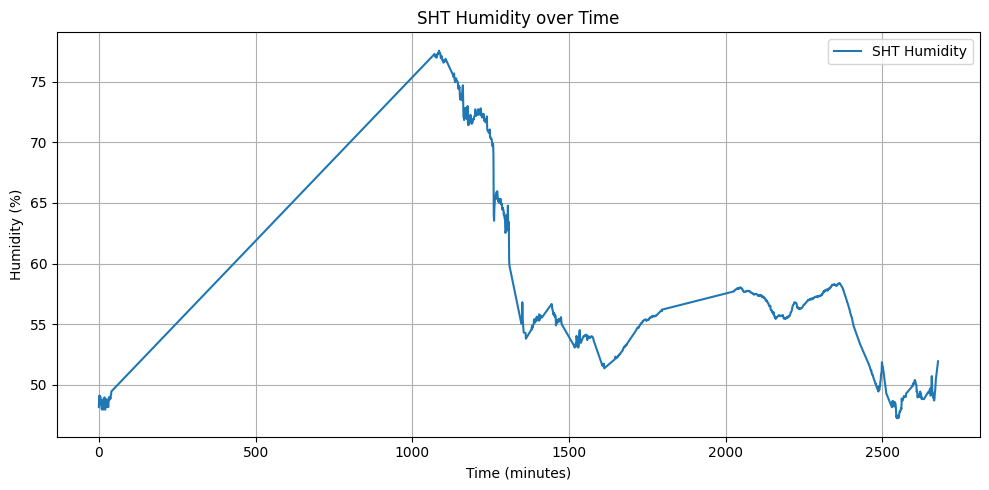

In [118]:
import matplotlib.pyplot as plt

# Sort the dataframe by time
df_sorted = df_clean.sort_values('time')

# Convert 'time' to minutes elapsed since the first timestamp
df_sorted['minutes'] = (df_sorted['time'] - df_sorted['time'].iloc[0]).dt.total_seconds() / 60

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['minutes'], df_sorted['sht_hum'], label='SHT Humidity')
plt.title('SHT Humidity over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


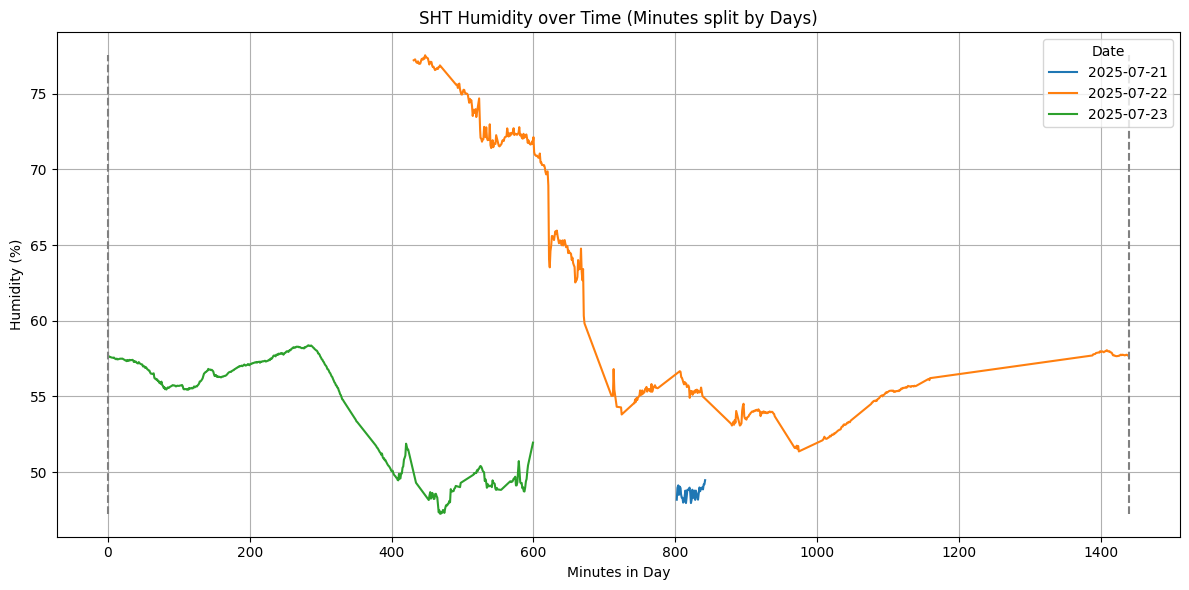

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort dataframe by time
df_sorted = df_clean.sort_values('time').copy()

# Extract date (day)
df_sorted['date'] = df_sorted['time'].dt.date

# Get the timezone from the 'time' column
tz = df_sorted['time'].dt.tz

# Convert 'date' to datetime and localize to the same timezone as 'time'
df_sorted['date_time'] = pd.to_datetime(df_sorted['date']).dt.tz_localize(tz)

# Calculate minutes elapsed since start of the day
df_sorted['minutes_in_day'] = (df_sorted['time'] - df_sorted['date_time']).dt.total_seconds() / 60

plt.figure(figsize=(12, 6))

# Plot humidity vs minutes_in_day, grouping by date for clarity
for date, group in df_sorted.groupby('date'):
    plt.plot(group['minutes_in_day'], group['sht_hum'], label=str(date))

plt.title('SHT Humidity over Time (Minutes split by Days)')
plt.xlabel('Minutes in Day')
plt.ylabel('Humidity (%)')
plt.legend(title='Date')
plt.grid(True)

# Add vertical lines at 0 and 1440 to separate days visually
plt.vlines([0, 1440], ymin=df_sorted['sht_hum'].min(), ymax=df_sorted['sht_hum'].max(), colors='gray', linestyles='dashed')

plt.tight_layout()
plt.show()


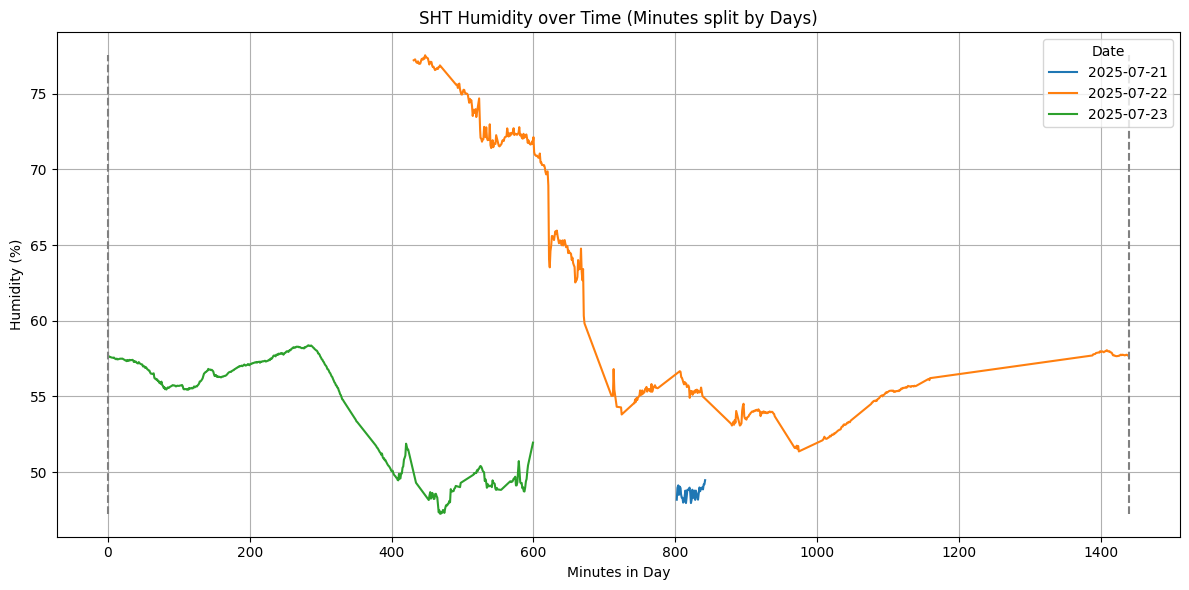

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Make a copy and remove timezone info (convert tz-aware to tz-naive)
df_sorted = df_clean.sort_values('time').copy()
df_sorted['time'] = df_sorted['time'].dt.tz_localize(None)

# Extract date (day)
df_sorted['date'] = df_sorted['time'].dt.date

# Calculate minutes elapsed since start of the day
df_sorted['minutes_in_day'] = (df_sorted['time'] - pd.to_datetime(df_sorted['date'])).dt.total_seconds() / 60

plt.figure(figsize=(12, 6))

# Plot humidity vs minutes_in_day, grouping by date for clarity
for date, group in df_sorted.groupby('date'):
    plt.plot(group['minutes_in_day'], group['sht_hum'], label=str(date))

plt.title('SHT Humidity over Time (Minutes split by Days)')
plt.xlabel('Minutes in Day')
plt.ylabel('Humidity (%)')
plt.legend(title='Date')
plt.grid(True)

# Add vertical lines at 0 and 1440 to separate days visually
plt.vlines([0, 1440], ymin=df_sorted['sht_hum'].min(), ymax=df_sorted['sht_hum'].max(), colors='gray', linestyles='dashed')

plt.tight_layout()
plt.show()


In [121]:
df['time'] = pd.to_datetime(df['time'])

print(df['time'].dt.tz)  # prints None if tz-naive, or the timezone if tz-aware

import pandas as pd

# Step 1: Convert timezone from UTC to Nairobi (EAT)
df['time'] = df['time'].dt.tz_convert('Africa/Nairobi')

# Optional: if you want to remove timezone info after converting to Nairobi, uncomment this line:
# df['time'] = df['time'].dt.tz_localize(None)

# Step 2: Save dataframe to CSV (time column will be saved as ISO string with timezone info)
df.to_csv('/kaggle/working/final_time.csv', index=False)

print("Timezone converted to Nairobi and dataframe saved successfully.")


UTC
Timezone converted to Nairobi and dataframe saved successfully.


In [122]:
df = pd.read_csv('/kaggle/working/final.csv')
print(df.head())

   aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  sht_hum  \
0    48.04     26.82       49.5        26.8       47.1        27.5    48.18   
1    48.45     26.88       49.6        26.7       47.3        27.4    48.96   
2    48.73     26.91       49.8        26.8       48.0        27.4    49.13   
3    48.39     26.91       49.9        26.8       48.3        27.3    48.50   
4    48.46     26.99       49.7        26.8       47.7        27.5    49.05   

   sht_temp                                 time  
0     27.20  2025-07-21 13:22:14.311120137+00:00  
1     27.24  2025-07-21 13:23:13.734222860+00:00  
2     27.24  2025-07-21 13:24:17.745252693+00:00  
3     27.25  2025-07-21 13:25:13.950625602+00:00  
4     27.28  2025-07-21 13:26:23.205590790+00:00  


In [123]:
df = pd.read_csv('/kaggle/working/final_time.csv')
print(df.head())

   aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  sht_hum  \
0    48.04     26.82       49.5        26.8       47.1        27.5    48.18   
1    48.45     26.88       49.6        26.7       47.3        27.4    48.96   
2    48.73     26.91       49.8        26.8       48.0        27.4    49.13   
3    48.39     26.91       49.9        26.8       48.3        27.3    48.50   
4    48.46     26.99       49.7        26.8       47.7        27.5    49.05   

   sht_temp                                 time  
0     27.20  2025-07-21 16:22:14.311120137+03:00  
1     27.24  2025-07-21 16:23:13.734222860+03:00  
2     27.24  2025-07-21 16:24:17.745252693+03:00  
3     27.25  2025-07-21 16:25:13.950625602+03:00  
4     27.28  2025-07-21 16:26:23.205590790+03:00  


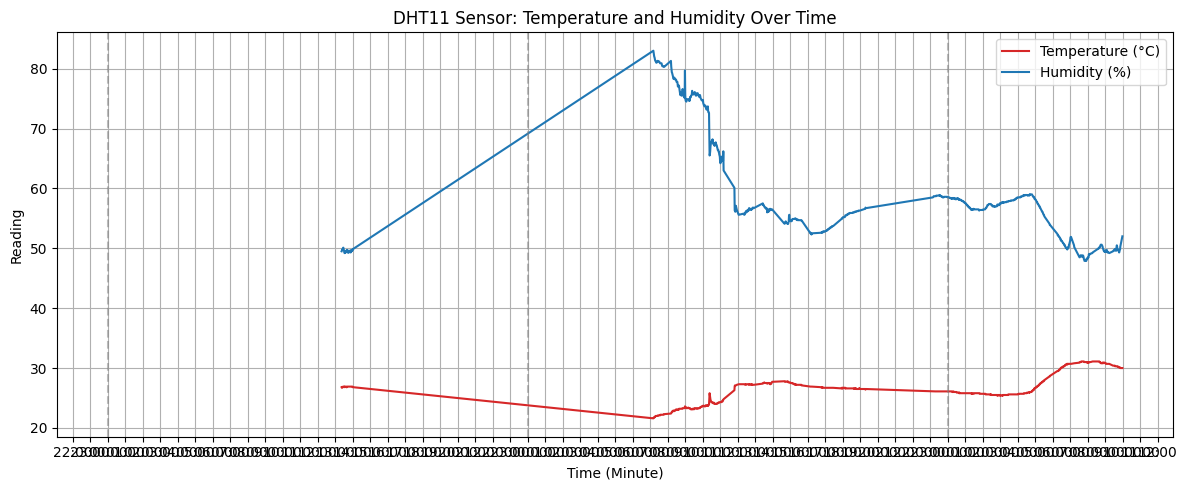

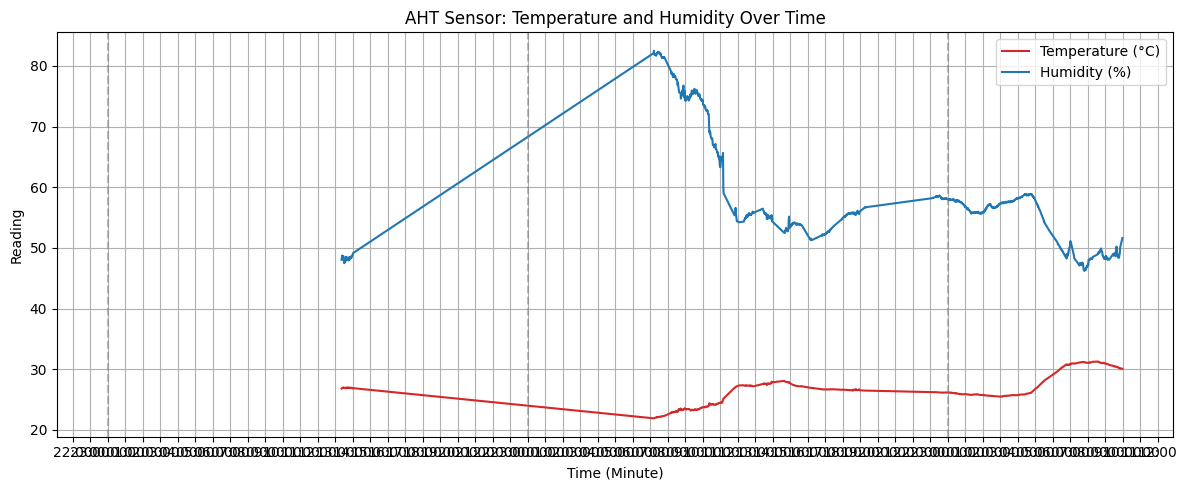

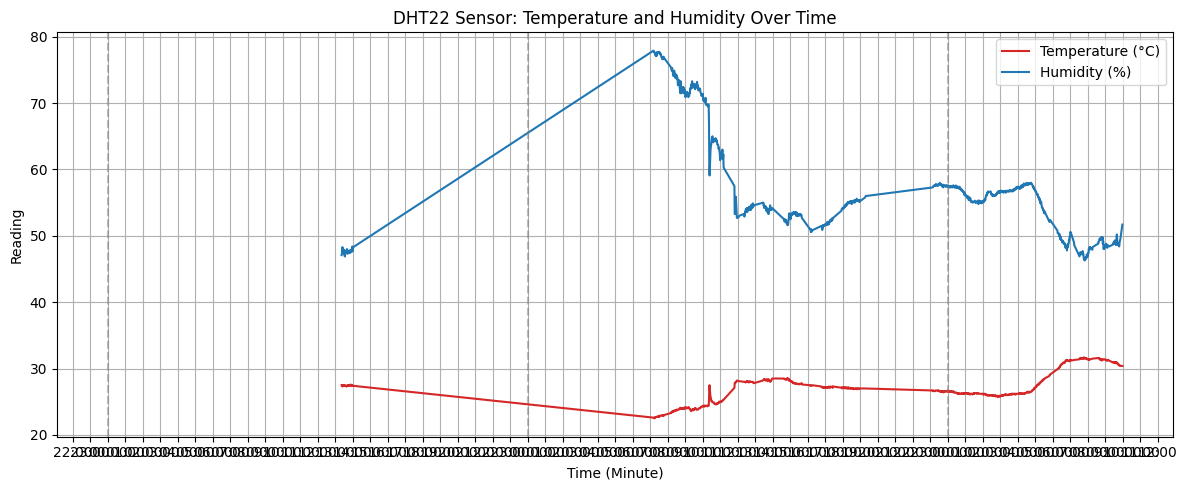

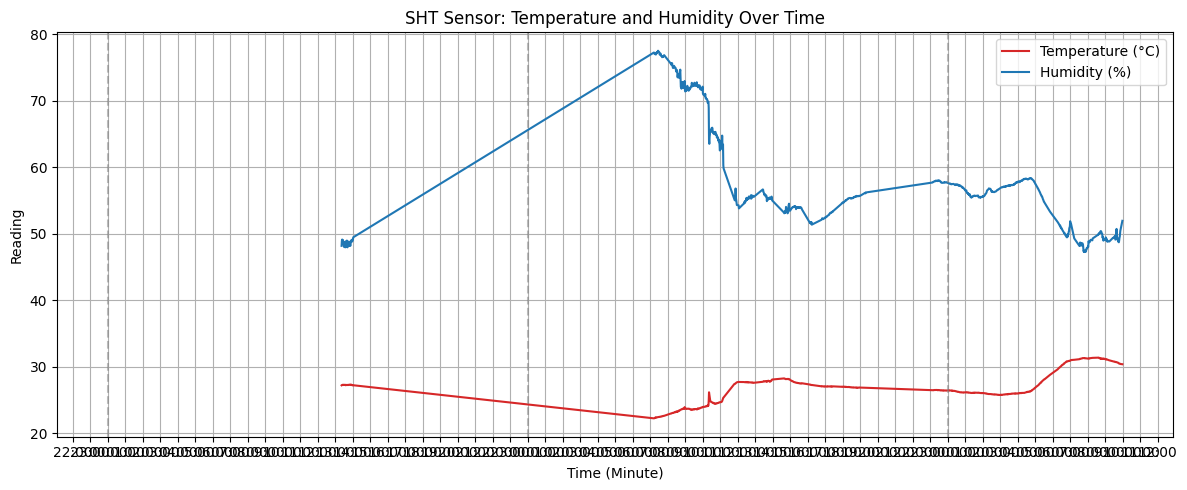

In [124]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sensors = ['dht11', 'aht', 'dht22', 'sht']

for sensor in sensors:
    plt.figure(figsize=(12, 5))

    # Plot temperature and humidity
    plt.plot(df_clean['time'], df_clean[f'{sensor}_temp'], label='Temperature (°C)', color='tab:red')
    plt.plot(df_clean['time'], df_clean[f'{sensor}_hum'], label='Humidity (%)', color='tab:blue')

    plt.title(f'{sensor.upper()} Sensor: Temperature and Humidity Over Time')
    plt.xlabel('Time (Minute)')
    plt.ylabel('Reading')
    plt.legend()
    plt.grid(True)

    ax = plt.gca()
    
    # Main ticks every hour
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # Minor ticks on date change (midnight)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%d-%b'))
    ax.tick_params(axis='x', which='minor', rotation=0, labelsize=9, color='black')

    # Add vertical lines at midnight (start of each day)
    for day_start in pd.date_range(df_clean['time'].min().normalize(),
                                   df_clean['time'].max().normalize(), freq='D'):
        plt.axvline(day_start, color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


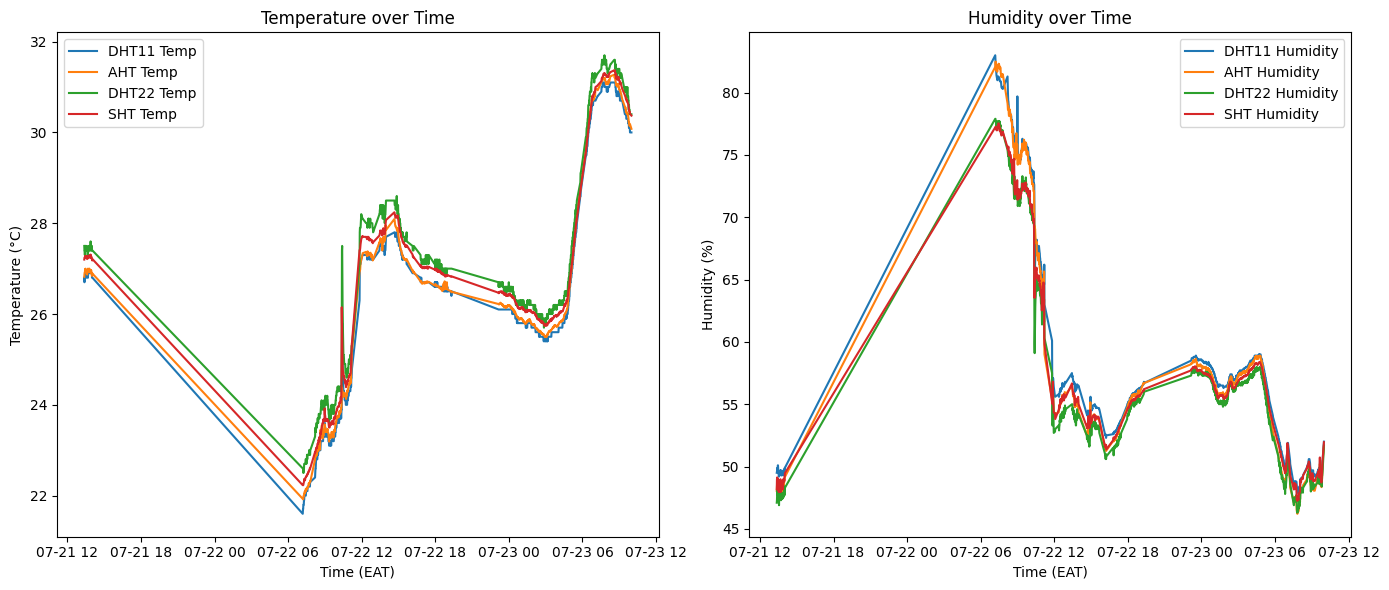

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot temperatures
plt.subplot(1, 2, 1)
plt.plot(df_clean['time'], df_clean['dht11_temp'], label='DHT11 Temp')
plt.plot(df_clean['time'], df_clean['aht_temp'], label='AHT Temp')
plt.plot(df_clean['time'], df_clean['dht22_temp'], label='DHT22 Temp')
plt.plot(df_clean['time'], df_clean['sht_temp'], label='SHT Temp')
plt.xlabel('Time (EAT)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()

# Plot humidities
plt.subplot(1, 2, 2)
plt.plot(df_clean['time'], df_clean['dht11_hum'], label='DHT11 Humidity')
plt.plot(df_clean['time'], df_clean['aht_hum'], label='AHT Humidity')
plt.plot(df_clean['time'], df_clean['dht22_hum'], label='DHT22 Humidity')
plt.plot(df_clean['time'], df_clean['sht_hum'], label='SHT Humidity')
plt.xlabel('Time (EAT)')
plt.ylabel('Humidity (%)')
plt.title('Humidity over Time')
plt.legend()

plt.tight_layout()
plt.show()


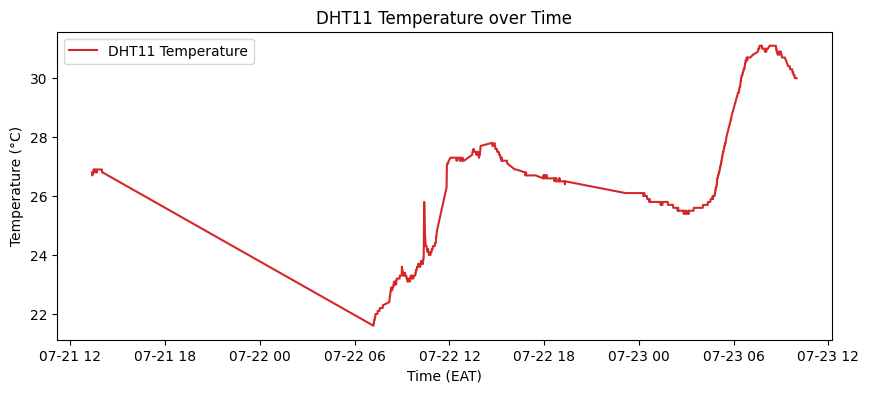

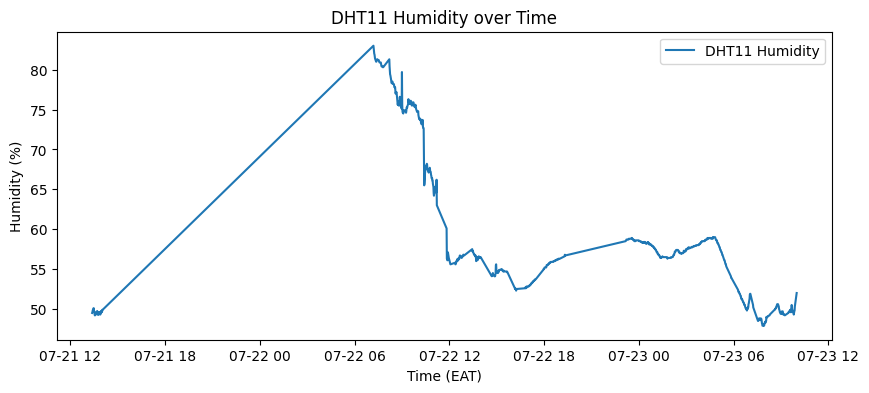

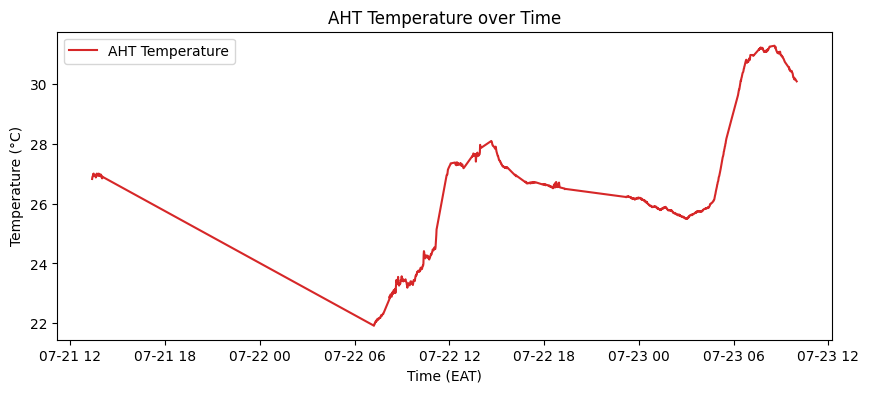

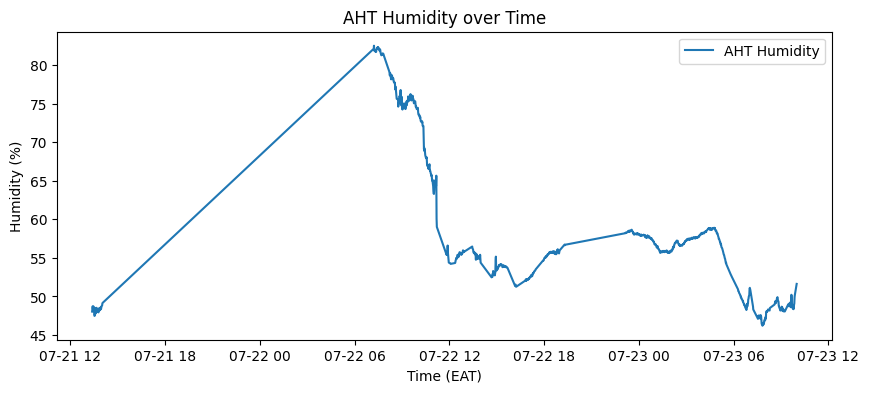

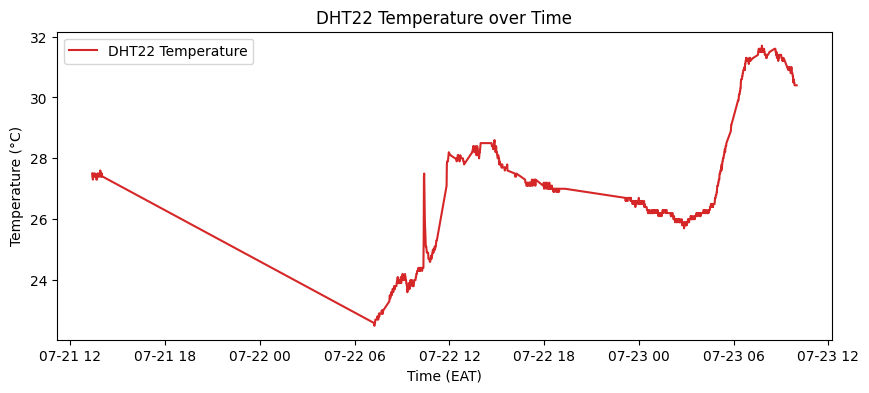

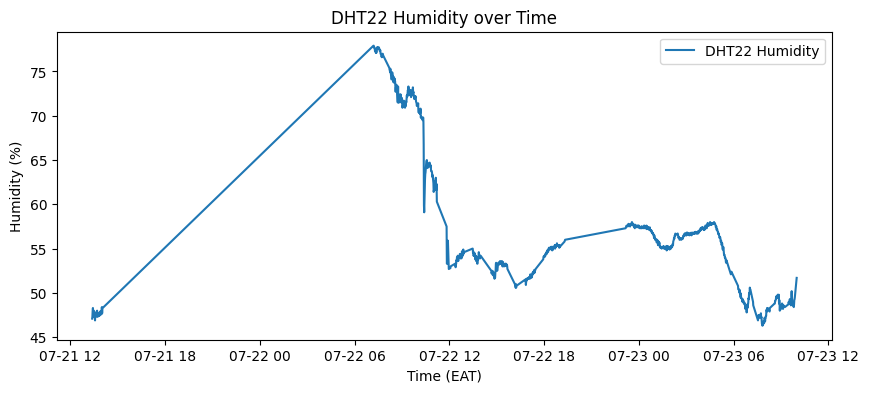

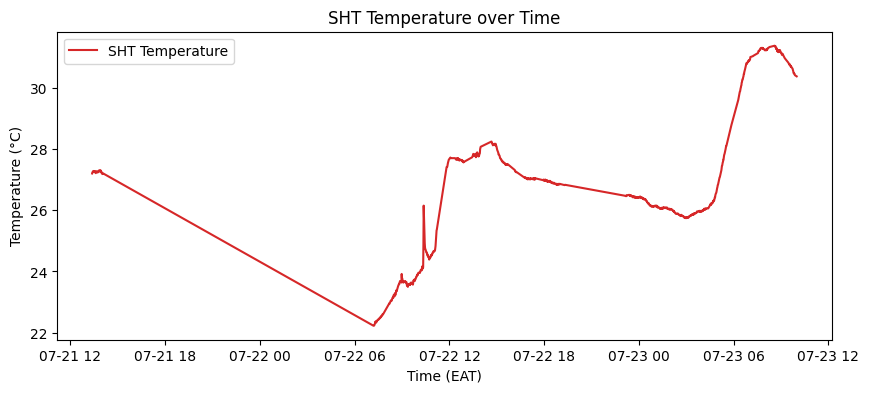

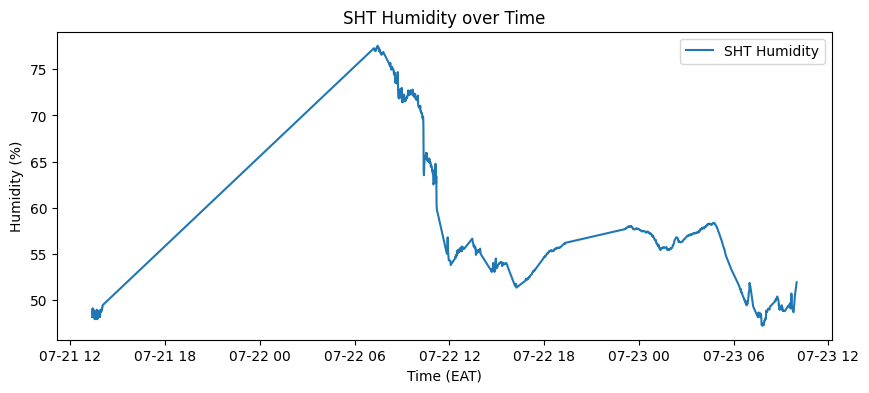

In [126]:


sensors = ['dht11', 'aht', 'dht22', 'sht']

for sensor in sensors:
    plt.figure(figsize=(10,4))
    
    # Temperature plot
    plt.plot(df_clean['time'], df_clean[f'{sensor}_temp'], label=f'{sensor.upper()} Temperature', color='tab:red')
    plt.xlabel('Time (EAT)')
    plt.ylabel('Temperature (°C)')
    plt.title(f'{sensor.upper()} Temperature over Time')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,4))
    # Humidity plot
    plt.plot(df_clean['time'], df_clean[f'{sensor}_hum'], label=f'{sensor.upper()} Humidity', color='tab:blue')
    plt.xlabel('Time (EAT)')
    plt.ylabel('Humidity (%)')
    plt.title(f'{sensor.upper()} Humidity over Time')
    plt.legend()
    plt.show()


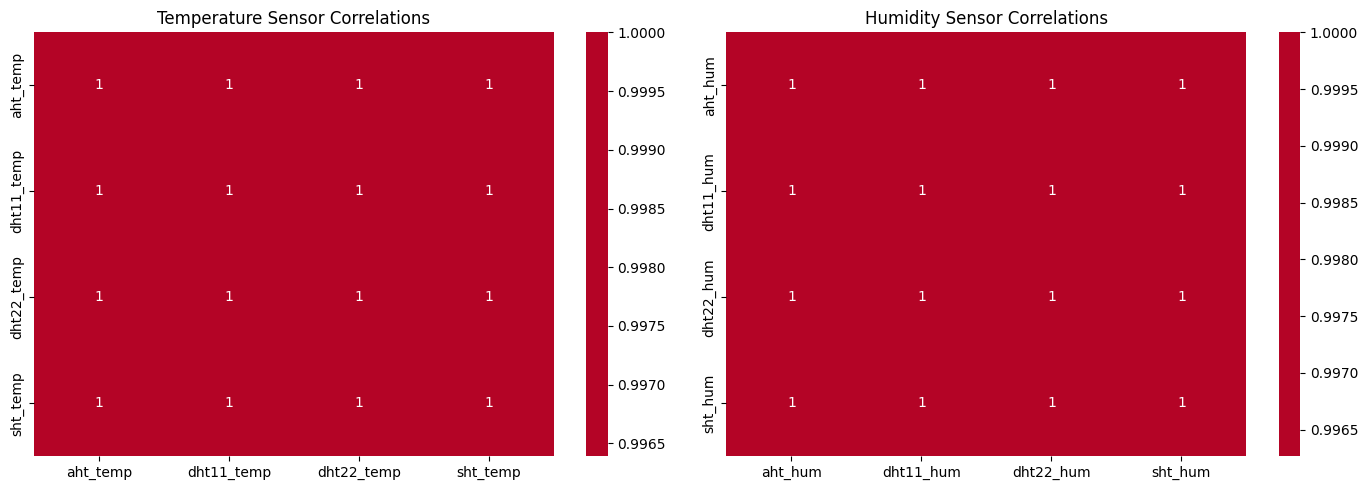

Temperature sensor correlations:
            aht_temp  dht11_temp  dht22_temp  sht_temp
aht_temp    1.000000    0.998833    0.996392  0.998583
dht11_temp  0.998833    1.000000    0.997760  0.998820
dht22_temp  0.996392    0.997760    1.000000  0.997241
sht_temp    0.998583    0.998820    0.997241  1.000000
Humidity sensor correlations:
            aht_hum  dht11_hum  dht22_hum   sht_hum
aht_hum    1.000000   0.997906   0.996821  0.998868
dht11_hum  0.997906   1.000000   0.996265  0.997783
dht22_hum  0.996821   0.996265   1.000000  0.997538
sht_hum    0.998868   0.997783   0.997538  1.000000


In [127]:
import seaborn as sns
# Calculate correlation matrix and create heatmap
# Separate temperature and humidity correlations
temp_cols = ['aht_temp', 'dht11_temp', 'dht22_temp', 'sht_temp']
hum_cols = ['aht_hum', 'dht11_hum', 'dht22_hum', 'sht_hum']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature correlation heatmap
temp_corr = df[temp_cols].corr()
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Temperature Sensor Correlations')

# Humidity correlation heatmap
hum_corr = df[hum_cols].corr()
sns.heatmap(hum_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Humidity Sensor Correlations')

plt.tight_layout()
plt.show()

print("Temperature sensor correlations:")
print(temp_corr)
print("\
Humidity sensor correlations:")
print(hum_corr)

Correlation Matrix:
             aht_hum  aht_temp  dht11_hum  dht11_temp  dht22_hum  dht22_temp  \
aht_hum     1.000000 -0.868295   0.997906   -0.872558   0.996821   -0.856561   
aht_temp   -0.868295  1.000000  -0.859187    0.998833  -0.871097    0.996392   
dht11_hum   0.997906 -0.859187   1.000000   -0.865053   0.996265   -0.848194   
dht11_temp -0.872558  0.998833  -0.865053    1.000000  -0.877448    0.997760   
dht22_hum   0.996821 -0.871097   0.996265   -0.877448   1.000000   -0.864869   
dht22_temp -0.856561  0.996392  -0.848194    0.997760  -0.864869    1.000000   
sht_hum     0.998868 -0.866397   0.997783   -0.871679   0.997538   -0.856393   
sht_temp   -0.874876  0.998583  -0.866579    0.998820  -0.879369    0.997241   

             sht_hum  sht_temp  
aht_hum     0.998868 -0.874876  
aht_temp   -0.866397  0.998583  
dht11_hum   0.997783 -0.866579  
dht11_temp -0.871679  0.998820  
dht22_hum   0.997538 -0.879369  
dht22_temp -0.856393  0.997241  
sht_hum     1.000000 -0.8747

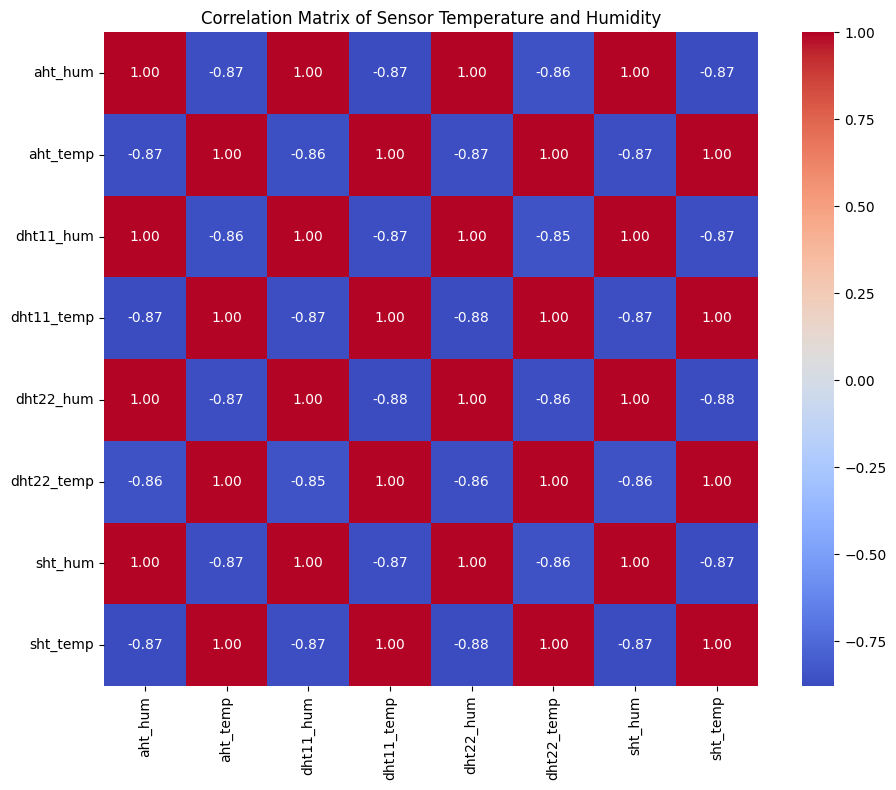

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


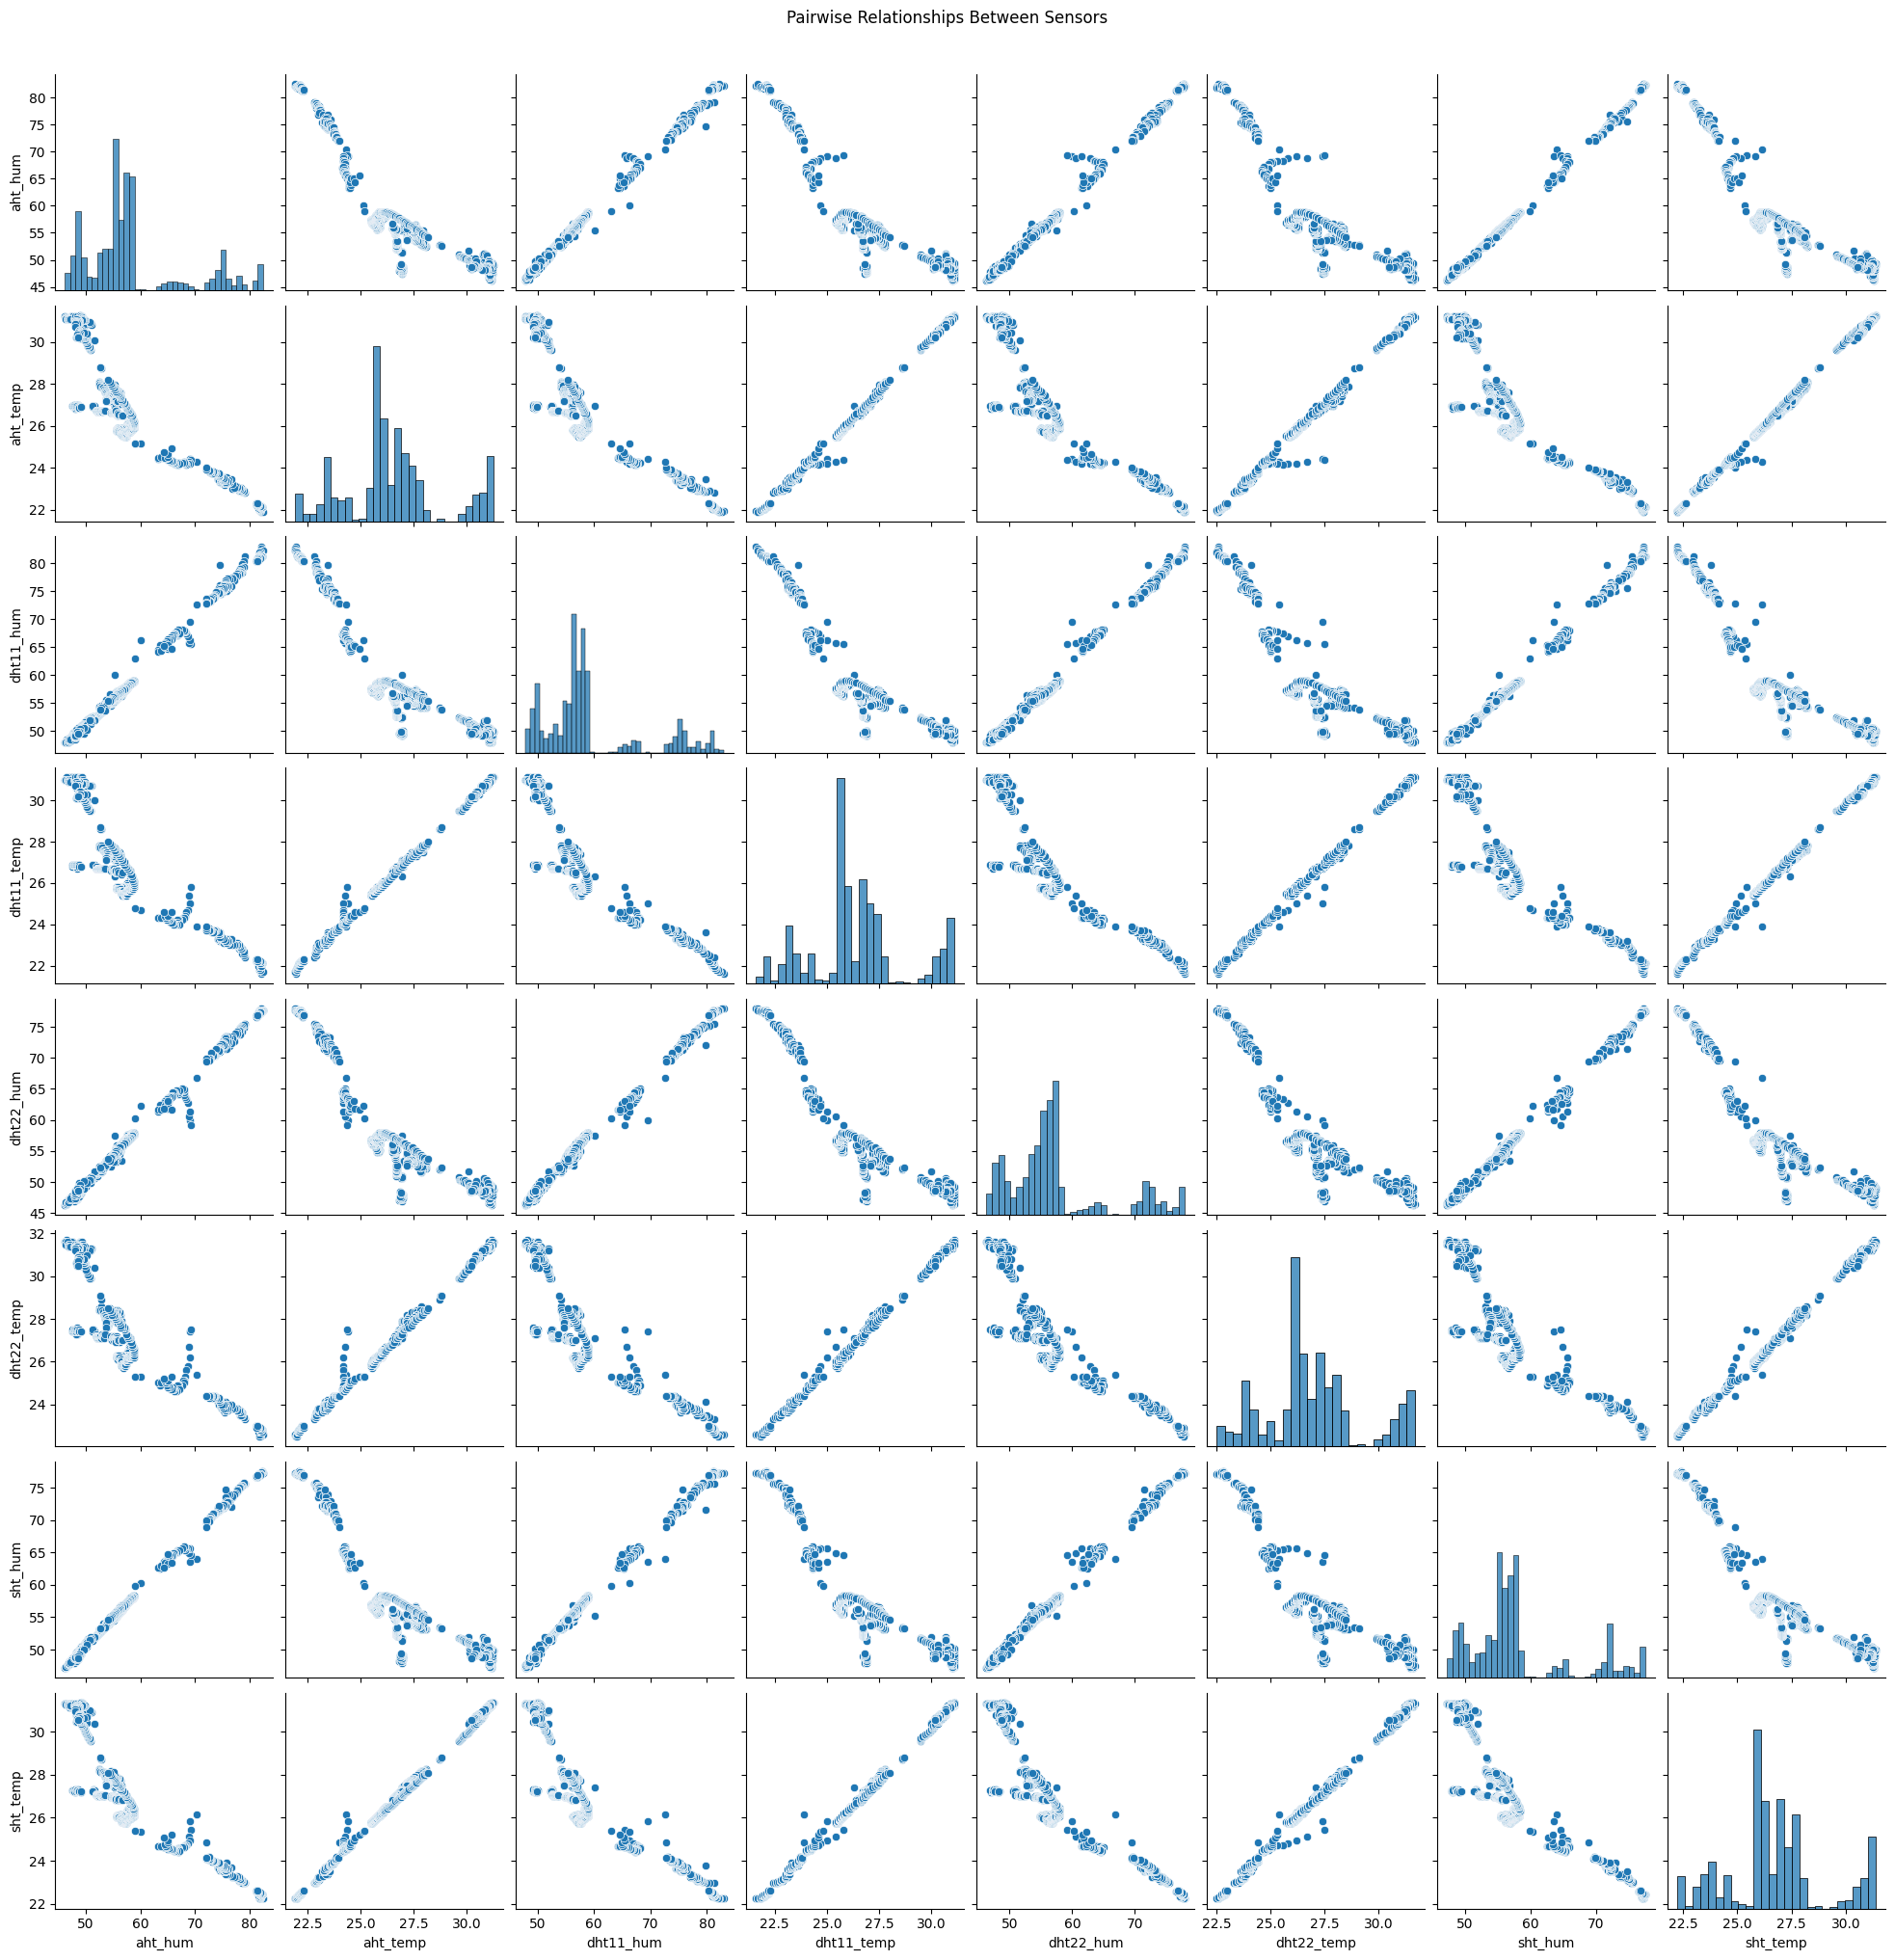

In [128]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'time' column to avoid errors in correlation
df_clean = df.drop(columns=['time'])

# Calculate correlation matrix
corr_matrix = df_clean.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Sensor Temperature and Humidity')
plt.tight_layout()
plt.show()

# Optional: Pairplot to explore pairwise relationships
sns.pairplot(df_clean, vars=[
    'aht_hum', 'aht_temp',
    'dht11_hum', 'dht11_temp',
    'dht22_hum', 'dht22_temp',
    'sht_hum', 'sht_temp'
])
plt.suptitle("Pairwise Relationships Between Sensors", y=1.02)
plt.show()


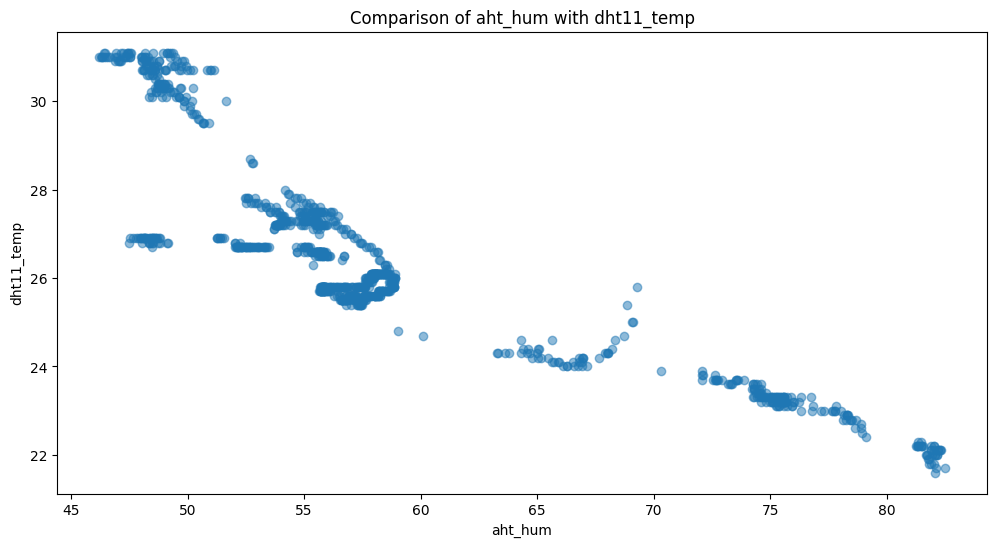

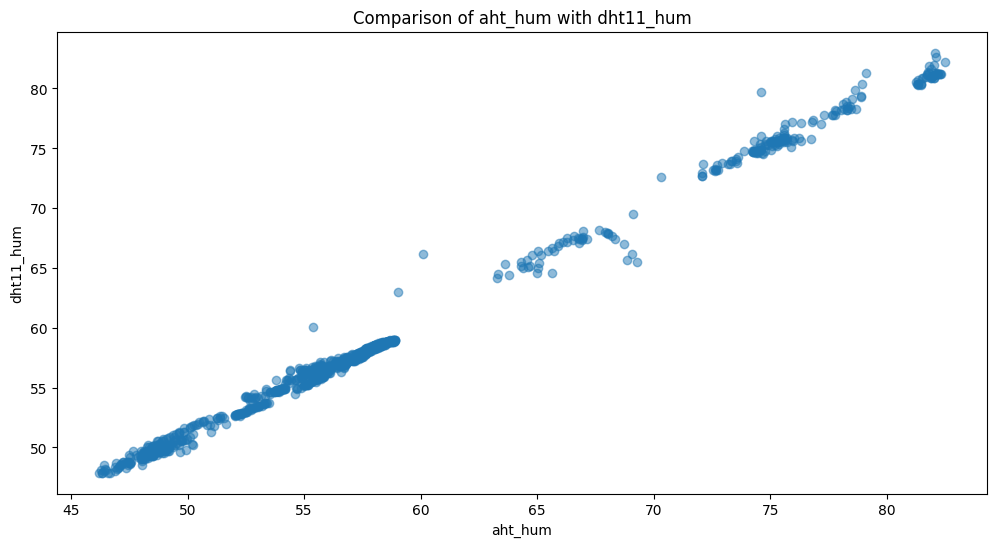

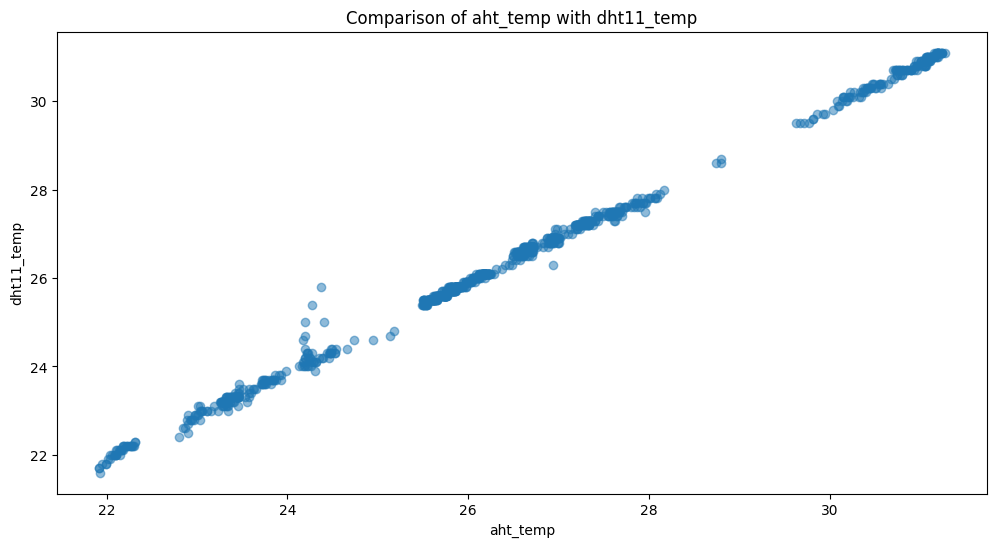

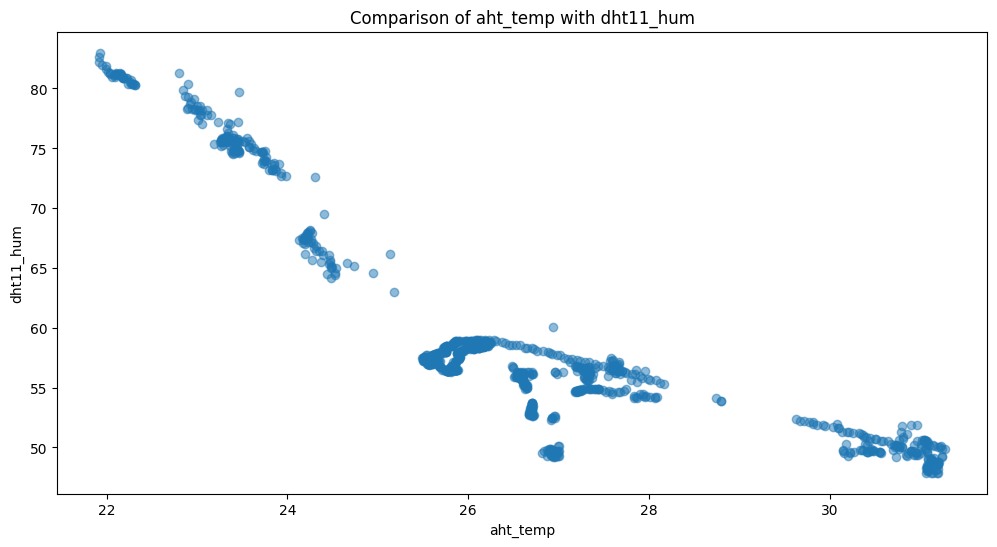

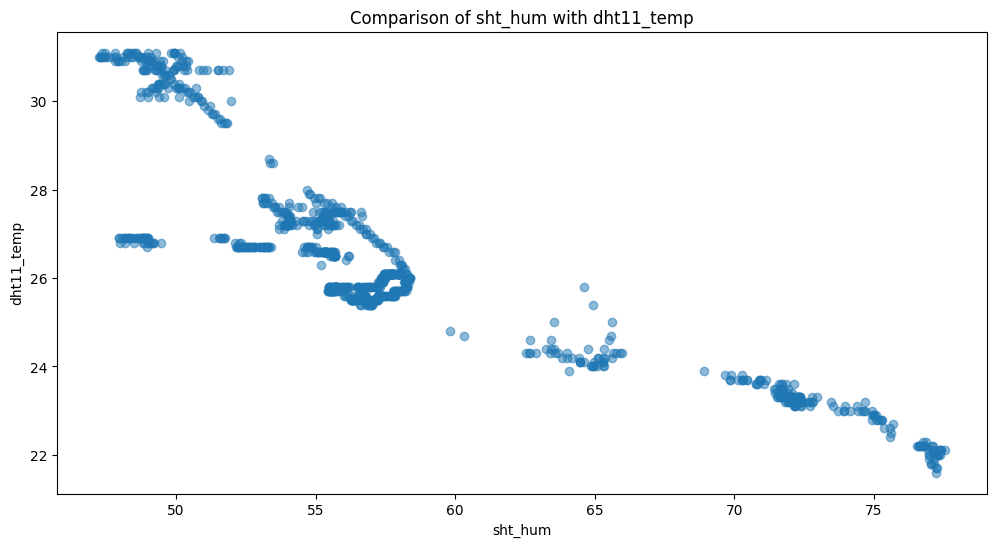

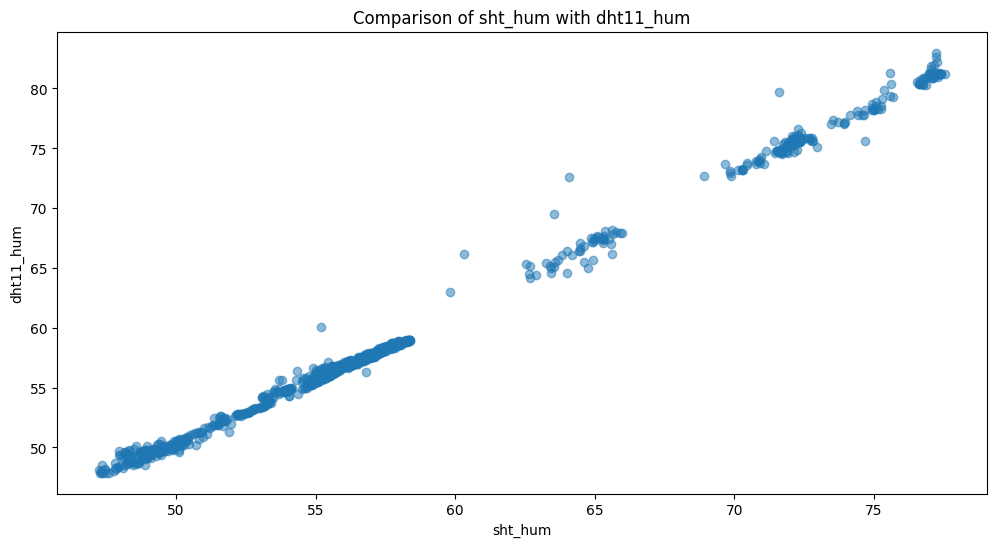

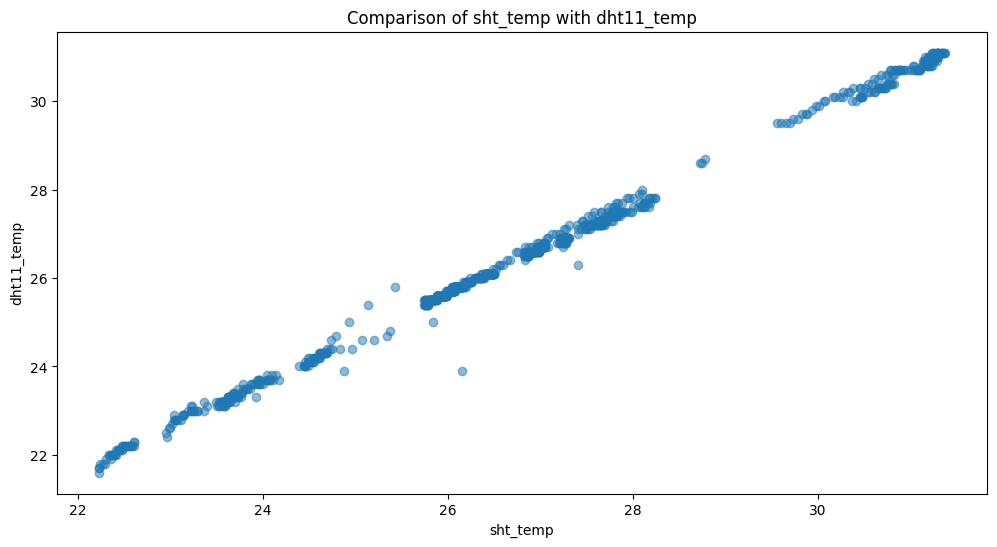

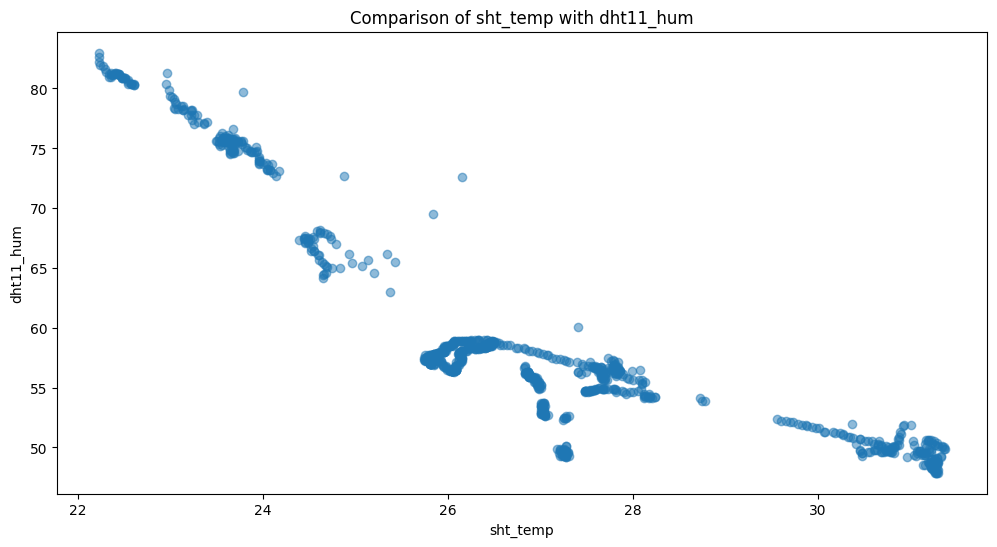

In [129]:
# The pairplot and heatmap are already generated and shown.
# Now, let's focus on detailed scatter plots for each sensor against dht11 sensors.
# This will help us visually assess the linearity and correlation strength.

sensors = ['aht_hum', 'aht_temp', 'sht_hum', 'sht_temp']
for sensor in sensors:
    plt.figure(figsize=(12, 6))
    plt.scatter(df[sensor], df['dht11_temp'], alpha=0.5)
    plt.xlabel(sensor)
    plt.ylabel('dht11_temp')
    plt.title('Comparison of ' + sensor + ' with dht11_temp')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.scatter(df[sensor], df['dht11_hum'], alpha=0.5)
    plt.xlabel(sensor)
    plt.ylabel('dht11_hum')
    plt.title('Comparison of ' + sensor + ' with dht11_hum')
    plt.show()

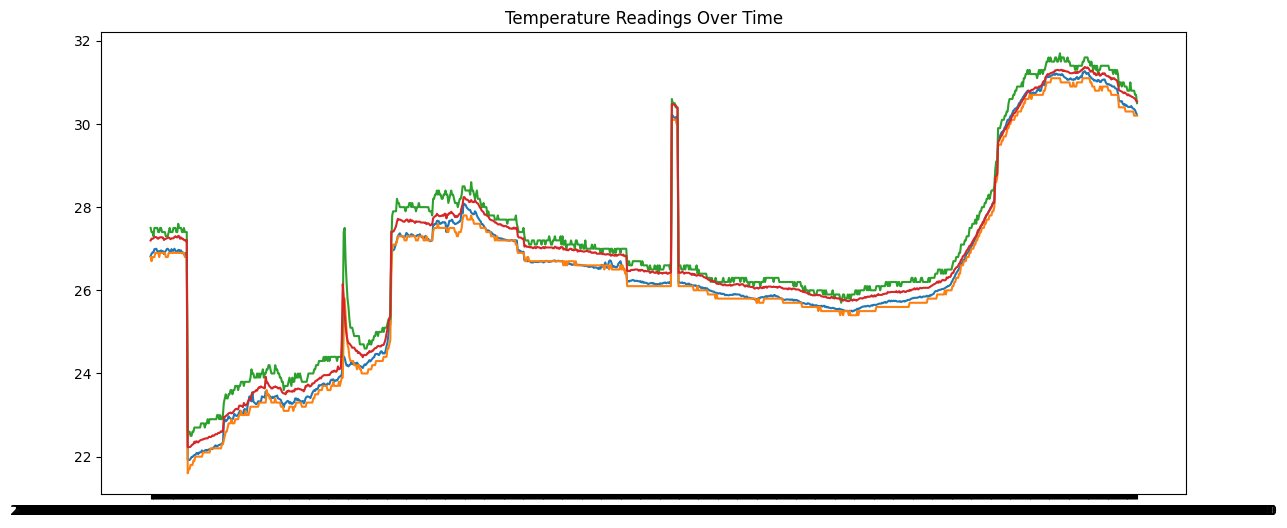

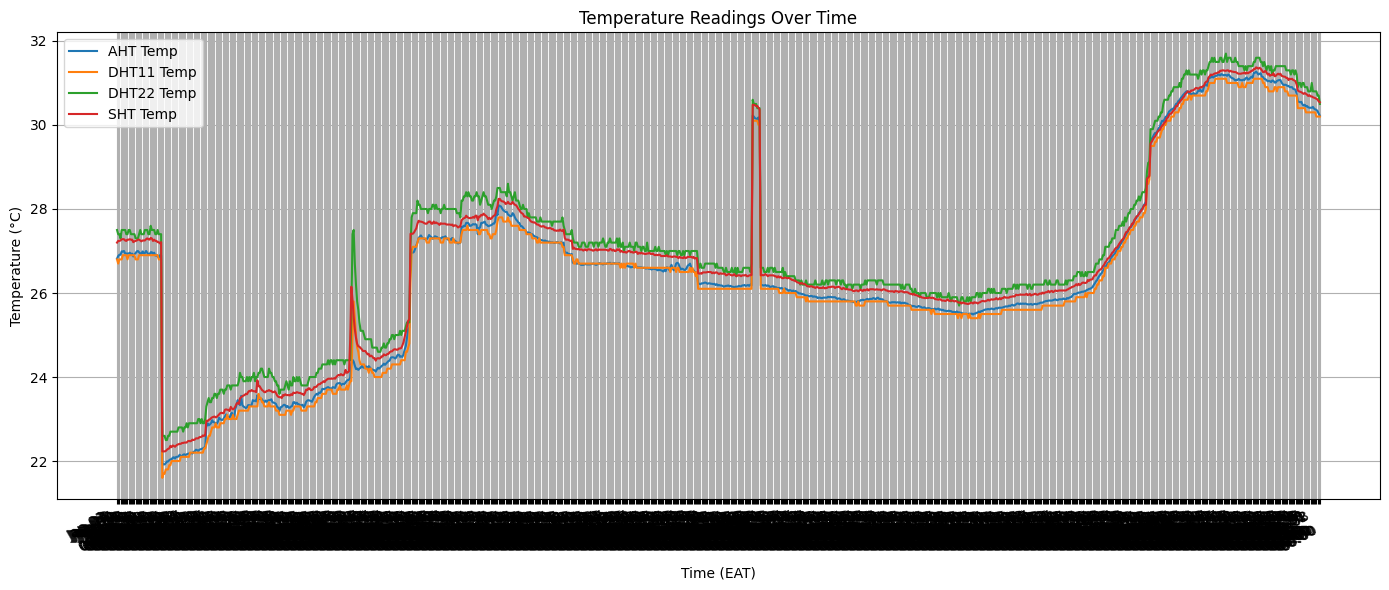

In [130]:
import matplotlib.dates as mdates
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['aht_temp'], label='AHT Temp')
plt.plot(df['time'], df['dht11_temp'], label='DHT11 Temp')
plt.plot(df['time'], df['dht22_temp'], label='DHT22 Temp')
plt.plot(df['time'], df['sht_temp'], label='SHT Temp')

plt.title("Temperature Readings Over Time")

plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['aht_temp'], label='AHT Temp')
plt.plot(df['time'], df['dht11_temp'], label='DHT11 Temp')
plt.plot(df['time'], df['dht22_temp'], label='DHT22 Temp')
plt.plot(df['time'], df['sht_temp'], label='SHT Temp')

plt.title("Temperature Readings Over Time")
plt.xlabel("Time (EAT)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)

# Format x-axis to show day and hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n%H:%M'))  # e.g. Jul 29, 13:00
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()




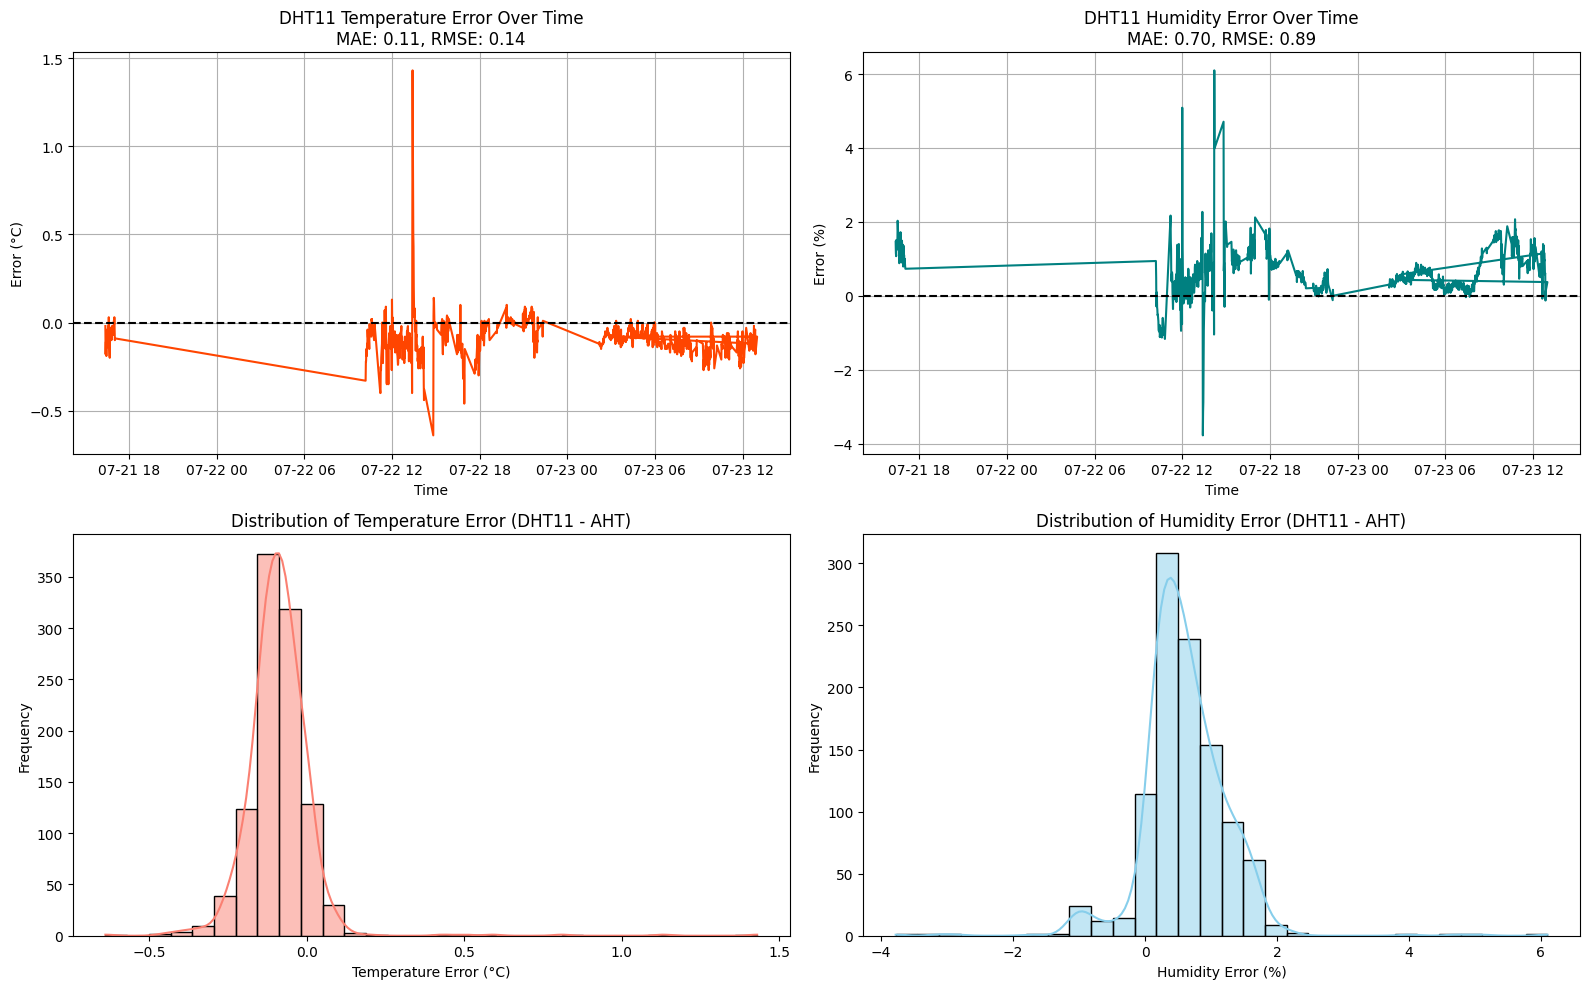

In [131]:
#AHT AS GROUND RUTH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure 'time' is datetime
df['time'] = pd.to_datetime(df['time'])

# Calculate signed and absolute errors
df['temp_error'] = df['dht11_temp'] - df['aht_temp']
df['hum_error'] = df['dht11_hum'] - df['aht_hum']
df['abs_temp_error'] = df['temp_error'].abs()
df['abs_hum_error'] = df['hum_error'].abs()

# Calculate MAE and RMSE
mae_temp = mean_absolute_error(df['aht_temp'], df['dht11_temp'])
rmse_temp = np.sqrt(mean_squared_error(df['aht_temp'], df['dht11_temp']))
mae_hum = mean_absolute_error(df['aht_hum'], df['dht11_hum'])
rmse_hum = np.sqrt(mean_squared_error(df['aht_hum'], df['dht11_hum']))

# Plotting: 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Time Series: Temperature Error
axs[0, 0].plot(df['time'], df['temp_error'], color='orangered')
axs[0, 0].axhline(0, color='black', linestyle='--')
axs[0, 0].set_title(f"DHT11 Temperature Error Over Time\nMAE: {mae_temp:.2f}, RMSE: {rmse_temp:.2f}")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Error (°C)")
axs[0, 0].grid(True)

# Time Series: Humidity Error
axs[0, 1].plot(df['time'], df['hum_error'], color='teal')
axs[0, 1].axhline(0, color='black', linestyle='--')
axs[0, 1].set_title(f"DHT11 Humidity Error Over Time\nMAE: {mae_hum:.2f}, RMSE: {rmse_hum:.2f}")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Error (%)")
axs[0, 1].grid(True)

# Histogram: Temperature Error
sns.histplot(df['temp_error'], bins=30, kde=True, color='salmon', ax=axs[1, 0])
axs[1, 0].set_title("Distribution of Temperature Error (DHT11 - AHT)")
axs[1, 0].set_xlabel("Temperature Error (°C)")
axs[1, 0].set_ylabel("Frequency")

# Histogram: Humidity Error
sns.histplot(df['hum_error'], bins=30, kde=True, color='skyblue', ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Humidity Error (DHT11 - AHT)")
axs[1, 1].set_xlabel("Humidity Error (%)")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


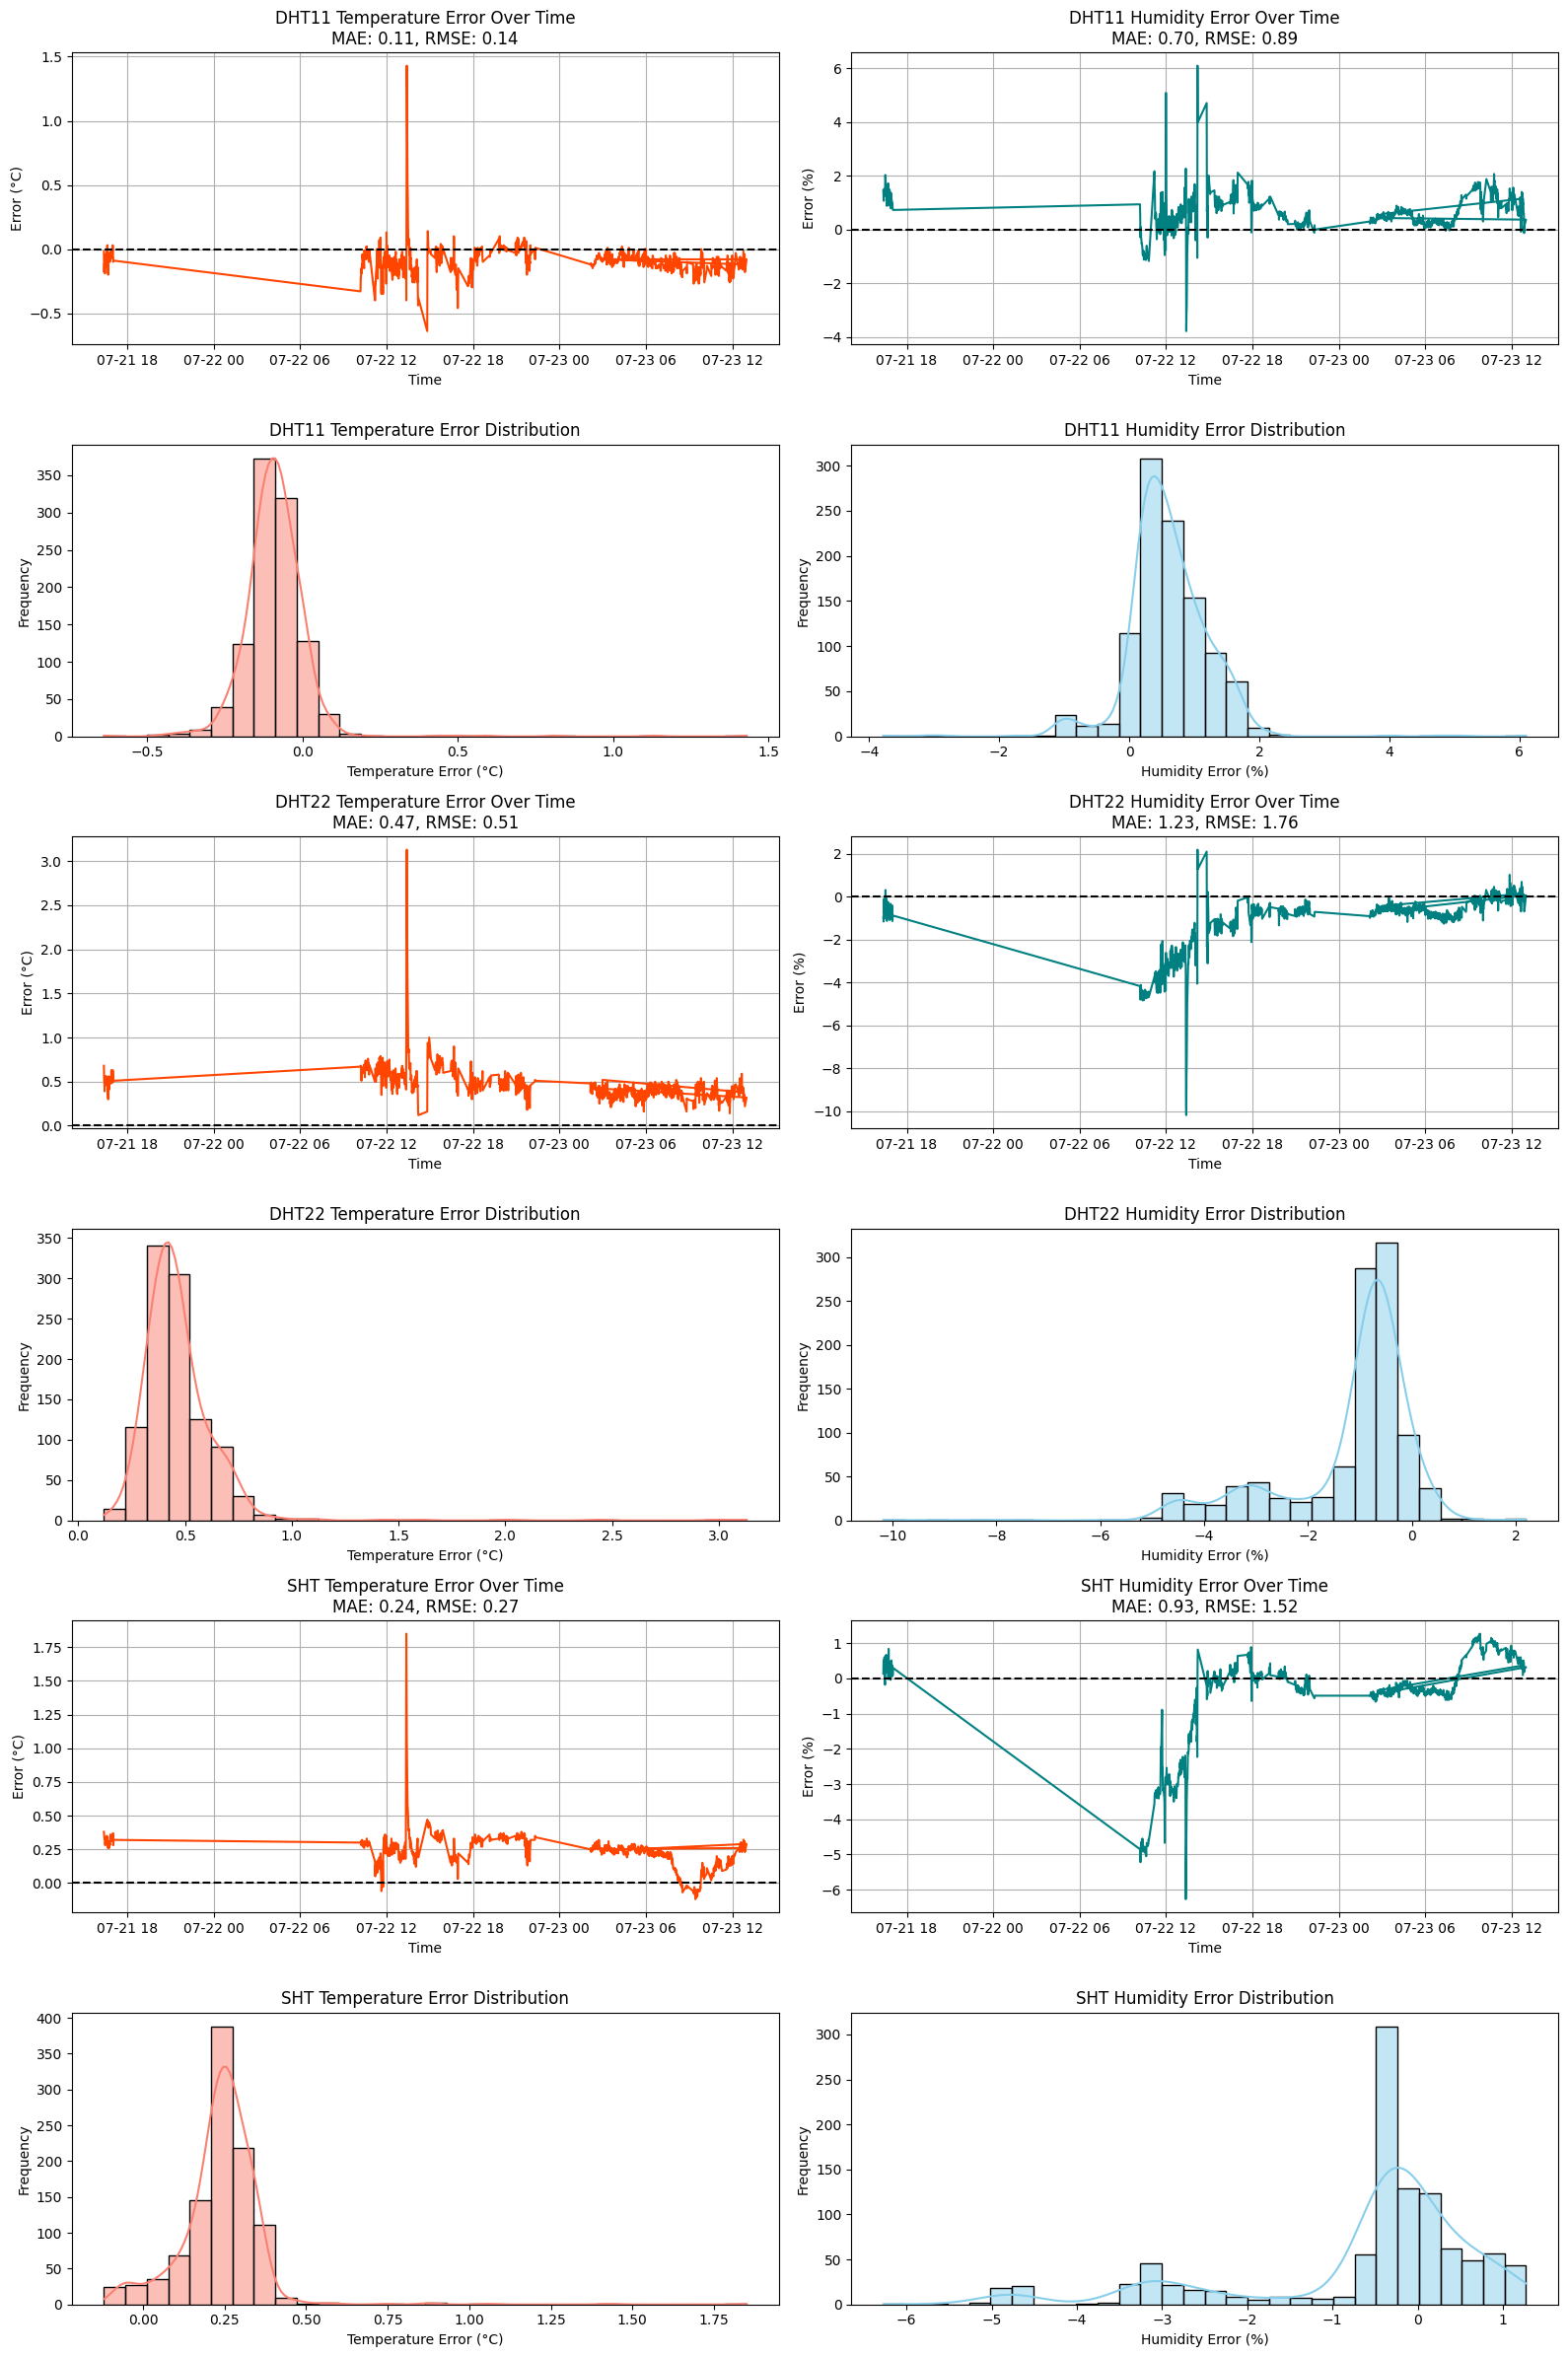

In [132]:
#USING THE AHT SENSOR AS THE REFERENCE SENSOR

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Sensors to compare (DHT11, DHT22, SHT) against AHT (reference)
sensor_list = ['dht11', 'dht22', 'sht']
variables = ['temp', 'hum']

# Prepare a plot grid: 3 sensors × 2 variables = 6 rows, each with 2 plots (time series + hist)
fig, axs = plt.subplots(len(sensor_list)*2, 2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.5)

for i, sensor in enumerate(sensor_list):
    # Calculate errors
    df[f'{sensor}_temp_error'] = df[f'{sensor}_temp'] - df['aht_temp']
    df[f'{sensor}_hum_error'] = df[f'{sensor}_hum'] - df['aht_hum']
    
    # Calculate MAE and RMSE for temperature
    mae_temp = mean_absolute_error(df['aht_temp'], df[f'{sensor}_temp'])
    rmse_temp = np.sqrt(mean_squared_error(df['aht_temp'], df[f'{sensor}_temp']))
    
    # Calculate MAE and RMSE for humidity
    mae_hum = mean_absolute_error(df['aht_hum'], df[f'{sensor}_hum'])
    rmse_hum = np.sqrt(mean_squared_error(df['aht_hum'], df[f'{sensor}_hum']))
    
    # Plot temperature error time series
    axs[i*2, 0].plot(df['time'], df[f'{sensor}_temp_error'], color='orangered')
    axs[i*2, 0].axhline(0, color='black', linestyle='--')
    axs[i*2, 0].set_title(f"{sensor.upper()} Temperature Error Over Time\nMAE: {mae_temp:.2f}, RMSE: {rmse_temp:.2f}")
    axs[i*2, 0].set_xlabel("Time")
    axs[i*2, 0].set_ylabel("Error (°C)")
    axs[i*2, 0].grid(True)
    
    # Plot humidity error time series
    axs[i*2, 1].plot(df['time'], df[f'{sensor}_hum_error'], color='teal')
    axs[i*2, 1].axhline(0, color='black', linestyle='--')
    axs[i*2, 1].set_title(f"{sensor.upper()} Humidity Error Over Time\nMAE: {mae_hum:.2f}, RMSE: {rmse_hum:.2f}")
    axs[i*2, 1].set_xlabel("Time")
    axs[i*2, 1].set_ylabel("Error (%)")
    axs[i*2, 1].grid(True)
    
    # Histogram temperature error
    sns.histplot(df[f'{sensor}_temp_error'], bins=30, kde=True, color='salmon', ax=axs[i*2+1, 0])
    axs[i*2+1, 0].set_title(f"{sensor.upper()} Temperature Error Distribution")
    axs[i*2+1, 0].set_xlabel("Temperature Error (°C)")
    axs[i*2+1, 0].set_ylabel("Frequency")
    
    # Histogram humidity error
    sns.histplot(df[f'{sensor}_hum_error'], bins=30, kde=True, color='skyblue', ax=axs[i*2+1, 1])
    axs[i*2+1, 1].set_title(f"{sensor.upper()} Humidity Error Distribution")
    axs[i*2+1, 1].set_xlabel("Humidity Error (%)")
    axs[i*2+1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


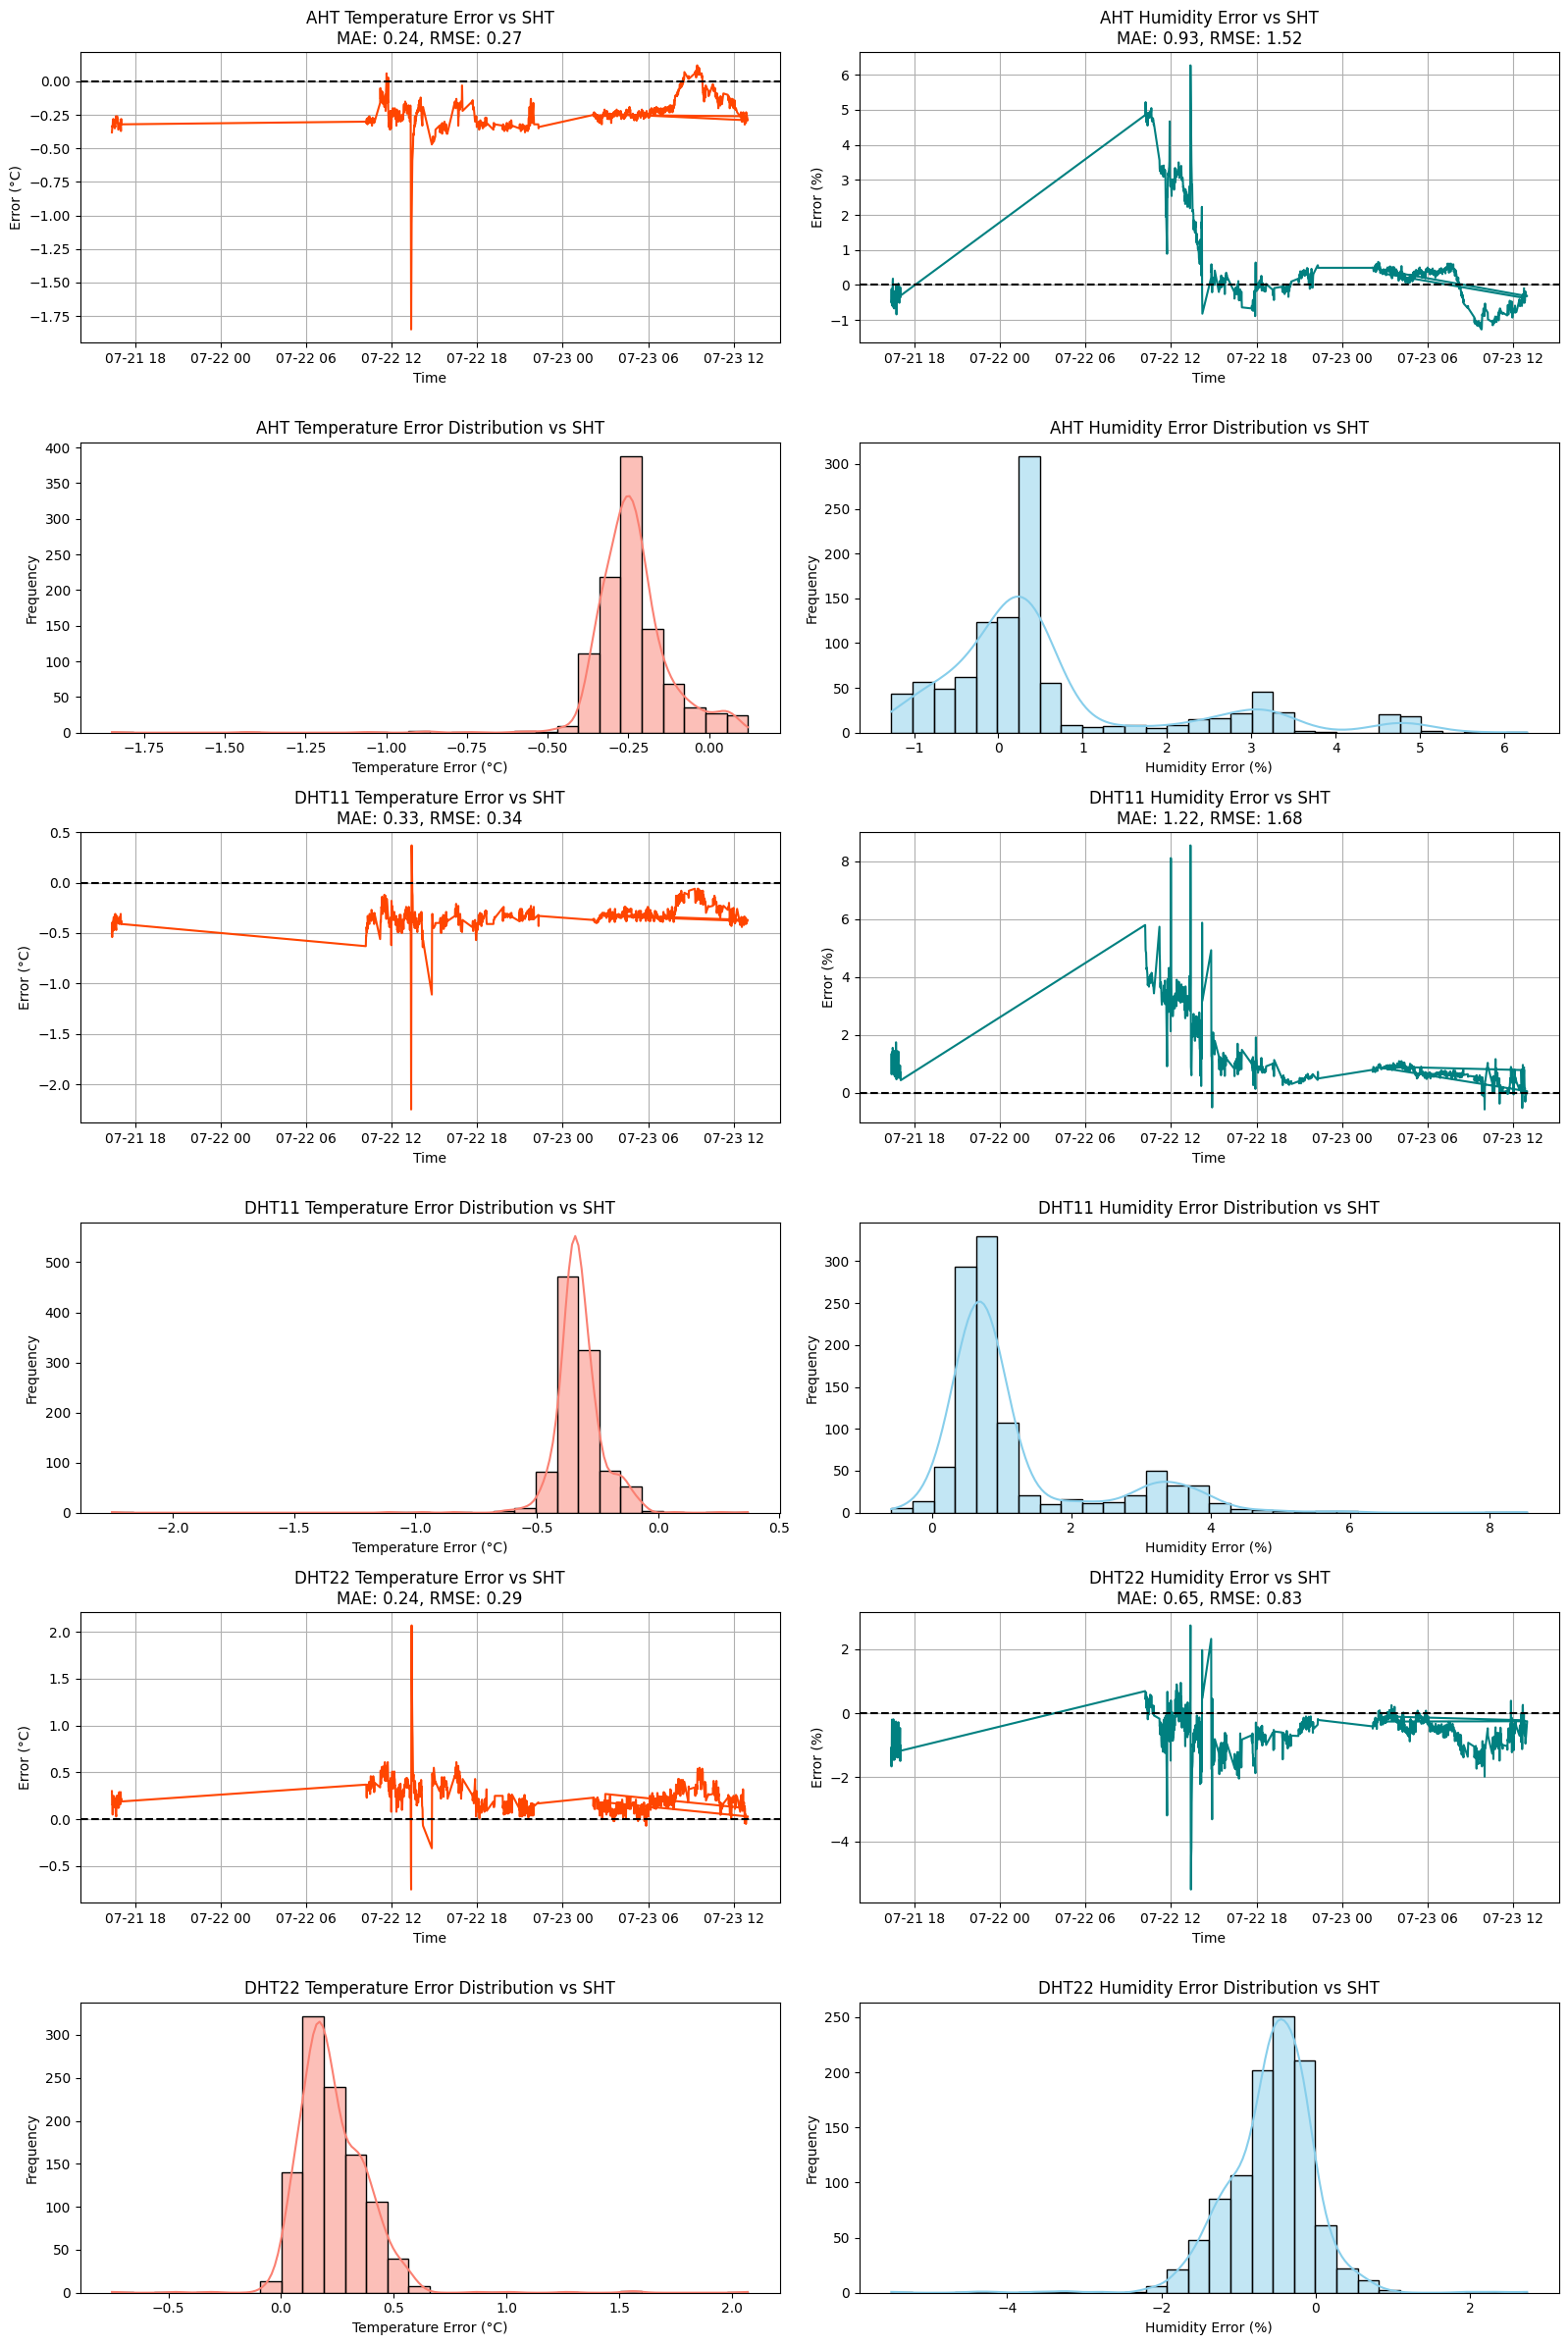

In [133]:
# Sensors to evaluate against SHT


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

sensor_list = ['aht', 'dht11', 'dht22']

fig, axs = plt.subplots(len(sensor_list)*2, 2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.5)

for i, sensor in enumerate(sensor_list):
    # Calculate errors vs SHT
    df[f'{sensor}_temp_error'] = df[f'{sensor}_temp'] - df['sht_temp']
    df[f'{sensor}_hum_error'] = df[f'{sensor}_hum'] - df['sht_hum']
    
    # MAE and RMSE for temp
    mae_temp = mean_absolute_error(df['sht_temp'], df[f'{sensor}_temp'])
    rmse_temp = np.sqrt(mean_squared_error(df['sht_temp'], df[f'{sensor}_temp']))
    
    # MAE and RMSE for hum
    mae_hum = mean_absolute_error(df['sht_hum'], df[f'{sensor}_hum'])
    rmse_hum = np.sqrt(mean_squared_error(df['sht_hum'], df[f'{sensor}_hum']))
    
    # Plot temperature error time series
    axs[i*2, 0].plot(df['time'], df[f'{sensor}_temp_error'], color='orangered')
    axs[i*2, 0].axhline(0, color='black', linestyle='--')
    axs[i*2, 0].set_title(f"{sensor.upper()} Temperature Error vs SHT\nMAE: {mae_temp:.2f}, RMSE: {rmse_temp:.2f}")
    axs[i*2, 0].set_xlabel("Time")
    axs[i*2, 0].set_ylabel("Error (°C)")
    axs[i*2, 0].grid(True)
    
    # Plot humidity error time series
    axs[i*2, 1].plot(df['time'], df[f'{sensor}_hum_error'], color='teal')
    axs[i*2, 1].axhline(0, color='black', linestyle='--')
    axs[i*2, 1].set_title(f"{sensor.upper()} Humidity Error vs SHT\nMAE: {mae_hum:.2f}, RMSE: {rmse_hum:.2f}")
    axs[i*2, 1].set_xlabel("Time")
    axs[i*2, 1].set_ylabel("Error (%)")
    axs[i*2, 1].grid(True)
    
    # Histogram temperature error
    sns.histplot(df[f'{sensor}_temp_error'], bins=30, kde=True, color='salmon', ax=axs[i*2+1, 0])
    axs[i*2+1, 0].set_title(f"{sensor.upper()} Temperature Error Distribution vs SHT")
    axs[i*2+1, 0].set_xlabel("Temperature Error (°C)")
    axs[i*2+1, 0].set_ylabel("Frequency")
    
    # Histogram humidity error
    sns.histplot(df[f'{sensor}_hum_error'], bins=30, kde=True, color='skyblue', ax=axs[i*2+1, 1])
    axs[i*2+1, 1].set_title(f"{sensor.upper()} Humidity Error Distribution vs SHT")
    axs[i*2+1, 1].set_xlabel("Humidity Error (%)")
    axs[i*2+1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


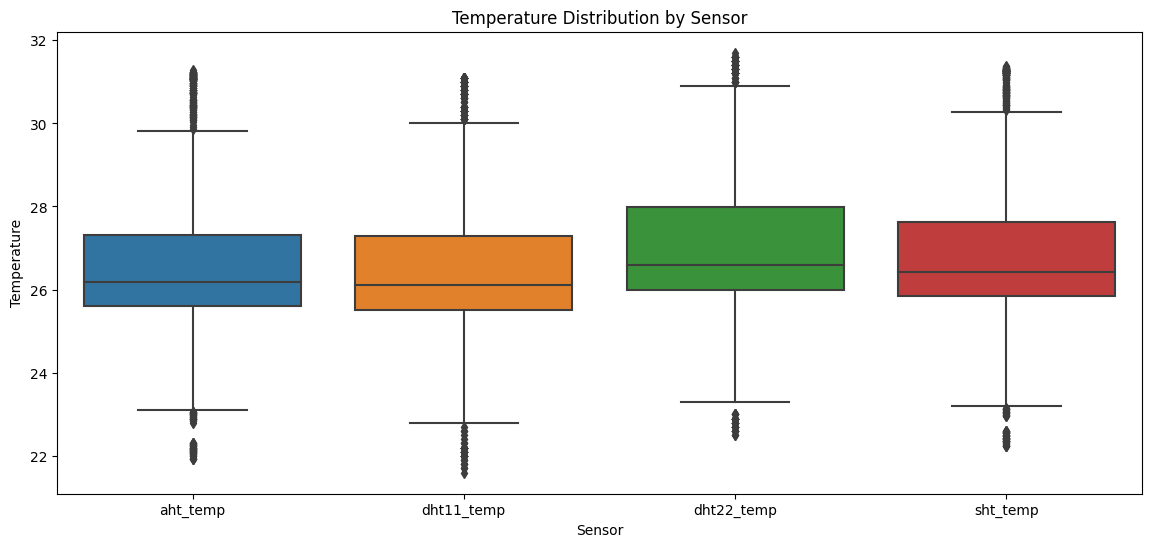

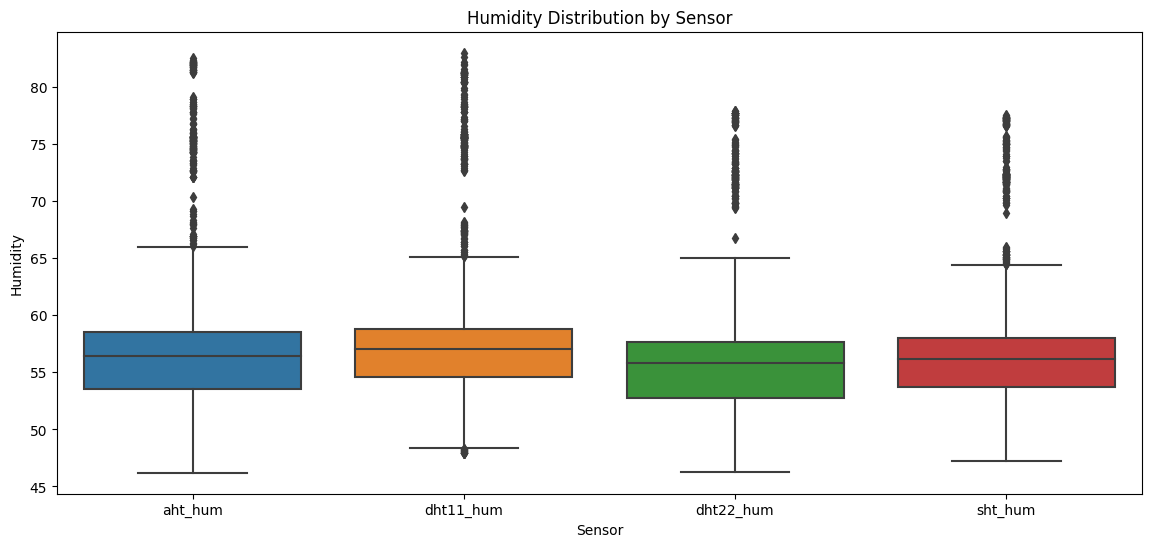

In [134]:
#BOX PLOTS FOR BOTH TEMPERATURE AND HUMIDITY

import seaborn as sns
import matplotlib.pyplot as plt

# Prepare dataframe in long format for easier plotting
temp_df = df.melt(id_vars=['time'], value_vars=['aht_temp', 'dht11_temp', 'dht22_temp', 'sht_temp'],
                  var_name='Sensor', value_name='Temperature')
hum_df = df.melt(id_vars=['time'], value_vars=['aht_hum', 'dht11_hum', 'dht22_hum', 'sht_hum'],
                 var_name='Sensor', value_name='Humidity')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Sensor', y='Temperature', data=temp_df)
plt.title('Temperature Distribution by Sensor')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Sensor', y='Humidity', data=hum_df)
plt.title('Humidity Distribution by Sensor')
plt.show()


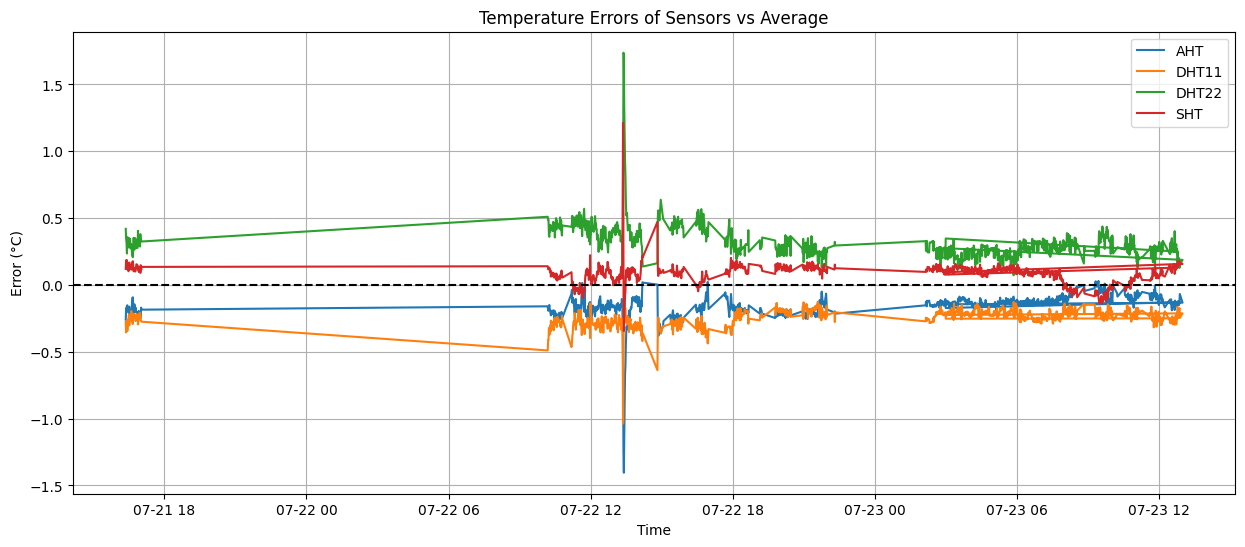

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Sensors in the dataset
temp_sensors = ['aht_temp', 'dht11_temp', 'dht22_temp', 'sht_temp']
hum_sensors = ['aht_hum', 'dht11_hum', 'dht22_hum', 'sht_hum']

# Calculate average sensor readings (pseudo-ground truth)
df['avg_temp'] = df[temp_sensors].mean(axis=1)
df['avg_hum'] = df[hum_sensors].mean(axis=1)

# Calculate errors for each sensor vs average
for sensor in temp_sensors:
    err_col = sensor.replace('_temp', '_temp_error')
    df[err_col] = df[sensor] - df['avg_temp']

for sensor in hum_sensors:
    err_col = sensor.replace('_hum', '_hum_error')
    df[err_col] = df[sensor] - df['avg_hum']

# Example: Plot time series of temperature errors for all sensors
plt.figure(figsize=(15, 6))
for sensor in temp_sensors:
    err_col = sensor.replace('_temp', '_temp_error')
    plt.plot(df['time'], df[err_col], label=sensor.replace('_temp', '').upper())
plt.axhline(0, color='black', linestyle='--')
plt.title("Temperature Errors of Sensors vs Average")
plt.xlabel("Time")
plt.ylabel("Error (°C)")
plt.legend()
plt.grid(True)
plt.show()




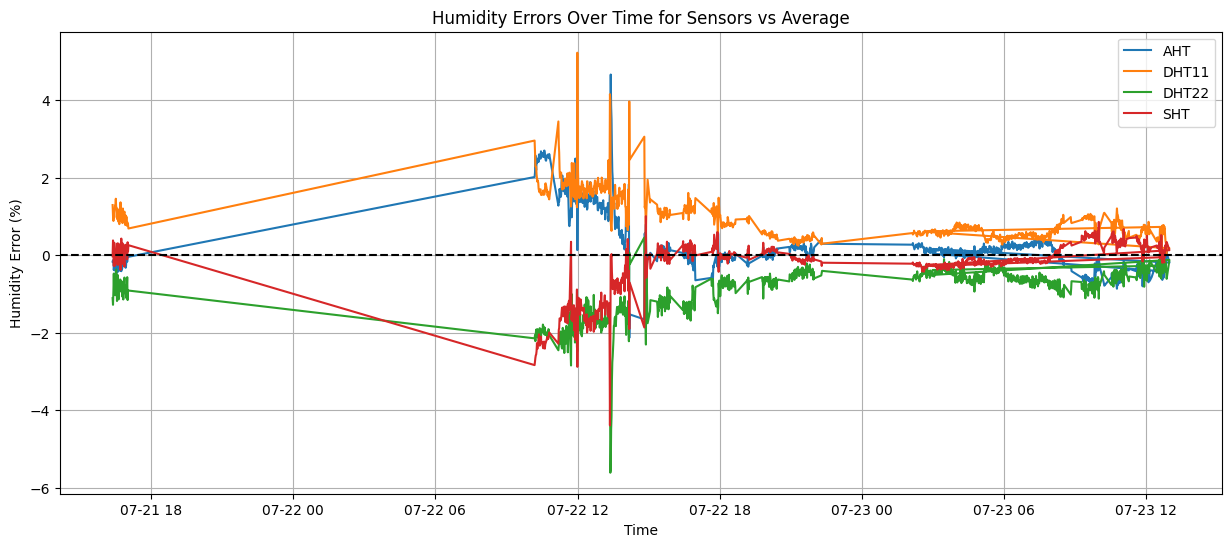

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

for sensor in hum_sensors:
    err_col = sensor.replace('_hum', '_hum_error')
    plt.plot(df['time'], df[err_col], label=sensor.replace('_hum', '').upper())

plt.axhline(0, color='black', linestyle='--')
plt.title("Humidity Errors Over Time for Sensors vs Average")
plt.xlabel("Time")
plt.ylabel("Humidity Error (%)")
plt.legend()
plt.grid(True)
plt.show()


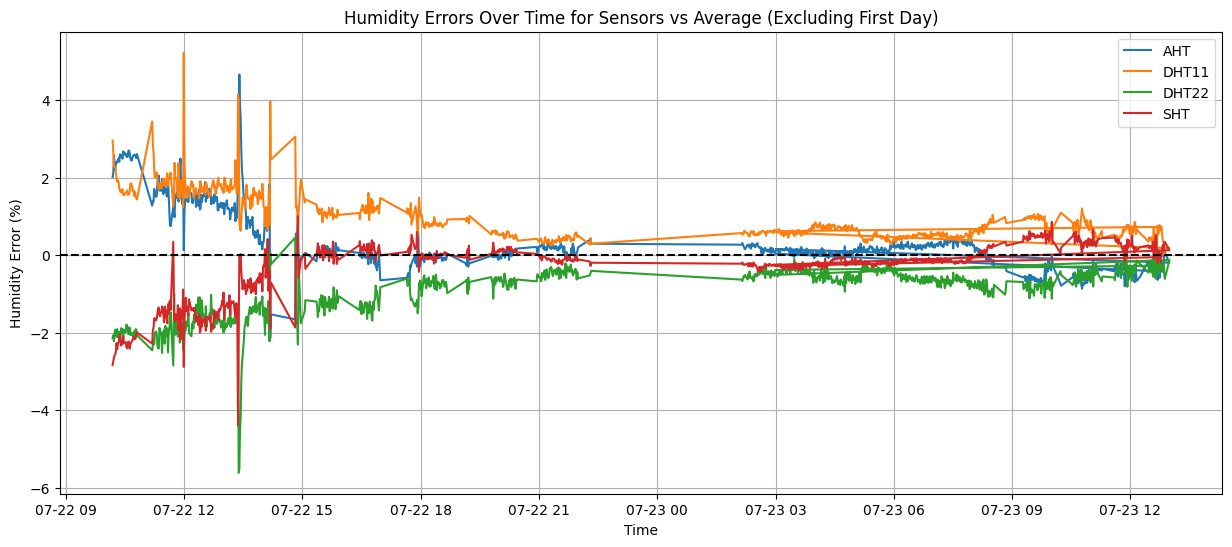

In [137]:
#eliminating the first day

# Convert 'time' to datetime if not already 
df['time'] = pd.to_datetime(df['time'])

# Get the date of the first day
first_day = df['time'].dt.date.min()

# Filter out the first day
df_no_first_day = df[df['time'].dt.date != first_day].copy()

# Now do your analysis/plots on df_no_first_day instead of df

# For example, plotting humidity errors time series without first day
plt.figure(figsize=(15, 6))

for sensor in hum_sensors:
    err_col = sensor.replace('_hum', '_hum_error')
    plt.plot(df_no_first_day['time'], df_no_first_day[err_col], label=sensor.replace('_hum', '').upper())

plt.axhline(0, color='black', linestyle='--')
plt.title("Humidity Errors Over Time for Sensors vs Average (Excluding First Day)")
plt.xlabel("Time")
plt.ylabel("Humidity Error (%)")
plt.legend()
plt.grid(True)
plt.show()


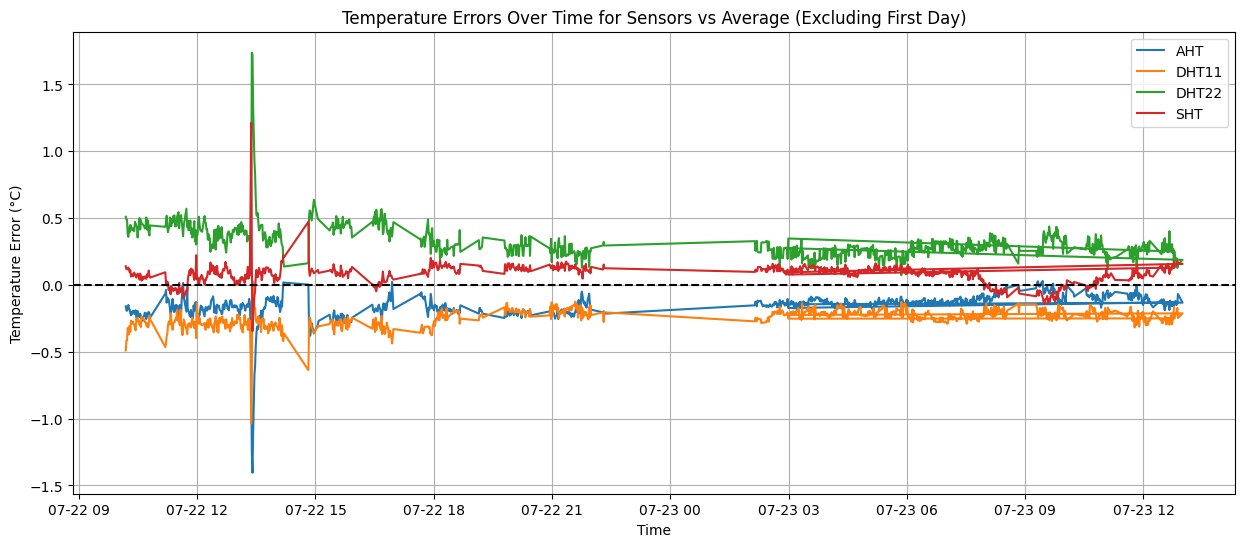

In [138]:
plt.figure(figsize=(15, 6))

for sensor in temp_sensors:
    err_col = sensor.replace('_temp', '_temp_error')
    plt.plot(df_no_first_day['time'], df_no_first_day[err_col], label=sensor.replace('_temp', '').upper())

plt.axhline(0, color='black', linestyle='--')
plt.title("Temperature Errors Over Time for Sensors vs Average (Excluding First Day)")
plt.xlabel("Time")
plt.ylabel("Temperature Error (°C)")
plt.legend()
plt.grid(True)
plt.show()



=== TEMPERATURE CALIBRATION ===
Linear Regression: MAE = 0.055, RMSE = 0.067
Ridge: MAE = 0.056, RMSE = 0.069
Lasso: MAE = 1.837, RMSE = 1.990
Decision Tree: MAE = 2.023, RMSE = 2.335
Random Forest: MAE = 2.019, RMSE = 2.334

=== HUMIDITY CALIBRATION ===
Linear Regression: MAE = 0.398, RMSE = 0.474
Ridge: MAE = 0.398, RMSE = 0.474
Lasso: MAE = 0.496, RMSE = 0.573
Decision Tree: MAE = 0.548, RMSE = 0.706
Random Forest: MAE = 0.523, RMSE = 0.673


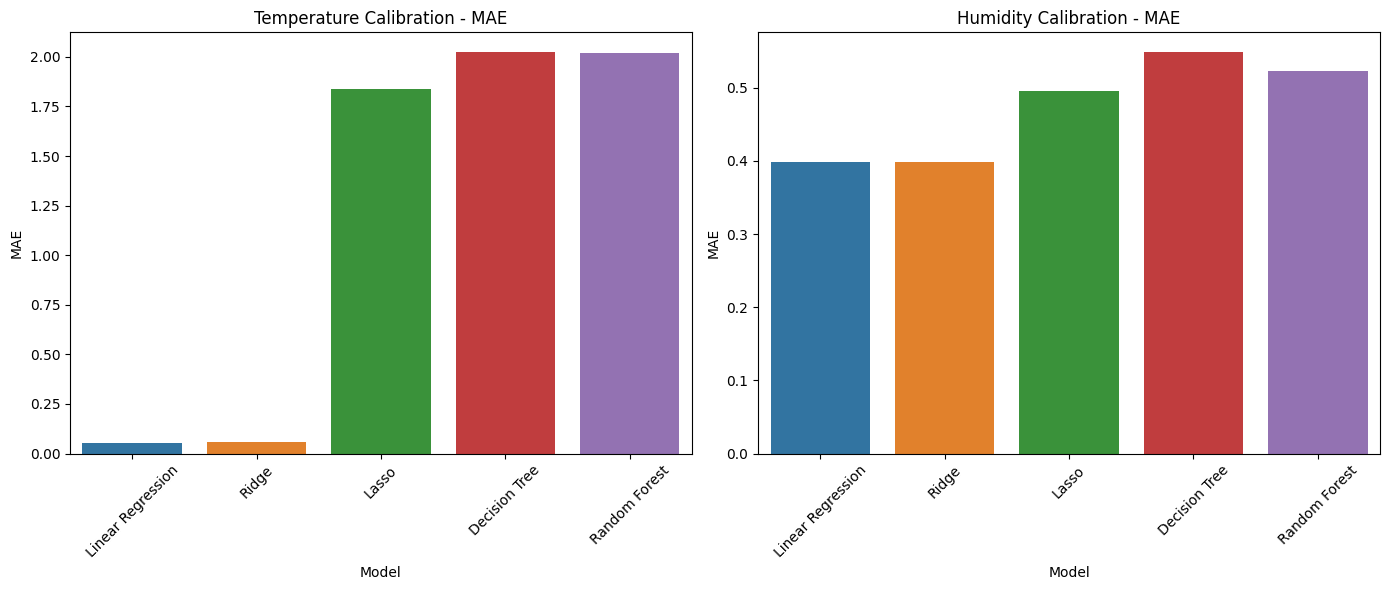

In [139]:
#TRYING OUT THE DIFFERENT MODELS TO FIND ONE FOR DEPLOYMENT 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---- Load your data
# df = pd.read_csv("your_data.csv", parse_dates=['time'])
df = df.sort_values("time")  # Ensure it's sorted

# ---- Define average as ground truth
df['avg_temp'] = df[['aht_temp', 'sht_temp', 'dht22_temp']].mean(axis=1)
df['avg_hum'] = df[['aht_hum', 'sht_hum', 'dht22_hum']].mean(axis=1)

# ---- Time-based train/test split
split_idx = int(len(df) * 0.8)

X_temp_train = df[['dht11_temp']].iloc[:split_idx]
y_temp_train = df['avg_temp'].iloc[:split_idx]
X_temp_test = df[['dht11_temp']].iloc[split_idx:]
y_temp_test = df['avg_temp'].iloc[split_idx:]

X_hum_train = df[['dht11_hum']].iloc[:split_idx]
y_hum_train = df['avg_hum'].iloc[:split_idx]
X_hum_test = df[['dht11_hum']].iloc[split_idx:]
y_hum_test = df['avg_hum'].iloc[split_idx:]

# ---- Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# ---- Evaluation function
def evaluate_models_split(X_train, y_train, X_test, y_test, label):
    print(f"\n=== {label.upper()} CALIBRATION ===")
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        results.append({'Model': name, 'MAE': mae, 'RMSE': rmse})
        print(f"{name}: MAE = {mae:.3f}, RMSE = {rmse:.3f}")
    
    return pd.DataFrame(results)

# ---- Run evaluations
temp_results = evaluate_models_split(X_temp_train, y_temp_train, X_temp_test, y_temp_test, "temperature")
hum_results = evaluate_models_split(X_hum_train, y_hum_train, X_hum_test, y_hum_test, "humidity")

# ---- Visualize results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='MAE', data=temp_results, ax=axs[0])
axs[0].set_title("Temperature Calibration - MAE")
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='MAE', data=hum_results, ax=axs[1])
axs[1].set_title("Humidity Calibration - MAE")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


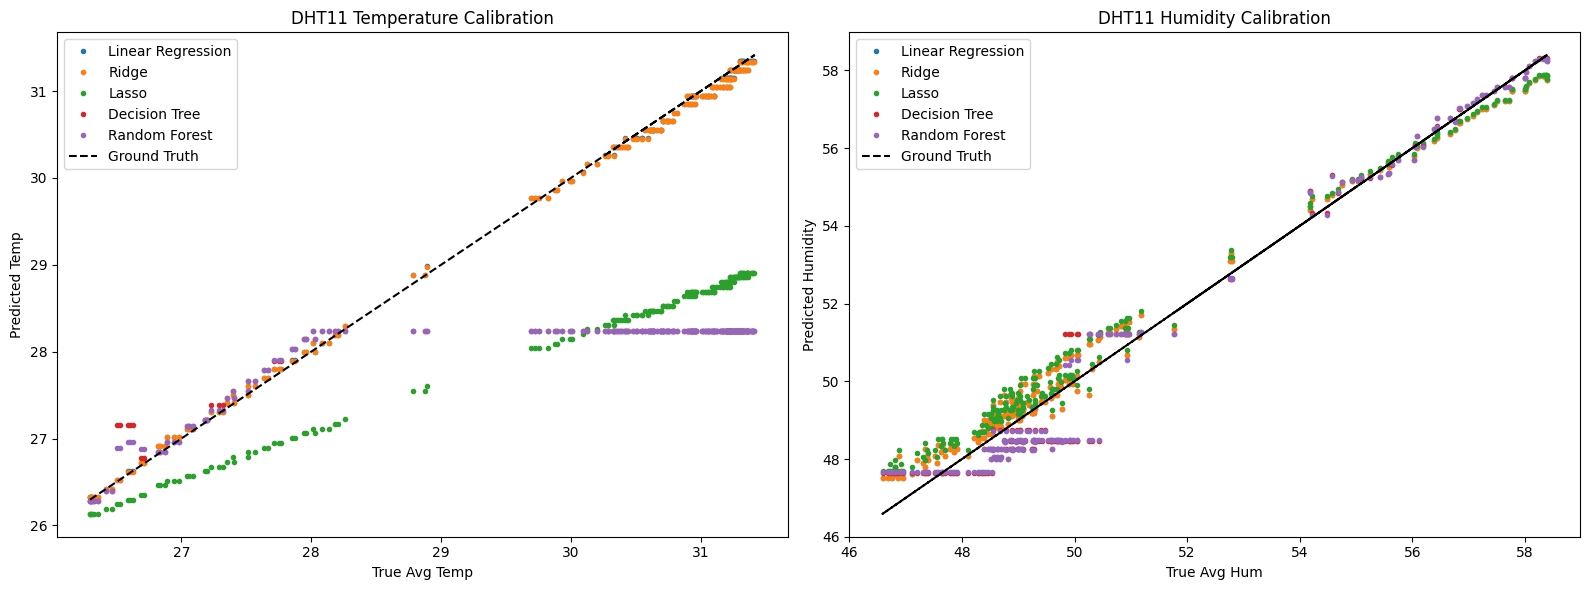

In [140]:
# Create prediction dictionaries
temp_preds = {}
hum_preds = {}

# Generate predictions for each model
for name, model in models.items():
    model.fit(X_temp_train, y_temp_train)
    temp_preds[name] = model.predict(X_temp_test)

    model.fit(X_hum_train, y_hum_train)
    hum_preds[name] = model.predict(X_hum_test)


# Plot temperature and humidity predictions vs ground truth
plt.figure(figsize=(16, 6))

# Temperature plot
plt.subplot(1, 2, 1)
for name, preds in temp_preds.items():
    plt.plot(y_temp_test.values.flatten(), preds, '.', label=name)
plt.plot(y_temp_test.values.flatten(), y_temp_test.values.flatten(), 'k--', label='Ground Truth')
plt.xlabel("True Avg Temp")
plt.ylabel("Predicted Temp")
plt.title("DHT11 Temperature Calibration")
plt.legend()

# Humidity plot
plt.subplot(1, 2, 2)
for name, preds in hum_preds.items():
    plt.plot(y_hum_test.values.flatten(), preds, '.', label=name)
plt.plot(y_hum_test.values.flatten(), y_hum_test.values.flatten(), 'k--', label='Ground Truth')
plt.xlabel("True Avg Hum")
plt.ylabel("Predicted Humidity")
plt.title("DHT11 Humidity Calibration")
plt.legend()

plt.tight_layout()
plt.show()





In [141]:
#hyper parameter tuning 
from sklearn.model_selection import train_test_split

# Feature: DHT11 temperature
X = df[['dht11_temp']]

# Target: Average temperature (used as ground truth)
Y = df[['avg_temp']]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert Y_train and Y_test to 1D arrays to avoid DataConversionWarning
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest model
rf_base = RandomForestRegressor(random_state=42)

# Grid search setup
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search on training data
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]})

In [142]:
# Fit GridSearchCV on training data
grid_search.fit(X_train, Y_train)

# Best parameters and estimator
print("Best parameters found:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, Y_test)
print(f"Test R^2 score: {test_score:.4f}")


Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best estimator: RandomForestRegressor(min_samples_leaf=2, n_estimators=50, random_state=42)
Test R^2 score: 0.9994


MAE: 0.0428
RMSE: 0.0587
R^2 score: 0.9994


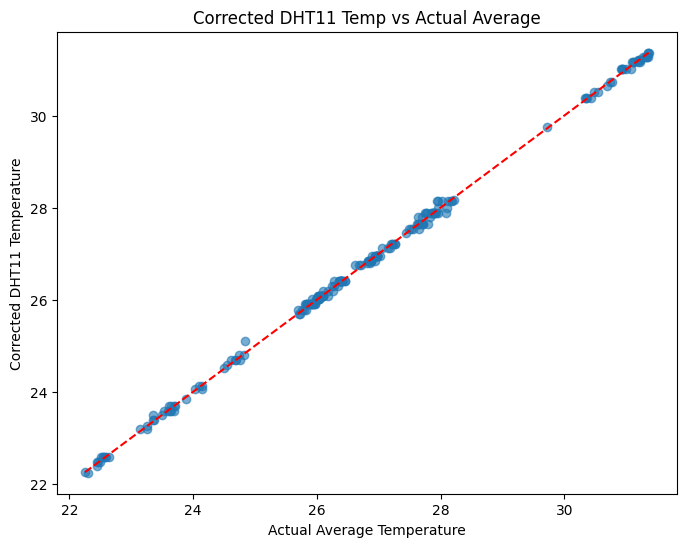

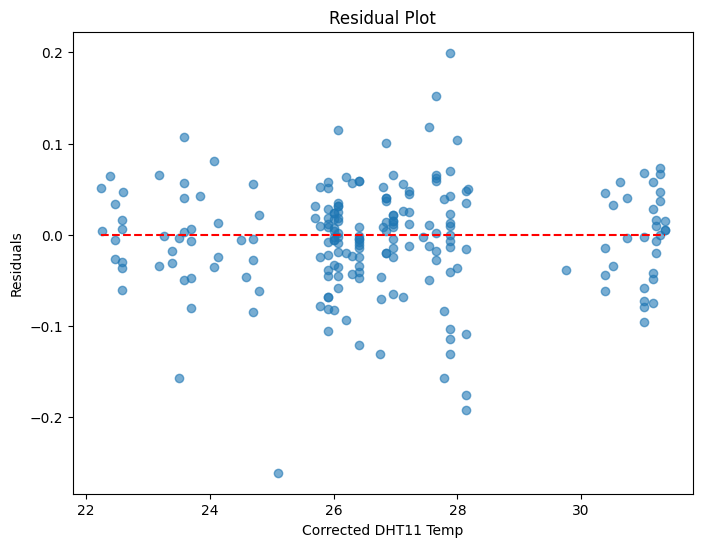

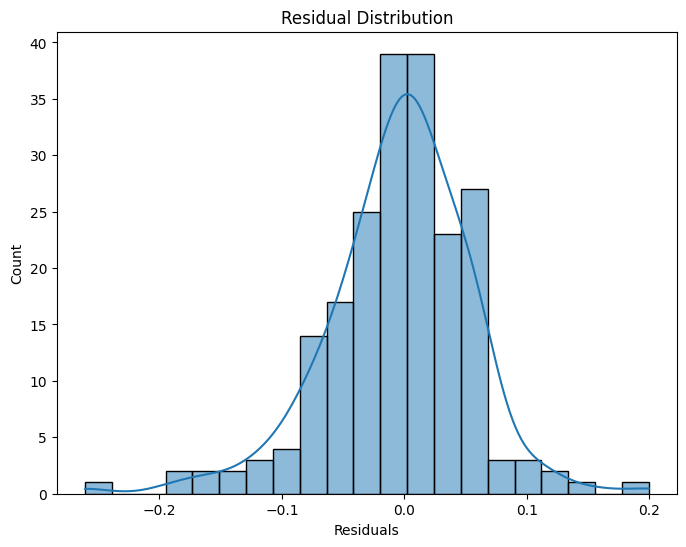

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature: raw DHT11 temperature
X = df[['dht11_temp']]     # input: raw reading

# 2. Target: average temp (ground truth)
Y = df['avg_temp']         # target: desired corrected temp

# 3. Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)

# 5. Predict: corrected DHT11 temp
y_corrected = rf.predict(X_test)

# 6. Evaluation
mae = mean_absolute_error(Y_test, y_corrected)
rmse = mean_squared_error(Y_test, y_corrected, squared=False)
r2 = r2_score(Y_test, y_corrected)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 score: {r2:.4f}")

# 7. Plot: Predicted (corrected) vs Actual (avg_temp)
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_corrected, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Average Temperature")
plt.ylabel("Corrected DHT11 Temperature")
plt.title("Corrected DHT11 Temp vs Actual Average")
plt.show()

# 8. Residuals
residuals = Y_test - y_corrected
plt.figure(figsize=(8,6))
plt.scatter(y_corrected, residuals, alpha=0.6)
plt.hlines(0, y_corrected.min(), y_corrected.max(), colors='r', linestyles='--')
plt.xlabel("Corrected DHT11 Temp")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 9. Residual Distribution
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


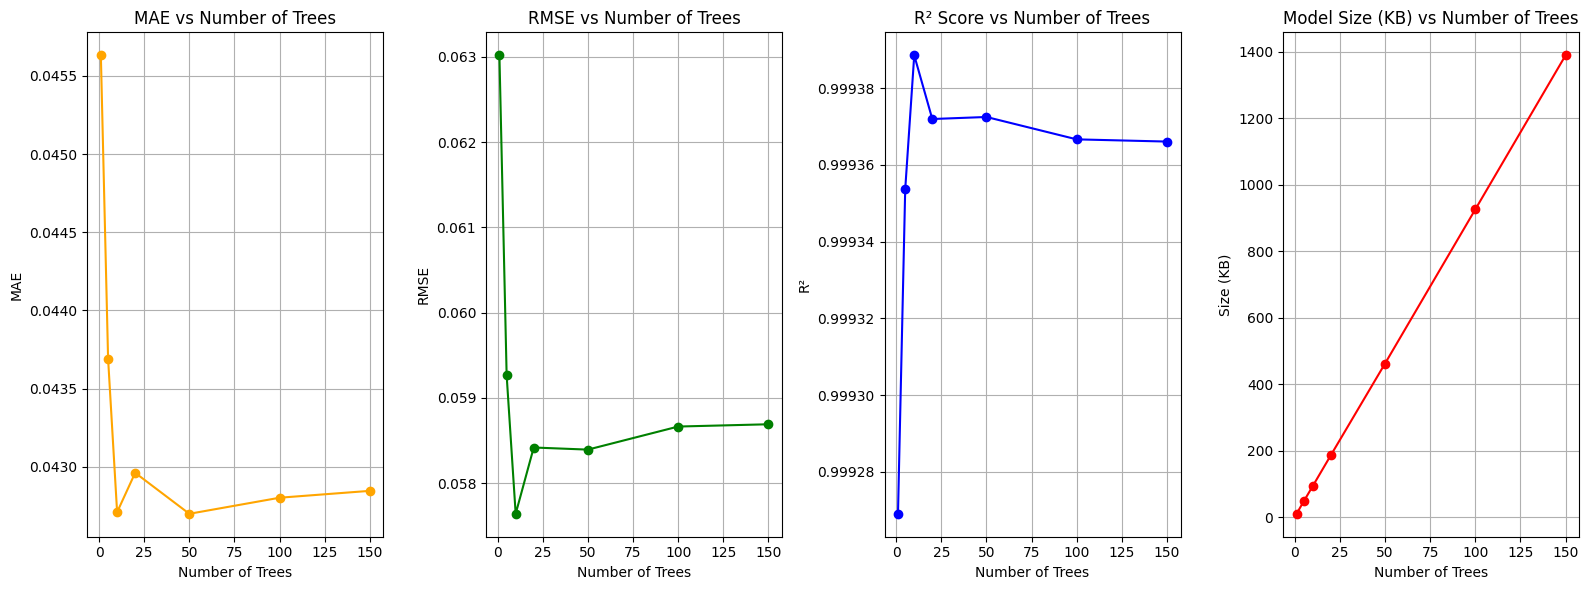

In [144]:
import os
import joblib
import tempfile
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Prepare data
X = df[['dht11_temp']]
Y = df['avg_temp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Range of tree counts
tree_counts = [1, 5, 10, 20, 50, 100, 150]
mae_list, rmse_list, r2_list, size_list = [], [], [], []

# 3. Evaluate and get model sizes
for n in tree_counts:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    # Save model temporarily and measure size
    with tempfile.NamedTemporaryFile(delete=False, suffix='.joblib') as tmp_file:
        joblib.dump(model, tmp_file.name)
        size_kb = os.path.getsize(tmp_file.name) / 1024  # in KB
        size_list.append(size_kb)
        os.remove(tmp_file.name)  # clean up

# 4. Plotting performance and size
plt.figure(figsize=(16, 6))

# MAE
plt.subplot(1, 4, 1)
plt.plot(tree_counts, mae_list, marker='o', color='orange')
plt.title("MAE vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("MAE")
plt.grid(True)

# RMSE
plt.subplot(1, 4, 2)
plt.plot(tree_counts, rmse_list, marker='o', color='green')
plt.title("RMSE vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.grid(True)

# R²
plt.subplot(1, 4, 3)
plt.plot(tree_counts, r2_list, marker='o', color='blue')
plt.title("R² Score vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("R²")
plt.grid(True)

# Size
plt.subplot(1, 4, 4)
plt.plot(tree_counts, size_list, marker='o', color='red')
plt.title("Model Size (KB) vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Size (KB)")
plt.grid(True)

plt.tight_layout()
plt.show()


MAE: 0.0430
RMSE: 0.0584
R^2 score: 0.9994


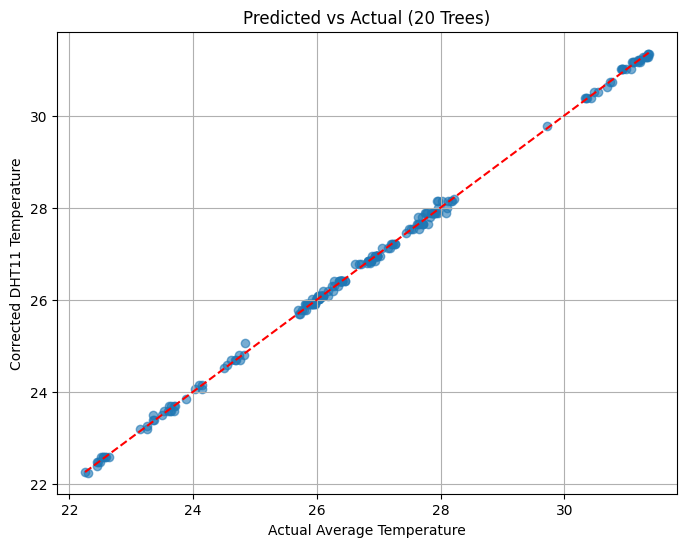

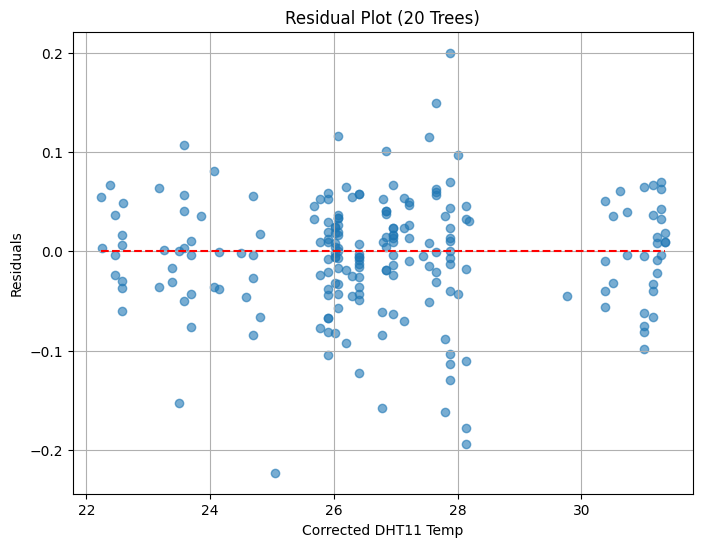

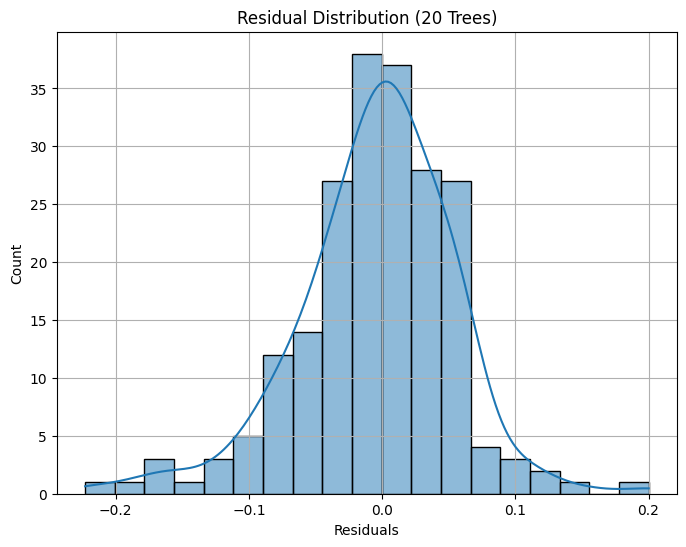

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature: raw DHT11 temperature
X = df[['dht11_temp']]     # input: raw reading

# 2. Target: average temperature (ground truth)
Y = df['avg_temp']         # target: corrected temp

# 3. Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model: Random Forest with 20 trees
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, Y_train)

# 5. Predict corrected DHT11 temperature
y_corrected = rf.predict(X_test)

# 6. Evaluate performance
mae = mean_absolute_error(Y_test, y_corrected)
rmse = mean_squared_error(Y_test, y_corrected, squared=False)
r2 = r2_score(Y_test, y_corrected)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 score: {r2:.4f}")

# 7. Plot: Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_corrected, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Average Temperature")
plt.ylabel("Corrected DHT11 Temperature")
plt.title("Predicted vs Actual (20 Trees)")
plt.grid(True)
plt.show()

# 8. Residuals Plot
residuals = Y_test - y_corrected
plt.figure(figsize=(8,6))
plt.scatter(y_corrected, residuals, alpha=0.6)
plt.hlines(0, y_corrected.min(), y_corrected.max(), colors='r', linestyles='--')
plt.xlabel("Corrected DHT11 Temp")
plt.ylabel("Residuals")
plt.title("Residual Plot (20 Trees)")
plt.grid(True)
plt.show()

# 9. Residual Distribution
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (20 Trees)")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()


In [146]:
df['calibrated_dht11_temp'] = rf.predict(df[['dht11_temp']])


MAE: 0.0430
RMSE: 0.0587
R^2 Score: 0.9994


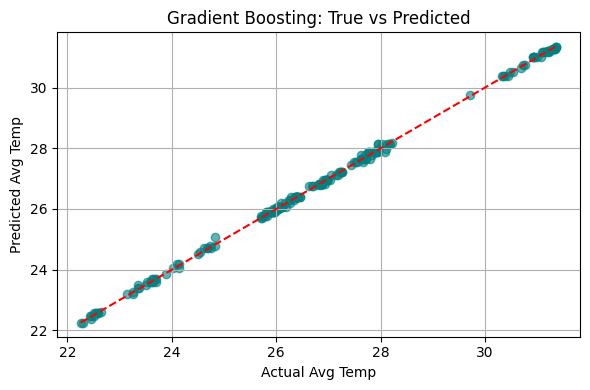

In [147]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Feature and Target
X = df[['dht11_temp']]
Y = df['avg_temp']

# 2. Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Initialize and train Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, Y_train)

# 4. Predict
y_pred = gbr.predict(X_test)

# 5. Evaluation
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# 6. Optional: Plot true vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, y_pred, color='teal', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Avg Temp")
plt.ylabel("Predicted Avg Temp")
plt.title("Gradient Boosting: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best CV MAE: 0.0482
Test MAE: 0.0432
Test RMSE: 0.0588
Test R^2 Score: 0.9994


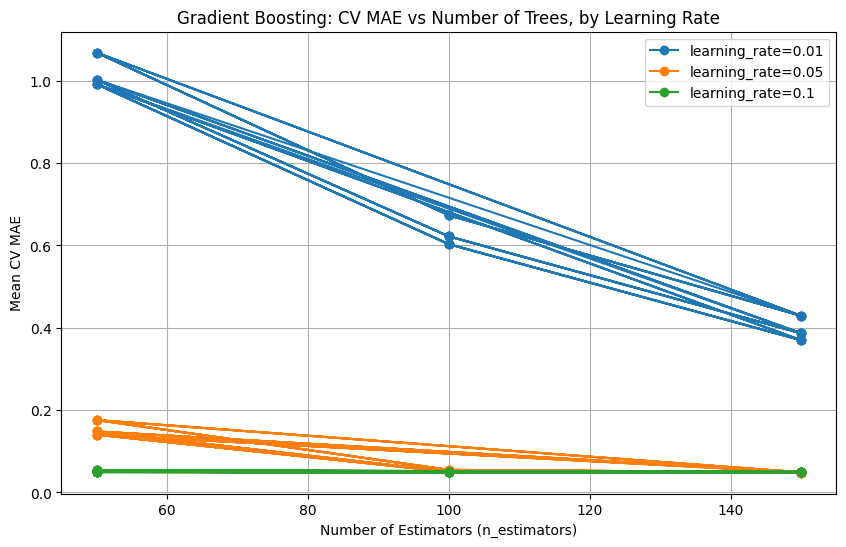

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature and Target
X = df[['dht11_temp']]
Y = df['avg_temp']

# 2. Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Define model and hyperparameter grid
gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 4. Setup GridSearchCV
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           verbose=1)

# 5. Run Grid Search
grid_search.fit(X_train, Y_train)

# 6. Extract results into DataFrame for analysis
results = pd.DataFrame(grid_search.cv_results_)

# 7. Show best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV MAE: {-grid_search.best_score_:.4f}")

# 8. Predict with best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2 Score: {r2:.4f}")

# 9. Plot results: MAE vs n_estimators, colored by learning_rate (example)

plt.figure(figsize=(10, 6))
for lr in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == lr]
    plt.plot(subset['param_n_estimators'], -subset['mean_test_score'], marker='o', label=f'learning_rate={lr}')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV MAE')
plt.title('Gradient Boosting: CV MAE vs Number of Trees, by Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


In [149]:
#testing the random forest and see predictions 




# Train Random Forest for Temperature
rf_temp = RandomForestRegressor()
rf_temp.fit(X_temp_train, y_temp_train)

# Train Random Forest for Humidity
rf_hum = RandomForestRegressor()
rf_hum.fit(X_hum_train, y_hum_train)


RandomForestRegressor()

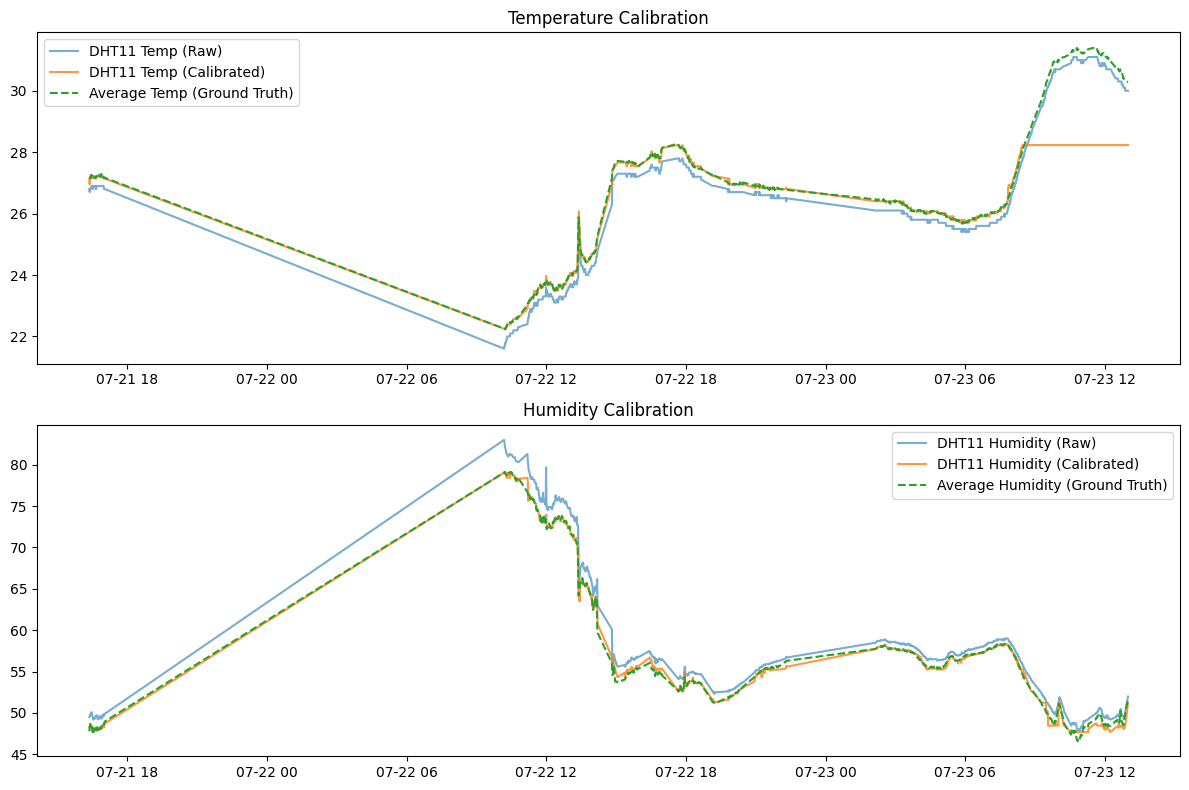

In [150]:
df['calibrated_temp'] = rf_temp.predict(df[['dht11_temp']])
df['calibrated_hum'] = rf_hum.predict(df[['dht11_hum']])
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(df['time'], df['dht11_temp'], label='DHT11 Temp (Raw)', alpha=0.6)
axs[0].plot(df['time'], df['calibrated_temp'], label='DHT11 Temp (Calibrated)', alpha=0.8)
axs[0].plot(df['time'], df['avg_temp'], label='Average Temp (Ground Truth)', linestyle='--')
axs[0].set_title('Temperature Calibration')
axs[0].legend()

axs[1].plot(df['time'], df['dht11_hum'], label='DHT11 Humidity (Raw)', alpha=0.6)
axs[1].plot(df['time'], df['calibrated_hum'], label='DHT11 Humidity (Calibrated)', alpha=0.8)
axs[1].plot(df['time'], df['avg_hum'], label='Average Humidity (Ground Truth)', linestyle='--')
axs[1].set_title('Humidity Calibration')
axs[1].legend()

plt.tight_layout()
plt.show()



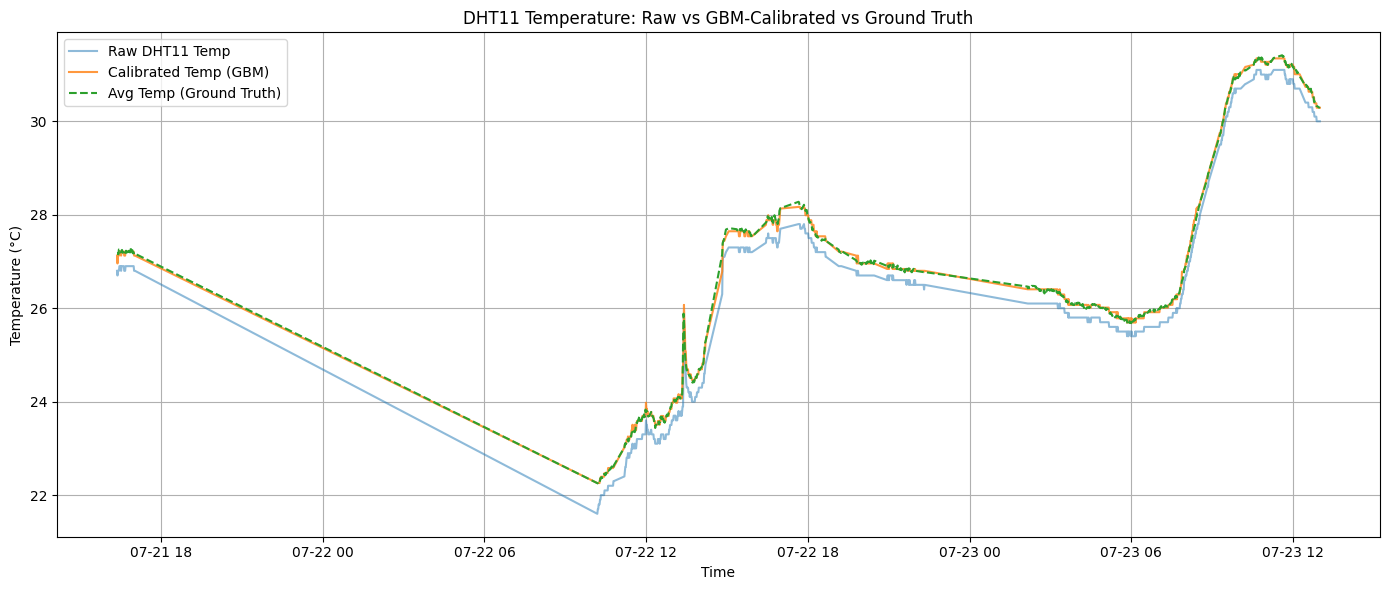

In [151]:
#comparint the results for the gbm 
df['gbm_calibrated_temp'] = best_model.predict(df[['dht11_temp']])

plt.figure(figsize=(14,6))

plt.plot(df['time'], df['dht11_temp'], label='Raw DHT11 Temp', alpha=0.5)
plt.plot(df['time'], df['gbm_calibrated_temp'], label='Calibrated Temp (GBM)', alpha=0.8)
plt.plot(df['time'], df['avg_temp'], label='Avg Temp (Ground Truth)', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('DHT11 Temperature: Raw vs GBM-Calibrated vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [152]:
#comparing diff hyper parameters 
from sklearn.ensemble import GradientBoostingRegressor

n_estimators_list = [50, 100, 150]
calibrated_versions = {}

for n in n_estimators_list:
    model = GradientBoostingRegressor(
        n_estimators=n,
        learning_rate=0.1,       # Keep these fixed or test multiple combos
        max_depth=3,
        random_state=42
    )
    model.fit(X_train, Y_train)
    calibrated_versions[f"GBM_{n}_trees"] = model.predict(df[['dht11_temp']])

for label, preds in calibrated_versions.items():
    df[label] = preds



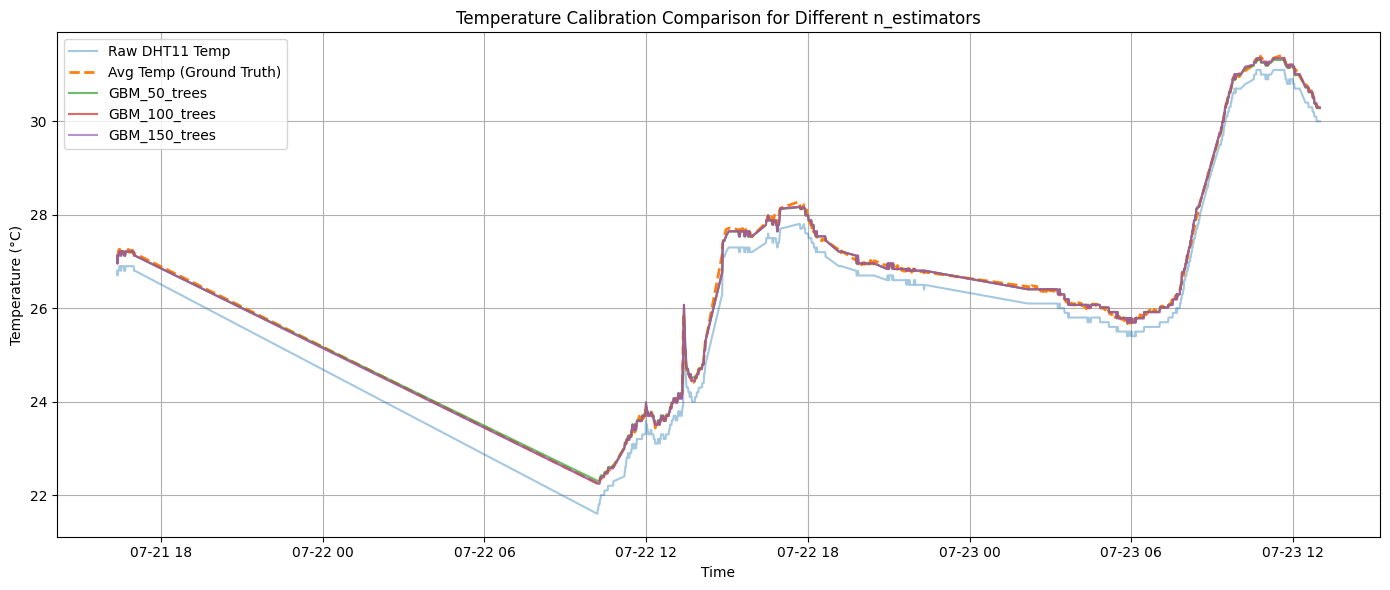

In [153]:
plt.figure(figsize=(14,6))

plt.plot(df['time'], df['dht11_temp'], label='Raw DHT11 Temp', alpha=0.4)
plt.plot(df['time'], df['avg_temp'], label='Avg Temp (Ground Truth)', linestyle='--', linewidth=2)

for label in calibrated_versions:
    plt.plot(df['time'], df[label], label=label, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Calibration Comparison for Different n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


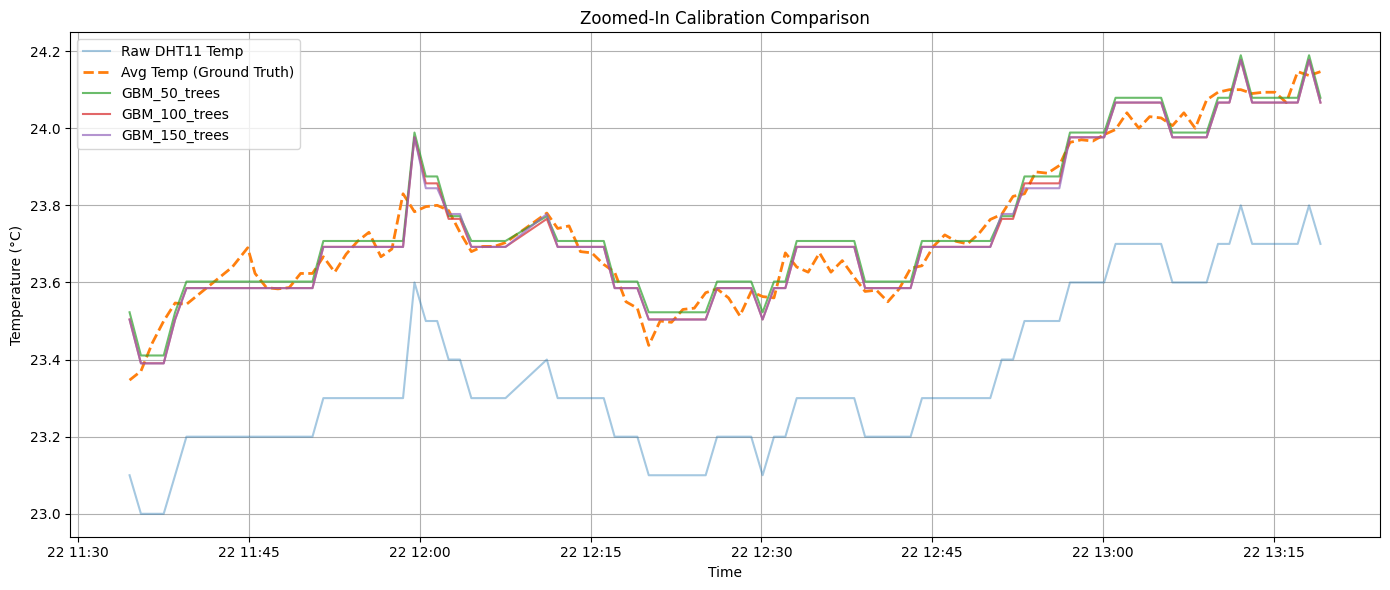

In [154]:
df_subset = df.iloc[100:200] 

plt.figure(figsize=(14,6))
plt.plot(df_subset['time'], df_subset['dht11_temp'], label='Raw DHT11 Temp', alpha=0.4)
plt.plot(df_subset['time'], df_subset['avg_temp'], label='Avg Temp (Ground Truth)', linestyle='--', linewidth=2)

for label in calibrated_versions:
    plt.plot(df_subset['time'], df_subset[label], label=label, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Zoomed-In Calibration Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


CatBoost MAE: 0.055
CatBoost RMSE: 0.075
CatBoost R²: 0.999


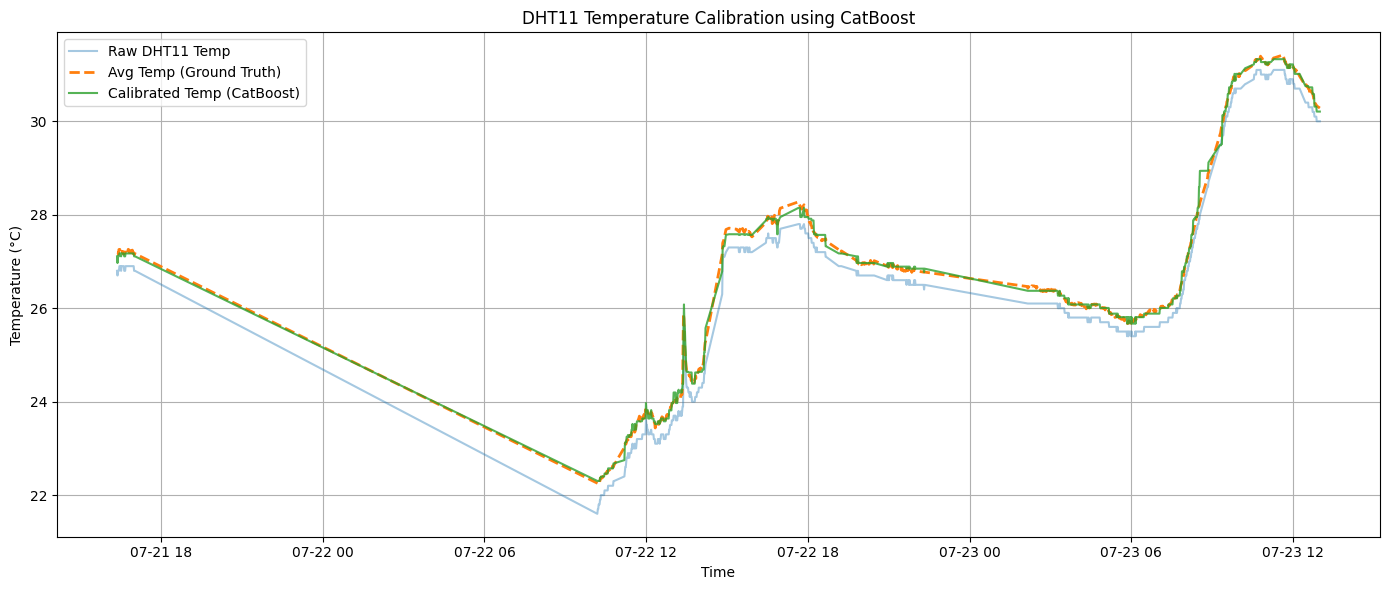

In [155]:
#catboost

import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Split data
X = df[['dht11_temp']]
Y = df['avg_temp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Train CatBoost
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
cat_model.fit(X_train, Y_train)

# 3. Predict
df['catboost_calibrated_temp'] = cat_model.predict(df[['dht11_temp']])

# 4. Evaluate on test set
y_pred = cat_model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f"CatBoost MAE: {mae:.3f}")
print(f"CatBoost RMSE: {rmse:.3f}")
print(f"CatBoost R²: {r2:.3f}")

# 5. Plot calibration vs raw vs ground truth
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['dht11_temp'], label='Raw DHT11 Temp', alpha=0.4)
plt.plot(df['time'], df['avg_temp'], label='Avg Temp (Ground Truth)', linestyle='--', linewidth=2)
plt.plot(df['time'], df['catboost_calibrated_temp'], label='Calibrated Temp (CatBoost)', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('DHT11 Temperature Calibration using CatBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 5 CatBoost Models by MAE:
              label  learning_rate  depth       MAE      RMSE        R2
13   lr_0.1_depth_5           0.10      5  0.046840  0.064526  0.999234
12   lr_0.1_depth_4           0.10      4  0.046868  0.061611  0.999301
14   lr_0.1_depth_6           0.10      6  0.047791  0.064330  0.999238
11   lr_0.1_depth_3           0.10      3  0.055040  0.074716  0.998973
9   lr_0.05_depth_6           0.05      6  0.056607  0.075721  0.998945


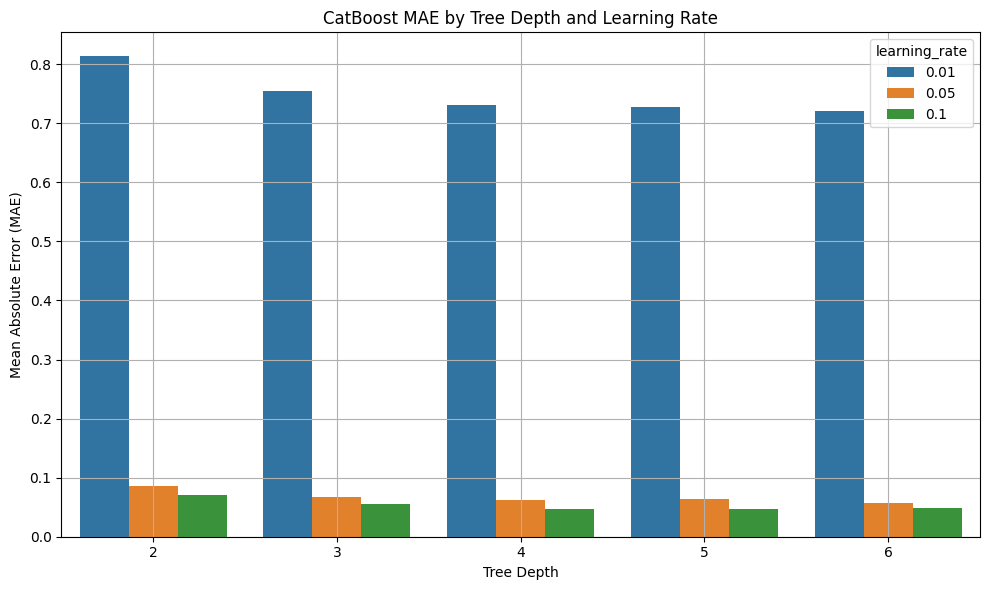

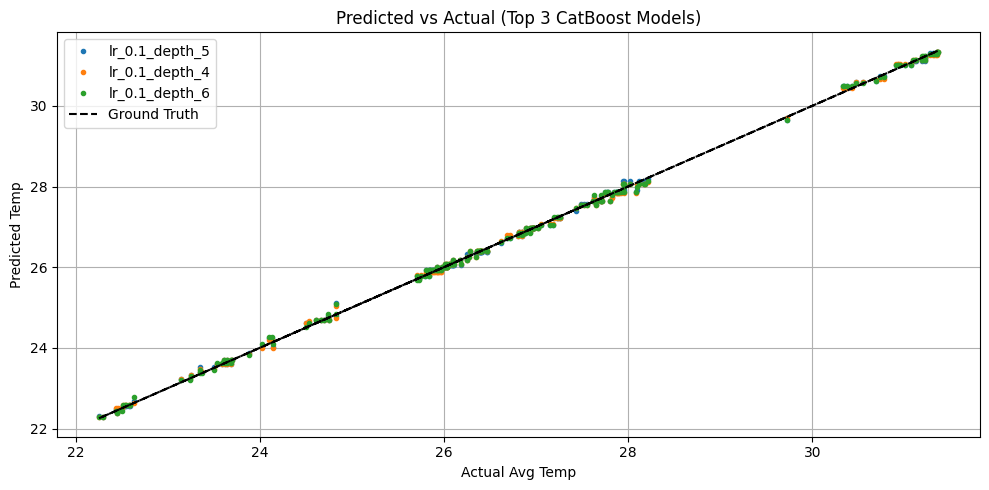

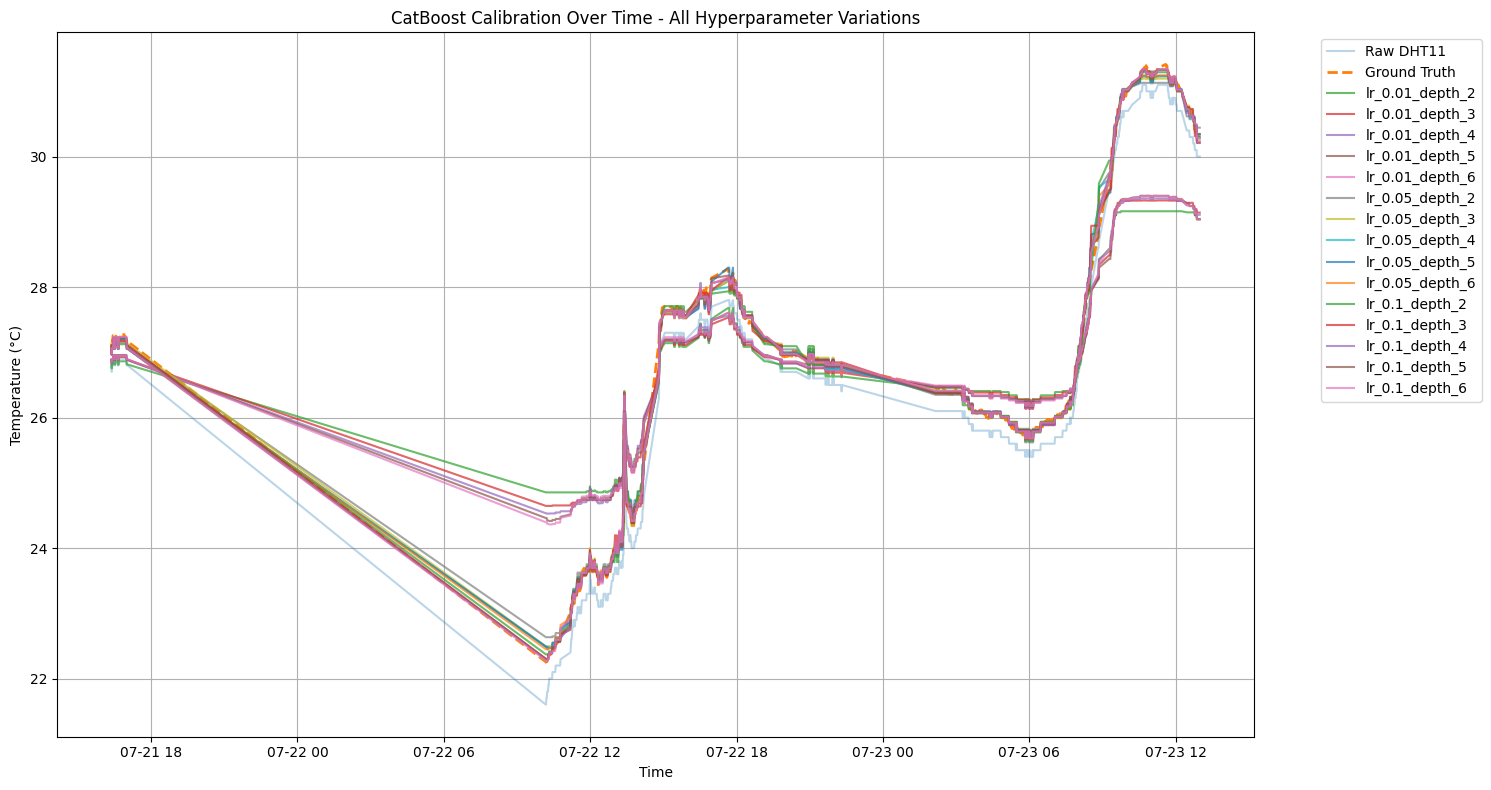

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Prepare data
X = df[['dht11_temp']]
Y = df['avg_temp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Define hyperparameters
learning_rates = [0.01, 0.05, 0.1]
depths = [2, 3, 4, 5, 6]
iterations = 100

results = []
catboost_preds = {}

# 3. Train, predict, evaluate
for lr in learning_rates:
    for d in depths:
        label = f"lr_{lr}_depth_{d}"
        model = CatBoostRegressor(
            iterations=iterations,
            learning_rate=lr,
            depth=d,
            verbose=0,
            random_state=42
        )
        model.fit(X_train, Y_train)

        # Predict on test set
        preds_test = model.predict(X_test)
        # Predict for full df for time series plotting
        df[label] = model.predict(df[['dht11_temp']])

        # Evaluate
        mae = mean_absolute_error(Y_test, preds_test)
        rmse = mean_squared_error(Y_test, preds_test, squared=False)
        r2 = r2_score(Y_test, preds_test)

        # Save results
        results.append({
            'label': label,
            'learning_rate': lr,
            'depth': d,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })
        catboost_preds[label] = preds_test

# 4. Results summary
results_df = pd.DataFrame(results).sort_values(by='MAE')
print("Top 5 CatBoost Models by MAE:")
print(results_df.head())

# 5. Bar plot: MAE vs Depth, colored by Learning Rate
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='depth', y='MAE', hue='learning_rate')
plt.title('CatBoost MAE by Tree Depth and Learning Rate')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Scatter plot: Predicted vs Actual (Top 3 models)
top3 = results_df.head(3)['label'].values
plt.figure(figsize=(10,5))
for label in top3:
    plt.plot(Y_test.values, catboost_preds[label], '.', label=label)
plt.plot(Y_test.values, Y_test.values, 'k--', label='Ground Truth')
plt.xlabel('Actual Avg Temp')
plt.ylabel('Predicted Temp')
plt.title('Predicted vs Actual (Top 3 CatBoost Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Time-series plot of predictions for all models
plt.figure(figsize=(15, 8))
plt.plot(df['time'], df['dht11_temp'], label='Raw DHT11', alpha=0.3)
plt.plot(df['time'], df['avg_temp'], label='Ground Truth', linestyle='--', linewidth=2)

for label in catboost_preds:
    plt.plot(df['time'], df[label], label=label, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('CatBoost Calibration Over Time - All Hyperparameter Variations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Top 5 XGBoost Models by MAE:
                 label  learning_rate  depth       MAE      RMSE        R2
14  xgb_lr_0.1_depth_6            0.1      6  0.043033  0.058655  0.999367
12  xgb_lr_0.1_depth_4            0.1      4  0.043067  0.058611  0.999368
11  xgb_lr_0.1_depth_3            0.1      3  0.043095  0.058694  0.999366
13  xgb_lr_0.1_depth_5            0.1      5  0.043103  0.058719  0.999365
10  xgb_lr_0.1_depth_2            0.1      2  0.043927  0.060513  0.999326


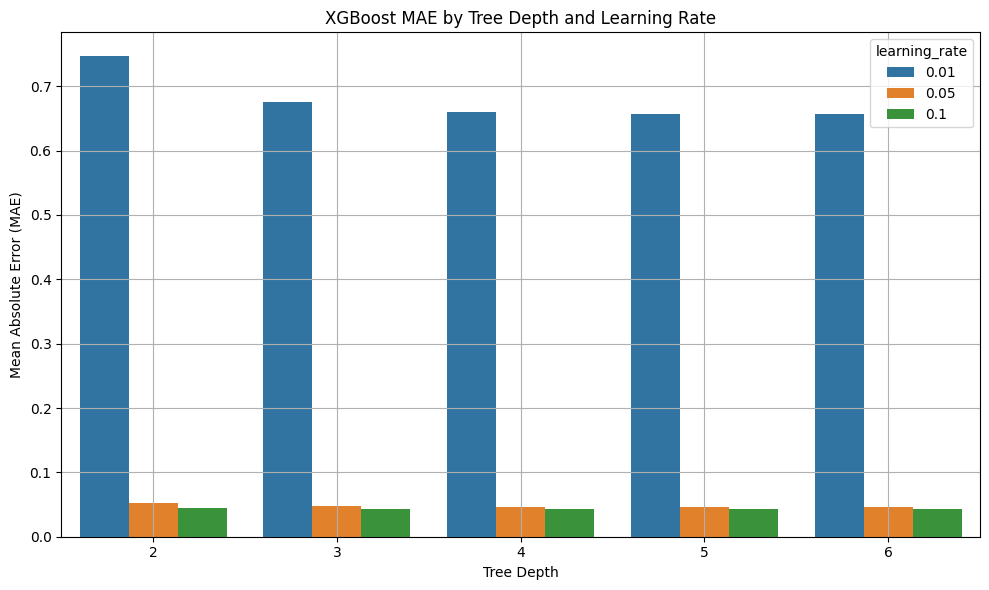

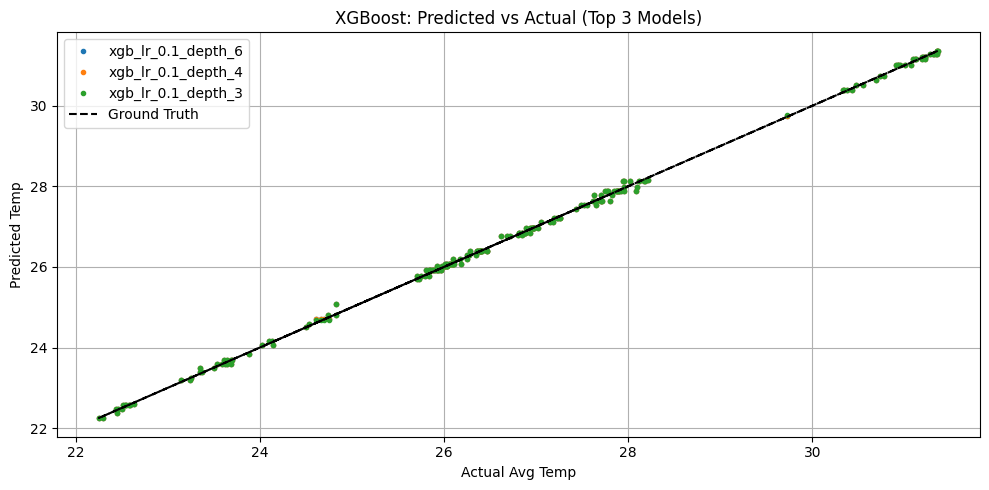

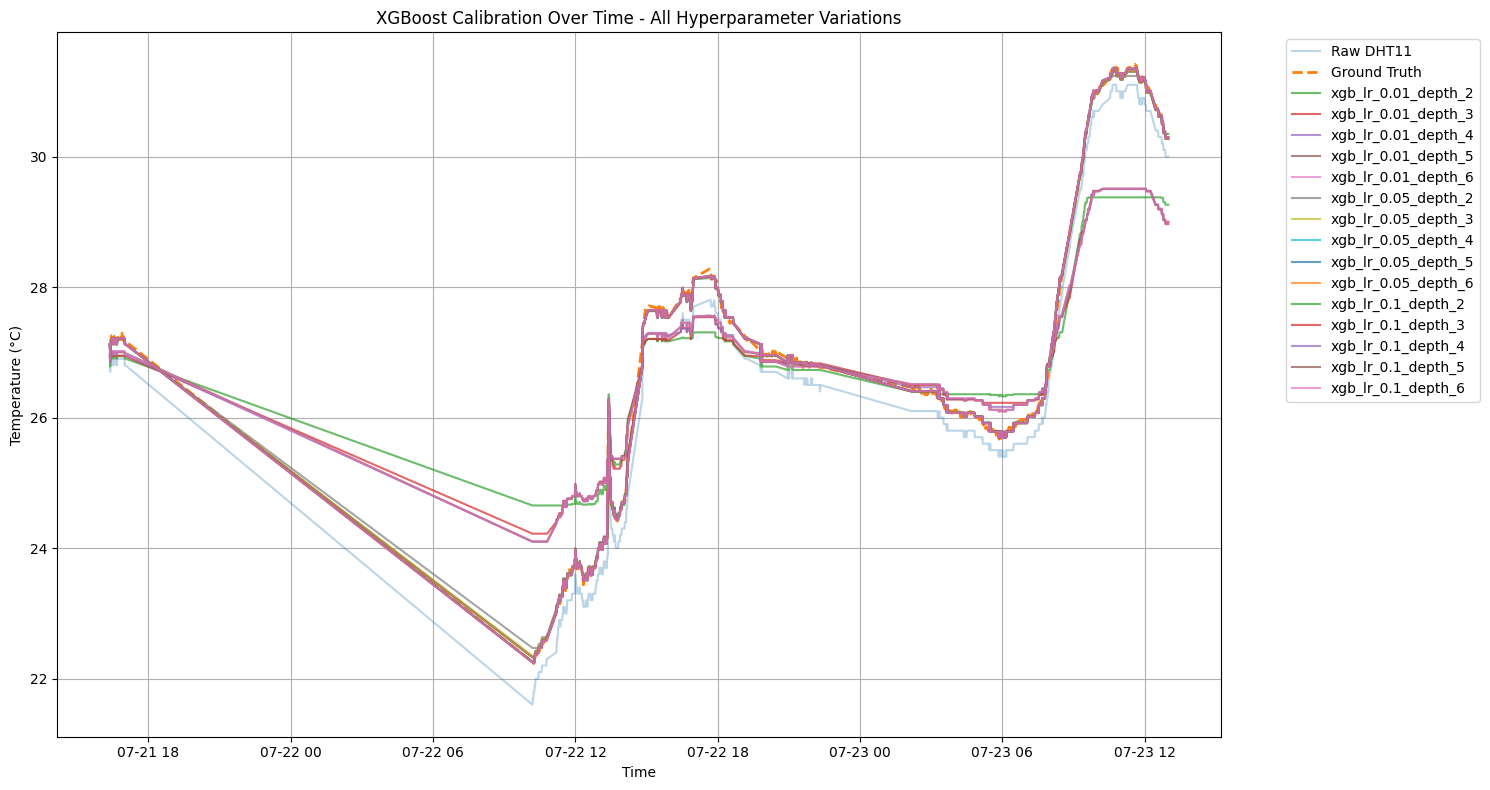

In [157]:
#XG boost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Prepare data
X = df[['dht11_temp']]
Y = df['avg_temp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Define hyperparameters
learning_rates = [0.01, 0.05, 0.1]
depths = [2, 3, 4, 5, 6]
n_estimators = 100

results = []
xgb_preds = {}

# 3. Train, predict, evaluate
for lr in learning_rates:
    for d in depths:
        label = f"xgb_lr_{lr}_depth_{d}"
        model = XGBRegressor(
            n_estimators=n_estimators,
            learning_rate=lr,
            max_depth=d,
            verbosity=0,
            random_state=42
        )
        model.fit(X_train, Y_train)

        preds_test = model.predict(X_test)
        df[label] = model.predict(df[['dht11_temp']])

        mae = mean_absolute_error(Y_test, preds_test)
        rmse = mean_squared_error(Y_test, preds_test, squared=False)
        r2 = r2_score(Y_test, preds_test)

        results.append({
            'label': label,
            'learning_rate': lr,
            'depth': d,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })
        xgb_preds[label] = preds_test

# 4. Results summary
results_df = pd.DataFrame(results).sort_values(by='MAE')
print("Top 5 XGBoost Models by MAE:")
print(results_df.head())

# 5. Bar plot: MAE comparison
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='depth', y='MAE', hue='learning_rate')
plt.title('XGBoost MAE by Tree Depth and Learning Rate')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Predicted vs Actual (Top 3)
top3 = results_df.head(3)['label'].values
plt.figure(figsize=(10,5))
for label in top3:
    plt.plot(Y_test.values, xgb_preds[label], '.', label=label)
plt.plot(Y_test.values, Y_test.values, 'k--', label='Ground Truth')
plt.xlabel('Actual Avg Temp')
plt.ylabel('Predicted Temp')
plt.title('XGBoost: Predicted vs Actual (Top 3 Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Time-series prediction visualization
plt.figure(figsize=(15, 8))
plt.plot(df['time'], df['dht11_temp'], label='Raw DHT11', alpha=0.3)
plt.plot(df['time'], df['avg_temp'], label='Ground Truth', linestyle='--', linewidth=2)

for label in xgb_preds:
    plt.plot(df['time'], df[label], label=label, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('XGBoost Calibration Over Time - All Hyperparameter Variations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Top 5 Neural Network Models by MAE:
                                label     layers activation  learning_rate  \
8  layers_(100, 50)_act_relu_lr_0.001  (100, 50)       relu          0.001   
9   layers_(100, 50)_act_relu_lr_0.01  (100, 50)       relu          0.010   
4     layers_(100,)_act_relu_lr_0.001     (100,)       relu          0.001   
5      layers_(100,)_act_relu_lr_0.01     (100,)       relu          0.010   
1       layers_(50,)_act_relu_lr_0.01      (50,)       relu          0.010   

        MAE      RMSE        R2  
8  0.053605  0.070890  0.999075  
9  0.054010  0.071456  0.999060  
4  0.058523  0.075576  0.998949  
5  0.061156  0.078092  0.998878  
1  0.061701  0.076557  0.998921  


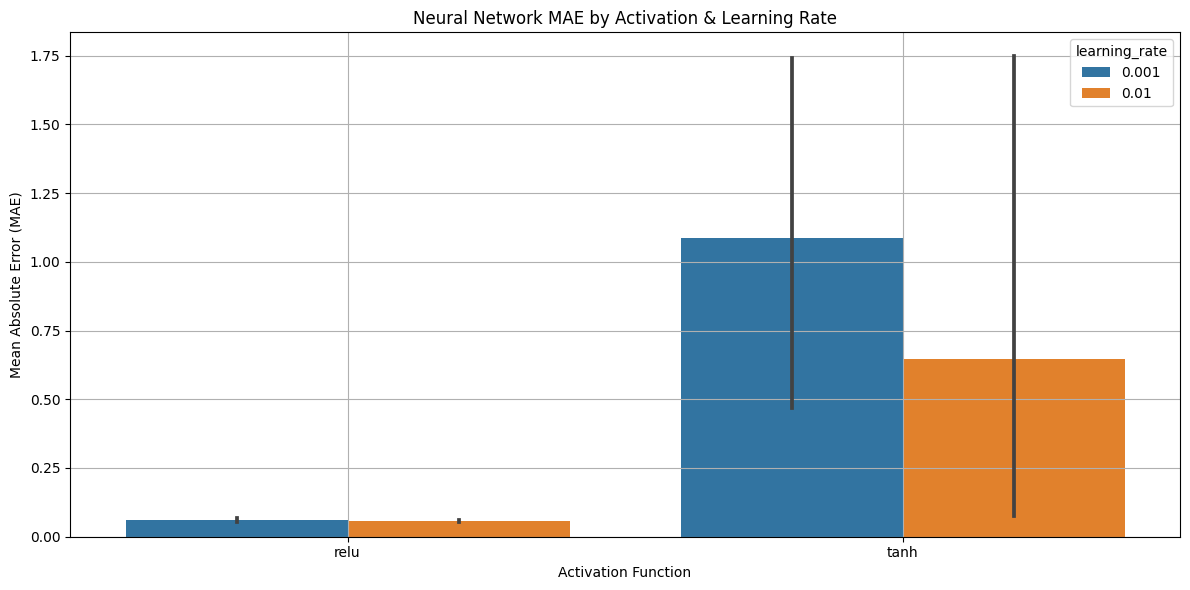

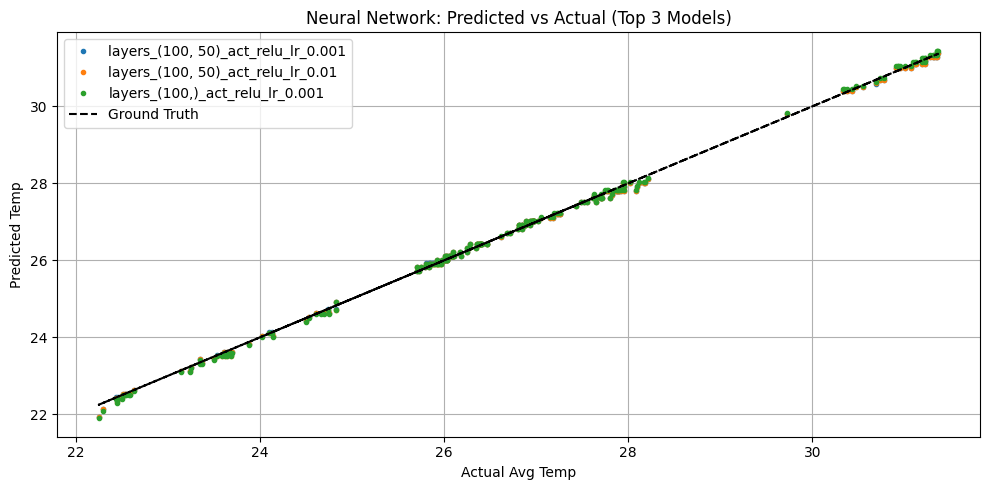

In [158]:
#Neural networks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Prepare data
X = df[['dht11_temp']]
Y = df['avg_temp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Define hyperparameters grid to try
hidden_layer_sizes = [(50,), (100,), (100, 50)]
activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01]
max_iter = 500

results = []
nn_preds = {}

# 3. Train and evaluate models with different hyperparameters
for layers in hidden_layer_sizes:
    for activation in activations:
        for lr in learning_rates:
            label = f"layers_{layers}_act_{activation}_lr_{lr}"
            model = MLPRegressor(
                hidden_layer_sizes=layers,
                activation=activation,
                learning_rate_init=lr,
                max_iter=max_iter,
                random_state=42,
                early_stopping=True,
                n_iter_no_change=20,
                verbose=False
            )
            model.fit(X_train, Y_train)
            preds = model.predict(X_test)

            mae = mean_absolute_error(Y_test, preds)
            rmse = mean_squared_error(Y_test, preds, squared=False)
            r2 = r2_score(Y_test, preds)

            results.append({
                'label': label,
                'layers': layers,
                'activation': activation,
                'learning_rate': lr,
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2
            })
            nn_preds[label] = preds

# 4. Summarize results
results_df = pd.DataFrame(results).sort_values(by='MAE')
print("Top 5 Neural Network Models by MAE:")
print(results_df.head())

# 5. Bar plot of MAE
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x='activation', y='MAE', hue='learning_rate')
plt.title('Neural Network MAE by Activation & Learning Rate')
plt.xlabel('Activation Function')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Plot predicted vs actual for top 3
top3 = results_df.head(3)['label'].values
plt.figure(figsize=(10,5))
for label in top3:
    plt.plot(Y_test.values, nn_preds[label], '.', label=label)
plt.plot(Y_test.values, Y_test.values, 'k--', label='Ground Truth')
plt.xlabel('Actual Avg Temp')
plt.ylabel('Predicted Temp')
plt.title('Neural Network: Predicted vs Actual (Top 3 Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0885 - val_loss: 0.0109
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0093 - val_loss: 3.7519e-04
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - val_loss: 2.6738e-04
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 5.4895e-05
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022 - val_loss: 5.2145e-05
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 5.2865e-05
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 5.8662e-05
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - val_loss: 4.4310e-05
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 5.9826e-05
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015 - val_loss: 5.6127e-05
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 9.5424e-05
Epoch 12/100
21/21 ━━━━━

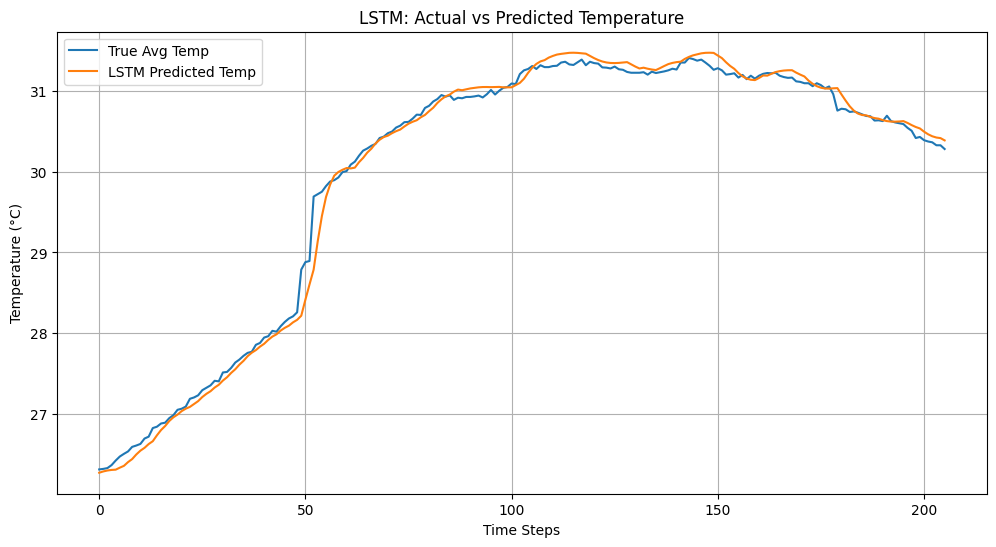

In [159]:
#LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# --- 1. Prepare your time series data ---

# Assume df is sorted by time ascending
data = df[['dht11_temp', 'avg_temp']].copy()

# Scale features between 0 and 1
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

data['dht11_temp_scaled'] = scaler_X.fit_transform(data[['dht11_temp']])
data['avg_temp_scaled'] = scaler_y.fit_transform(data[['avg_temp']])

# --- 2. Create sequences for LSTM ---

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X_all = data['dht11_temp_scaled'].values
y_all = data['avg_temp_scaled'].values

X_seq, y_seq = create_sequences(X_all, y_all, TIME_STEPS)

# --- 3. Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False
)

# --- 4. Build LSTM model ---
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(TIME_STEPS, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# --- 5. Train ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- 6. Predict and inverse scale ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# --- 7. Metrics ---
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f"LSTM MAE: {mae:.4f}")
print(f"LSTM RMSE: {rmse:.4f}")
print(f"LSTM R2: {r2:.4f}")

# --- 8. Plot results ---
plt.figure(figsize=(12,6))
plt.plot(y_true, label='True Avg Temp')
plt.plot(y_pred, label='LSTM Predicted Temp')
plt.title('LSTM: Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1189 - val_loss: 0.0105
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0103 - val_loss: 5.1232e-04
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047 - val_loss: 3.4866e-04
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032 - val_loss: 1.3492e-04
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - val_loss: 5.3005e-05
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032 - val_loss: 5.0006e-05
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 4.6949e-05
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025 - val_loss: 4.4675e-05
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - val_loss: 4.7545e-05
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - val_loss: 1.0848e-04
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026 - val_loss: 5.7619e-05
Epoch 12/100
21/21 ━━━━━

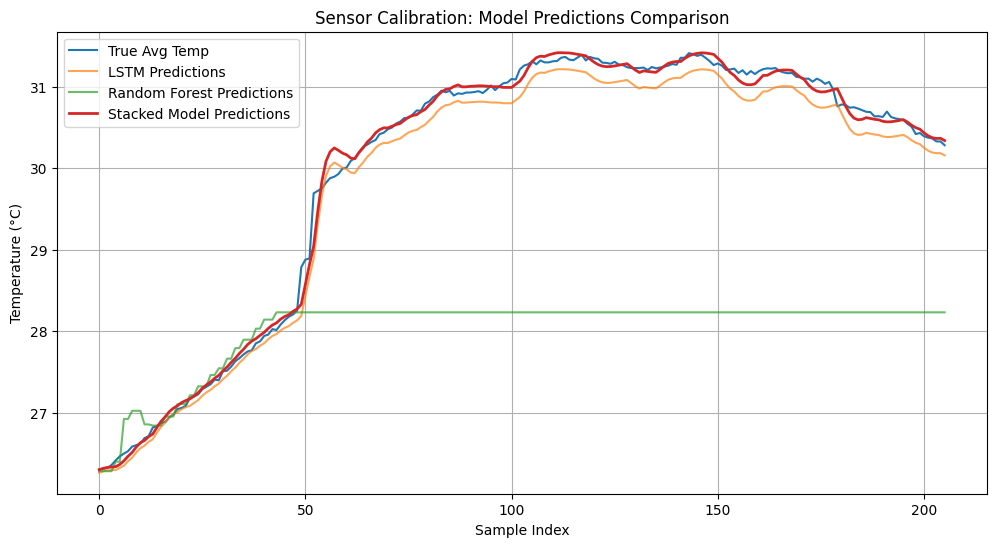

In [160]:
#hybrid of random forest and LSTM

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assume df is sorted by time and has columns: 'dht11_temp' and 'avg_temp'

# --- 1. Prepare data for LSTM (time series sequences) ---

TIME_STEPS = 10

def create_sequences(data, target, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:i+time_steps])
        ys.append(target[i+time_steps])
    return np.array(Xs), np.array(ys)

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

dht11_scaled = scaler_X.fit_transform(df[['dht11_temp']])
avg_temp_scaled = scaler_y.fit_transform(df[['avg_temp']])

X_seq, y_seq = create_sequences(dht11_scaled, avg_temp_scaled.flatten())

# Train/test split without shuffling (important for time series)
split_idx = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]
y_train_seq, y_test_seq = y_seq[:split_idx], y_seq[split_idx:]

# --- 2. Train LSTM ---

lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(TIME_STEPS, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test sequences and inverse scale
lstm_preds_scaled = lstm_model.predict(X_test_seq)
lstm_preds = scaler_y.inverse_transform(lstm_preds_scaled).flatten()
y_test_actual = scaler_y.inverse_transform(y_test_seq.reshape(-1,1)).flatten()

# --- 3. Prepare data for Random Forest ---

# RF uses current dht11_temp (aligned with LSTM predictions)
# Because LSTM predicts at i+TIME_STEPS, align RF features similarly:
rf_features = df['dht11_temp'].values[TIME_STEPS:]  # same length as y_seq
rf_targets = df['avg_temp'].values[TIME_STEPS:]

X_rf_train = rf_features[:split_idx].reshape(-1,1)
y_rf_train = rf_targets[:split_idx]
X_rf_test = rf_features[split_idx:].reshape(-1,1)
y_rf_test = rf_targets[split_idx:]

rf = RandomForestRegressor(random_state=42)
rf.fit(X_rf_train, y_rf_train)
rf_preds = rf.predict(X_rf_test)

# --- 4. Stack predictions (LSTM + RF) ---

stacked_X = np.column_stack((lstm_preds, rf_preds))
stacked_y = y_rf_test  # same as y_test_actual

# Train meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_X, stacked_y)

# Final prediction
final_preds = meta_model.predict(stacked_X)

# --- 5. Evaluate all models ---

def print_metrics(true, pred, label):
    mae = mean_absolute_error(true, pred)
    rmse = mean_squared_error(true, pred, squared=False)
    r2 = r2_score(true, pred)
    print(f"{label} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

print_metrics(y_test_actual, lstm_preds, "LSTM")
print_metrics(y_rf_test, rf_preds, "Random Forest")
print_metrics(stacked_y, final_preds, "Stacked Model (LSTM + RF)")

# --- 6. Plot predictions ---

plt.figure(figsize=(12,6))
plt.plot(stacked_y, label='True Avg Temp')
plt.plot(lstm_preds, label='LSTM Predictions', alpha=0.7)
plt.plot(rf_preds, label='Random Forest Predictions', alpha=0.7)
plt.plot(final_preds, label='Stacked Model Predictions', linewidth=2)
plt.title('Sensor Calibration: Model Predictions Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()



--- Running with TIME_STEPS = 3 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM -> MAE: 0.5526, RMSE: 0.6368, R²: 0.8507
Random Forest -> MAE: 2.0251, RMSE: 2.3377, R²: -1.0118
Stacked Model -> MAE: 0.0618, RMSE: 0.0955, R²: 0.9966


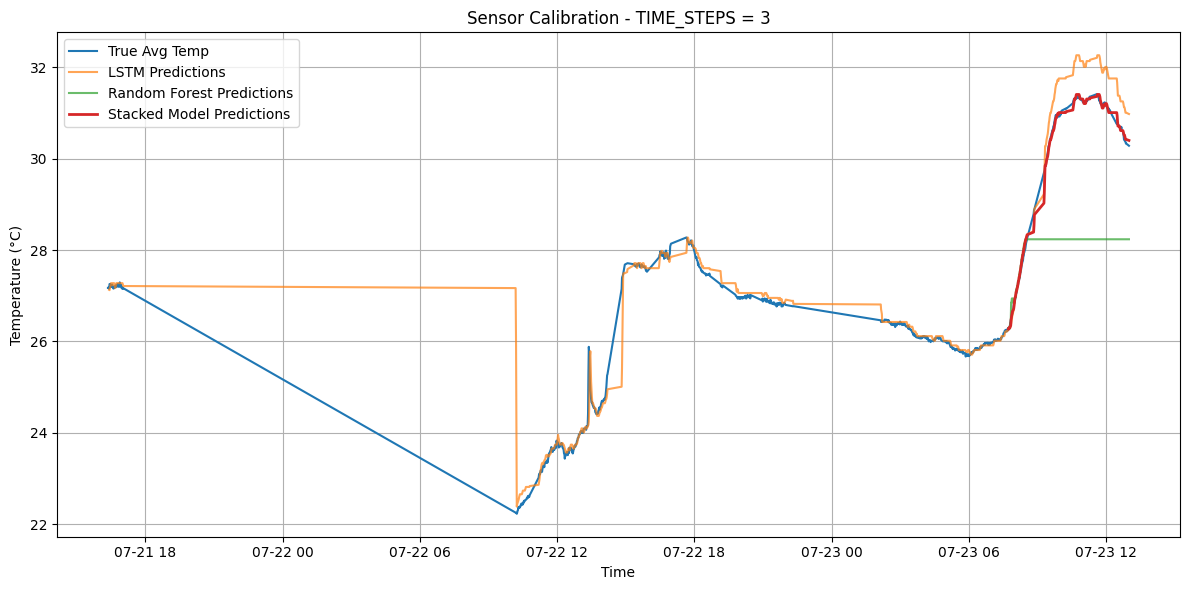


--- Running with TIME_STEPS = 5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM -> MAE: 0.4760, RMSE: 0.5492, R²: 0.8890
Random Forest -> MAE: 2.0251, RMSE: 2.3377, R²: -1.0118
Stacked Model -> MAE: 0.0751, RMSE: 0.1204, R²: 0.9947


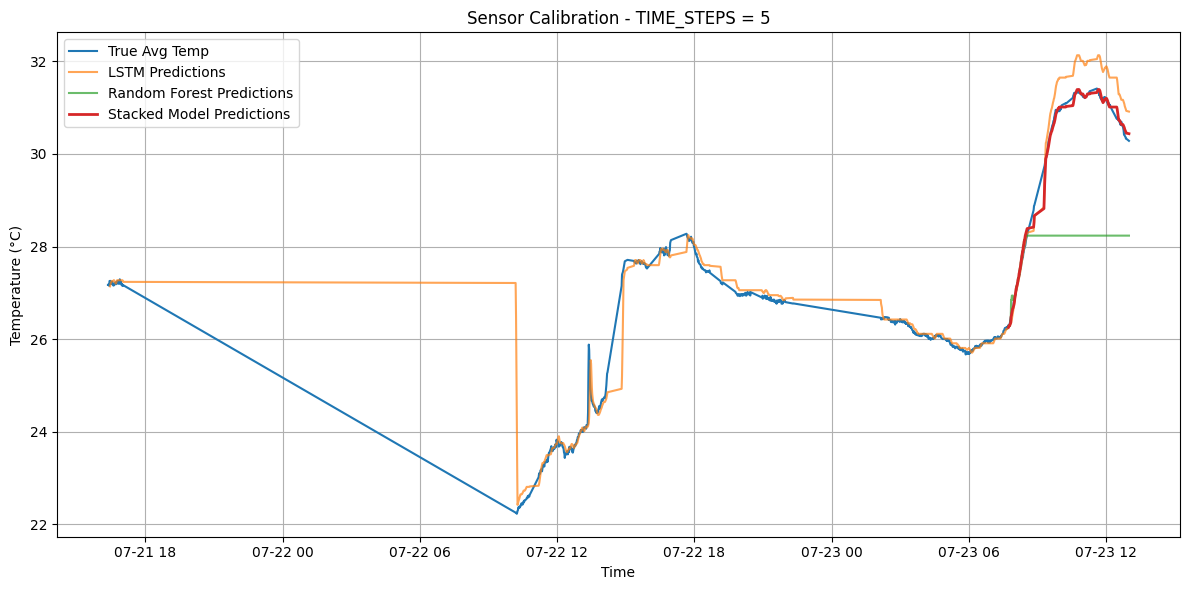


--- Running with TIME_STEPS = 7 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
LSTM -> MAE: 0.2064, RMSE: 0.2499, R²: 0.9770
Random Forest -> MAE: 2.0251, RMSE: 2.3377, R²: -1.0118
Stacked Model -> MAE: 0.0865, RMSE: 0.1367, R²: 0.9931


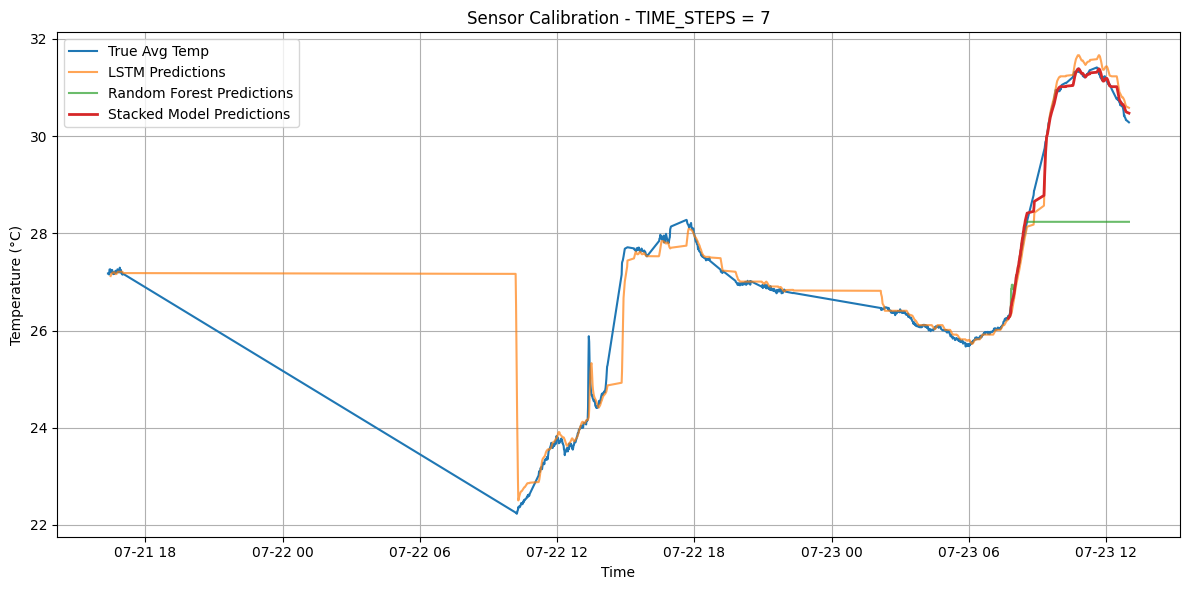


--- Running with TIME_STEPS = 10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
LSTM -> MAE: 0.1875, RMSE: 0.2822, R²: 0.9701
Random Forest -> MAE: 2.0348, RMSE: 2.3432, R²: -1.0618
Stacked Model -> MAE: 0.1132, RMSE: 0.1709, R²: 0.9890


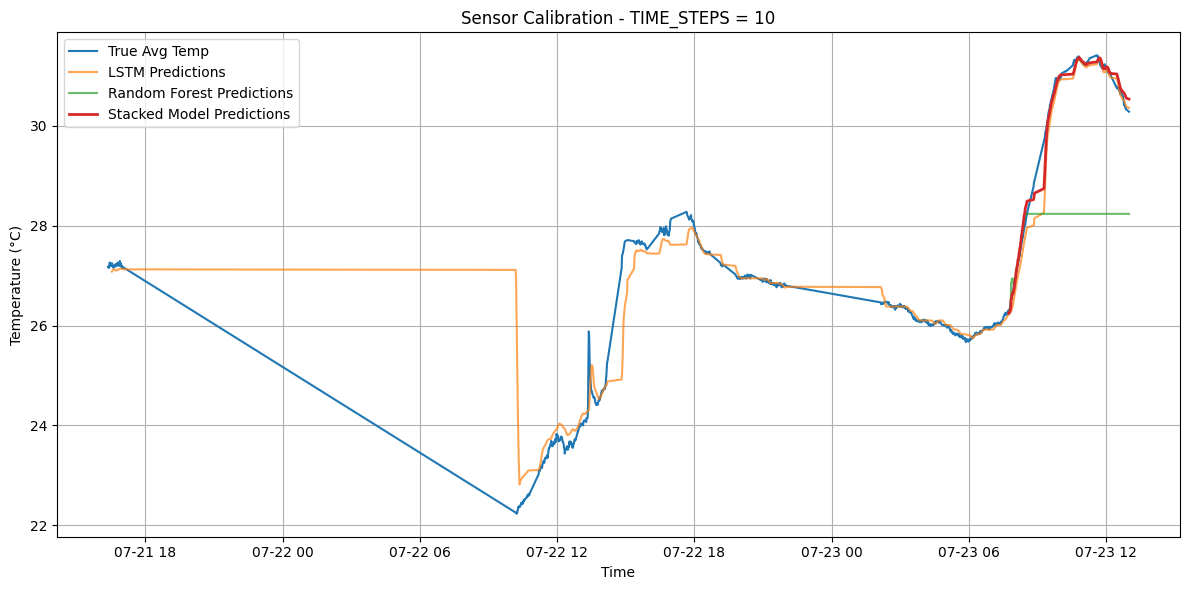

In [161]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def create_sequences(data, target, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:i+time_steps])
        ys.append(target[i + time_steps])
    return np.array(Xs), np.array(ys)

def run_model_with_timestep(df, time_steps):
    print(f"\n--- Running with TIME_STEPS = {time_steps} ---")
    
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    dht11_scaled = scaler_X.fit_transform(df[['dht11_temp']])
    avg_temp_scaled = scaler_y.fit_transform(df[['avg_temp']])

    X_seq, y_seq = create_sequences(dht11_scaled, avg_temp_scaled.flatten(), time_steps)

    split_idx = int(len(X_seq) * 0.8)
    X_train_seq, X_test_seq = X_seq[:split_idx], X_seq[split_idx:]
    y_train_seq, y_test_seq = y_seq[:split_idx], y_seq[split_idx:]

    # LSTM model
    lstm_model = Sequential([
        LSTM(50, activation='tanh', input_shape=(time_steps, 1)),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lstm_model.fit(X_train_seq, y_train_seq, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

    lstm_preds_scaled = lstm_model.predict(X_seq)
    lstm_preds = scaler_y.inverse_transform(lstm_preds_scaled).flatten()

    full_lstm_preds = np.empty(len(df))
    full_lstm_preds[:time_steps] = np.nan
    full_lstm_preds[time_steps:] = lstm_preds

    # Random Forest
    X_rf = df[['dht11_temp']].values
    y_rf = df['avg_temp'].values

    X_rf_train = X_rf[:split_idx + time_steps]
    y_rf_train = y_rf[:split_idx + time_steps]
    X_rf_test = X_rf[split_idx + time_steps:]
    y_rf_test = y_rf[split_idx + time_steps:]

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_rf_train, y_rf_train)
    rf_preds = rf.predict(X_rf_test)

    full_rf_preds = np.empty(len(df))
    full_rf_preds[:split_idx + time_steps] = np.nan
    full_rf_preds[split_idx + time_steps:] = rf_preds

    # Meta-model stacking
    valid_idx = (~np.isnan(full_lstm_preds)) & (~np.isnan(full_rf_preds))
    stacked_X = np.column_stack((full_lstm_preds[valid_idx], full_rf_preds[valid_idx]))
    stacked_y = y_rf[valid_idx]

    meta_model = LinearRegression()
    meta_model.fit(stacked_X, stacked_y)
    final_preds = meta_model.predict(stacked_X)

    # Metrics
    def print_metrics(true, pred, label):
        mae = mean_absolute_error(true, pred)
        rmse = mean_squared_error(true, pred, squared=False)
        r2 = r2_score(true, pred)
        print(f"{label} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    print_metrics(stacked_y, full_lstm_preds[valid_idx], "LSTM")
    print_metrics(stacked_y, full_rf_preds[valid_idx], "Random Forest")
    print_metrics(stacked_y, final_preds, "Stacked Model")

    # Plot results
    plt.figure(figsize=(12,6))
    plt.plot(df['time'], y_rf, label='True Avg Temp')
    plt.plot(df['time'], full_lstm_preds, label='LSTM Predictions', alpha=0.7)
    plt.plot(df['time'], full_rf_preds, label='Random Forest Predictions', alpha=0.7)
    plt.plot(df['time'][valid_idx], final_preds, label='Stacked Model Predictions', linewidth=2)
    plt.title(f'Sensor Calibration - TIME_STEPS = {time_steps}')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: test different TIME_STEPS
for ts in [3, 5, 7, 10]:
    run_model_with_timestep(df, ts)


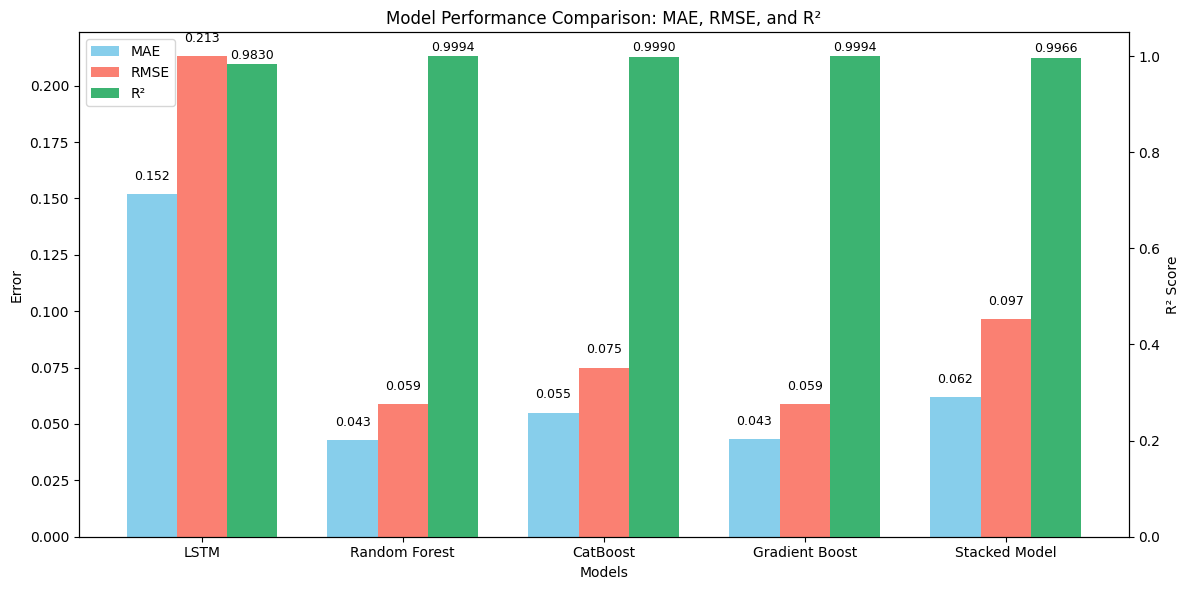

In [162]:
import numpy as np
import matplotlib.pyplot as plt

models = ['LSTM', 'Random Forest', 'CatBoost', 'Gradient Boost', 'Stacked Model']

mae = [0.1519, 0.0428, 0.055, 0.0432, 0.0618]
rmse = [0.2130, 0.0587, 0.075, 0.0588, 0.0966]
r2 = [0.9830, 0.9994, 0.999, 0.9994, 0.9966]

x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12,6))

bars1 = ax1.bar(x - width, mae, width, label='MAE', color='skyblue')
bars2 = ax1.bar(x, rmse, width, label='RMSE', color='salmon')

ax2 = ax1.twinx()
bars3 = ax2.bar(x + width, r2, width, label='R²', color='mediumseagreen')

ax1.set_xlabel('Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylabel('Error')
ax2.set_ylabel('R² Score')

ax1.set_title('Model Performance Comparison: MAE, RMSE, and R²')

# Add data labels on bars
def add_labels(bars, ax, fmt='{:.3f}'):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.005, fmt.format(height), ha='center', va='bottom', fontsize=9)

add_labels(bars1, ax1)
add_labels(bars2, ax1)
add_labels(bars3, ax2, fmt='{:.4f}')

# Legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

plt.tight_layout()
plt.show()


In [2]:

# !pip install -q m2cgen

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import m2cgen as m2c
import os

# Step 3: Load your datA
df = pd.read_csv('/kaggle/input/senosr-calib/timezones_handled.csv')
# For demo, assuming df is already loaded

# Step 4: Prepare features and target
X = df[['dht11_temp']]   # input: raw DHT11 temperature
Y = df['avg_temp']       # target: corrected average temperature

# Step 5: Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 6: Create and train Random Forest model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, Y_train)

# Step 7: Make predictions on test set
y_corrected = rf.predict(X_test)

# Step 8: Evaluate performance
mae = mean_absolute_error(Y_test, y_corrected)
rmse = mean_squared_error(Y_test, y_corrected, squared=False)
r2 = r2_score(Y_test, y_corrected)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 score: {r2:.4f}")

# Step 9: Export model to C code and save as model.c
output_path = "/kaggle/working/model.c"
with open(output_path, "w") as f:
    f.write(c_code)
print(f"✅ Model saved to {output_path}")


# Step 10: Show the size of the exported C file
size_kb = os.path.getsize("model.c") / 1024
print(f"✅ Model exported as 'model.c' (Size: {size_kb:.2f} KB)")

# Optional: Step 11: Plot predictions vs actuals
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_corrected, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Average Temperature")
plt.ylabel("Corrected DHT11 Temperature")
plt.title("Predicted vs Actual (20 Trees)")
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'm2cgen'